## House Price Prediction

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading The Training Dataset

In [3]:
import pandas as pd
df = pd.read_csv('training_set.csv')

In [4]:
df.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
914    915         160       FV         30.0     3000   Pave  Pave      Reg   
1314  1315          20       RL         60.0     8190   Pave   NaN      Reg   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   
741    742          20       RL         65.0     6768   Pave   NaN      IR1   
1183  1184          30       RL         60.0    10800   Pave  Grvl      Reg   
605    606          60       RL         85.0    13600   Pave   NaN      Reg   
465    466         120       RM          NaN     3072   Pave   NaN      Reg   
1347  1348          20       RL         93.0    15306   Pave   NaN      IR1   
774    775          20       RL        110.0    14226   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1431         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
914          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1314         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1278         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
741          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
1183         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
605          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
465          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1347         HLS    AllPub  ...        0    NaN    NaN         NaN       0   
774          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1431     10   2009        WD         Normal     143750  
914       6   2009       New        Partial     173733  
1314     10   2007        WD         Normal     119000  
1278      3   2008        WD         Normal     237000  
741       5   2008        WD         Normal     142000  
1183      6   2006        WD         Normal     120000  
605      10   2009        WD         Normal     205000  
465       5   2006        WD         Normal     178740  
1347      5   2007       New        Partial     283463  
774       7   2007       New        Partial     395000  

[10 rows x 81 columns]

In [5]:
df.shape

(1460, 81)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Exploratory Data Analysis

### Categorical features & Continous Features Sepration

In [13]:
cat = list(df.columns[df.dtypes=='object'])
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [14]:
con = list(df.columns[df.dtypes!='object'])
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Descriptive Statistics First

In [16]:
df[con].describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [17]:
len(df[con].describe().T)

38

In [18]:
df[cat].describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [19]:
len(df[cat].describe().T)

43

# Univariate Analysis

In [20]:
## 1. Con - Distplot
## 2. Cat - Barplot

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
## For Categorial Features

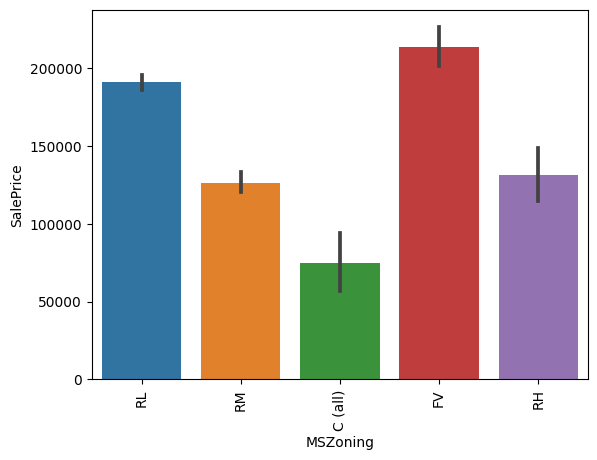

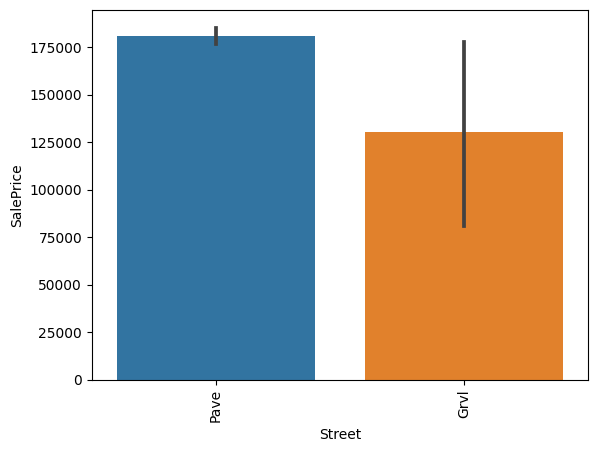

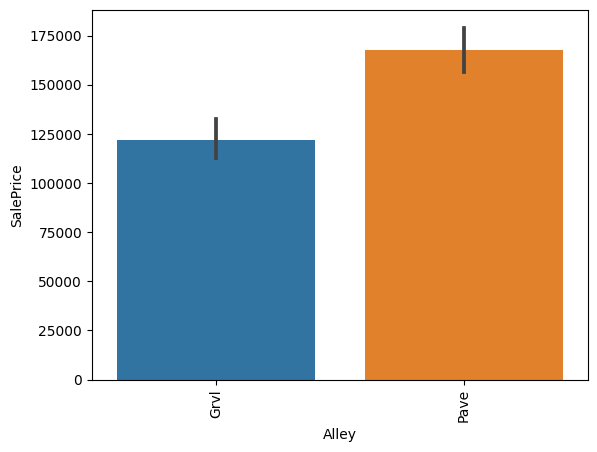

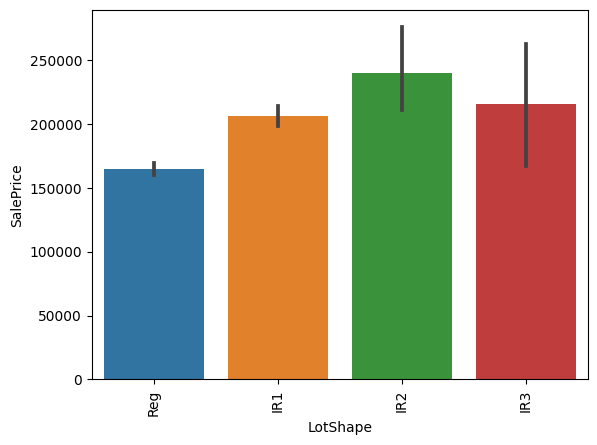

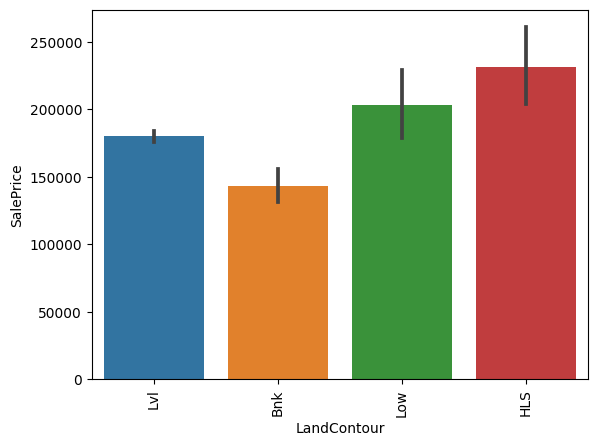

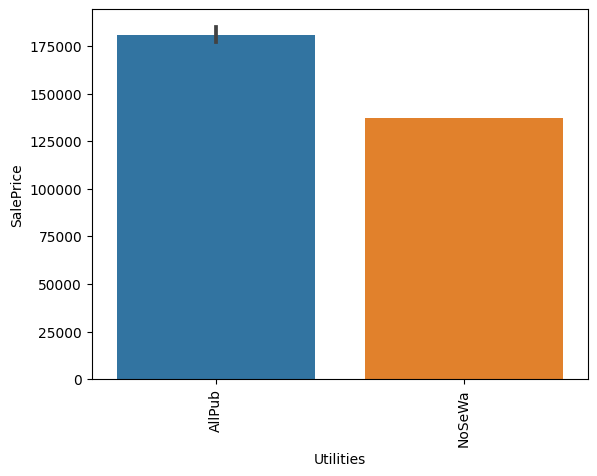

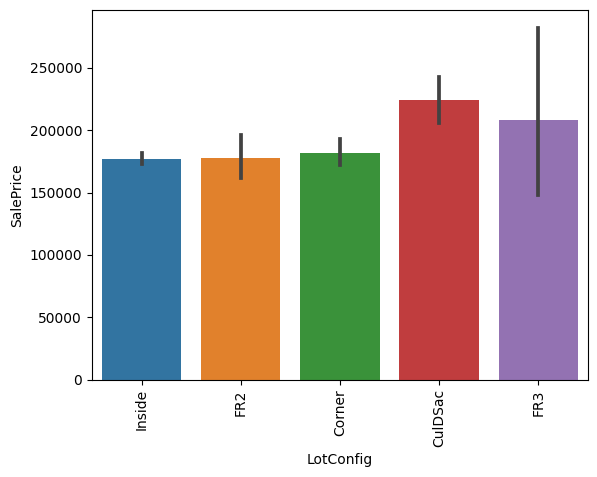

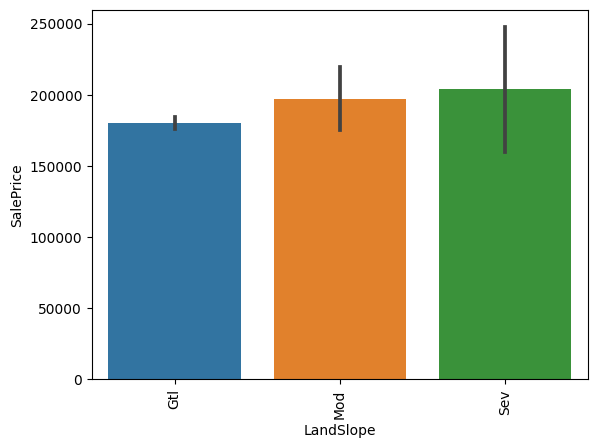

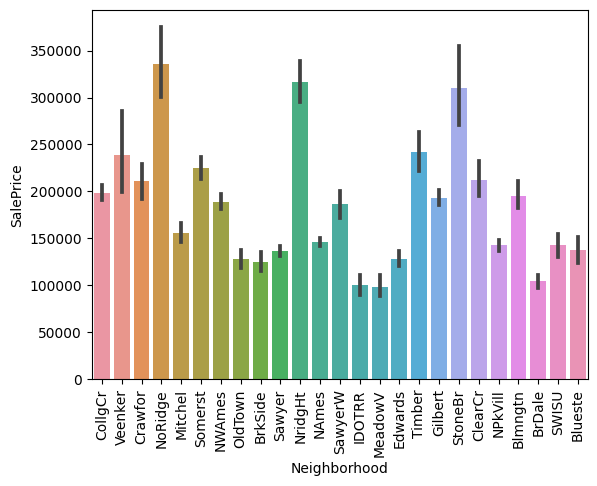

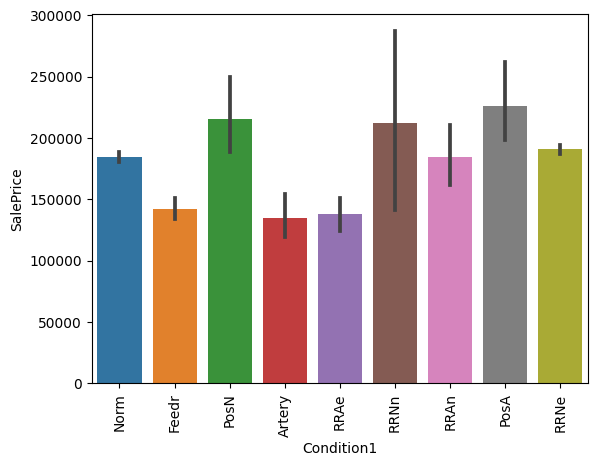

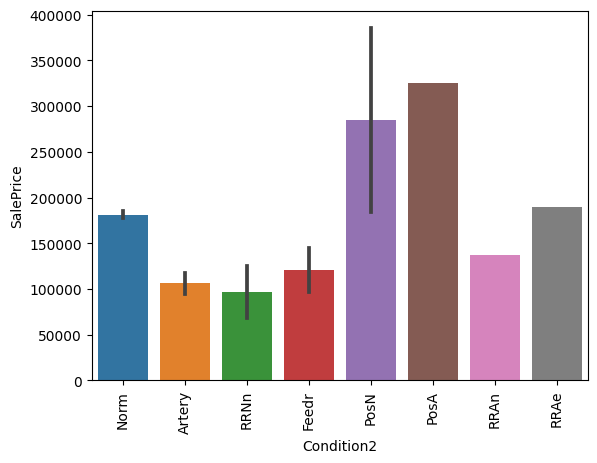

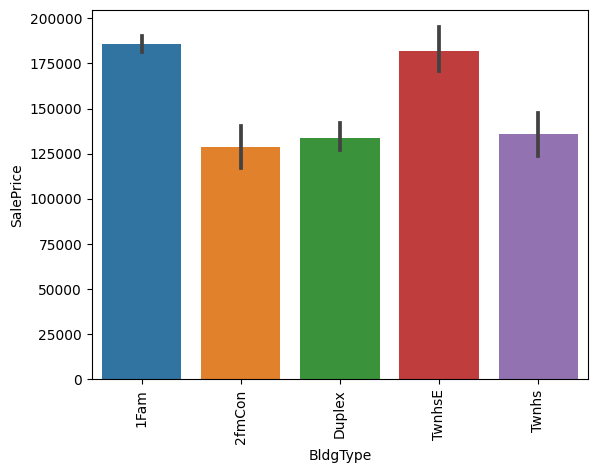

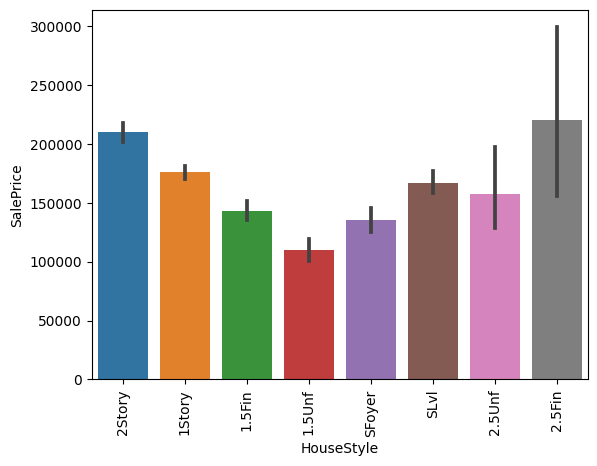

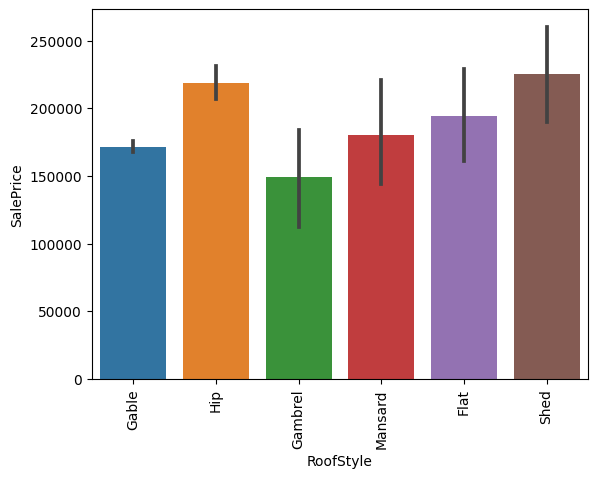

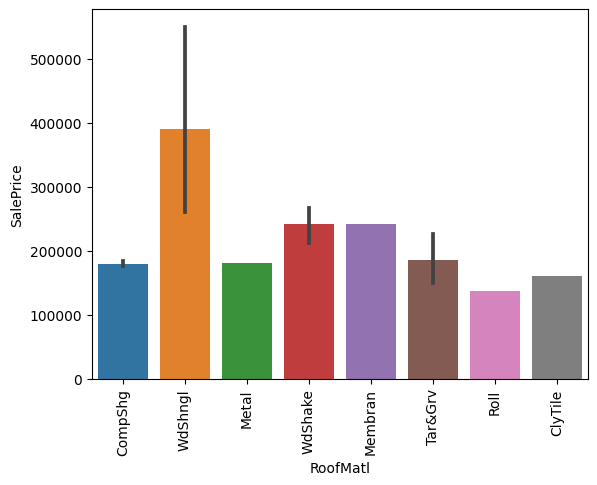

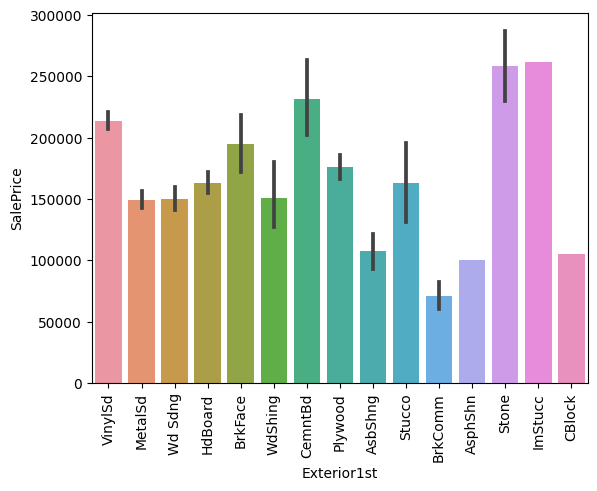

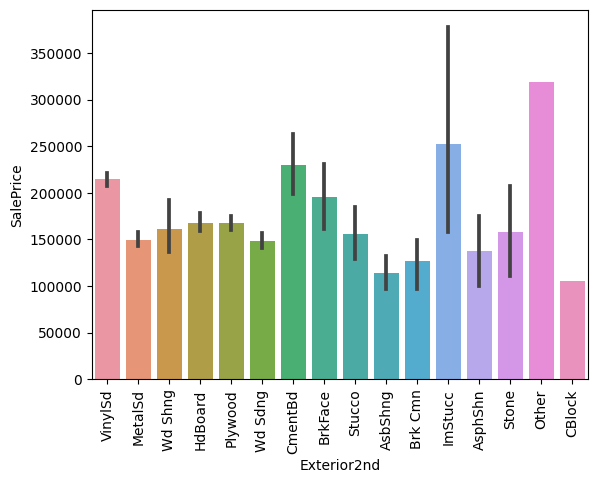

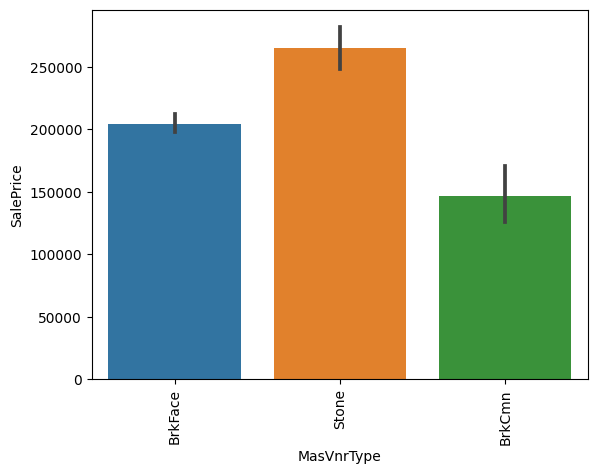

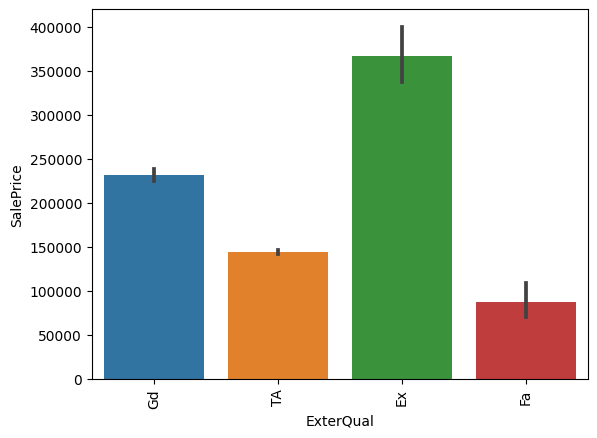

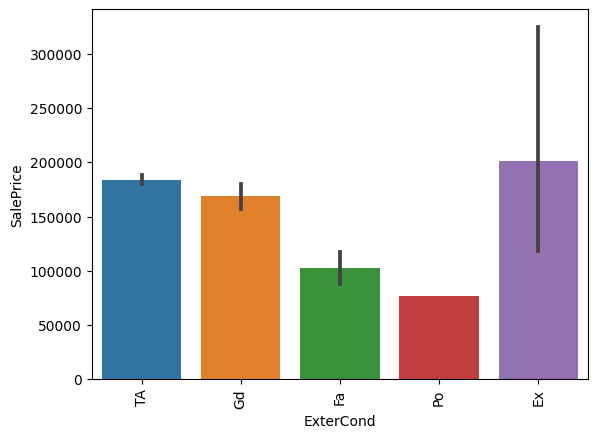

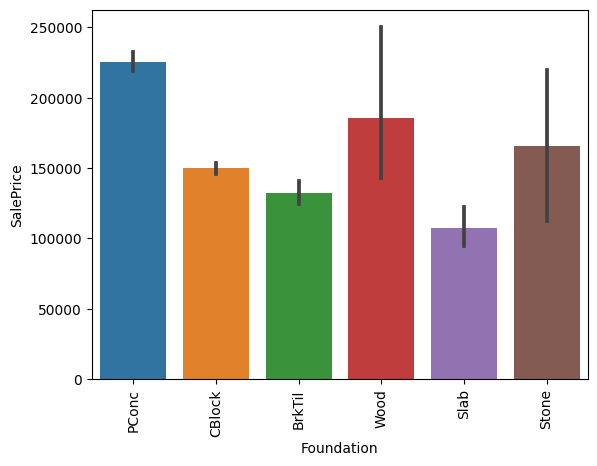

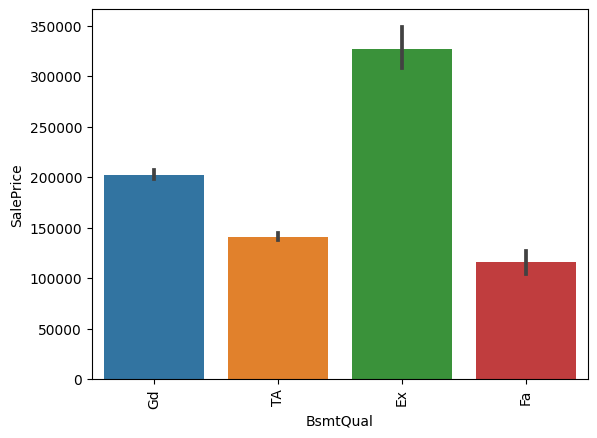

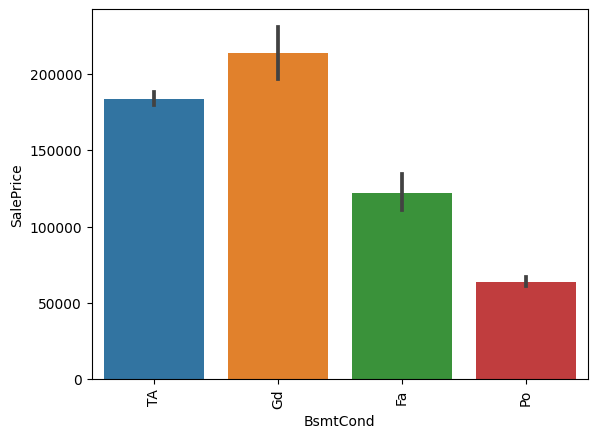

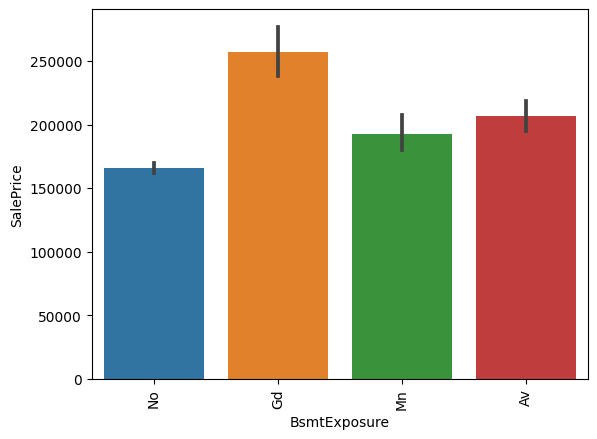

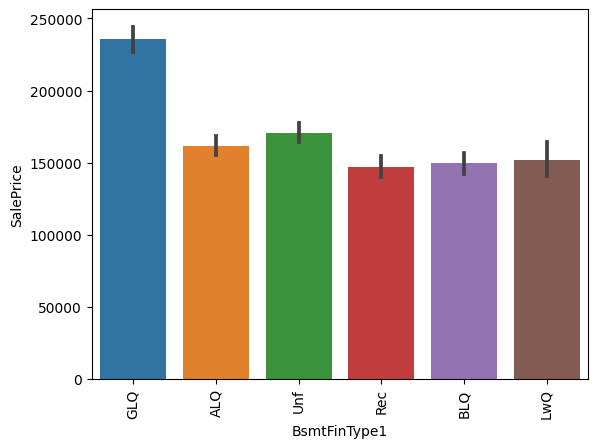

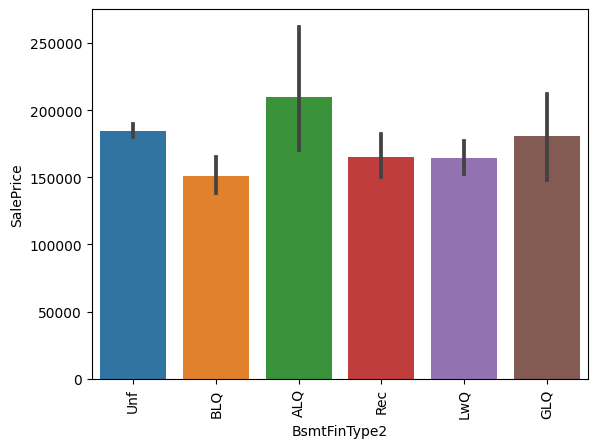

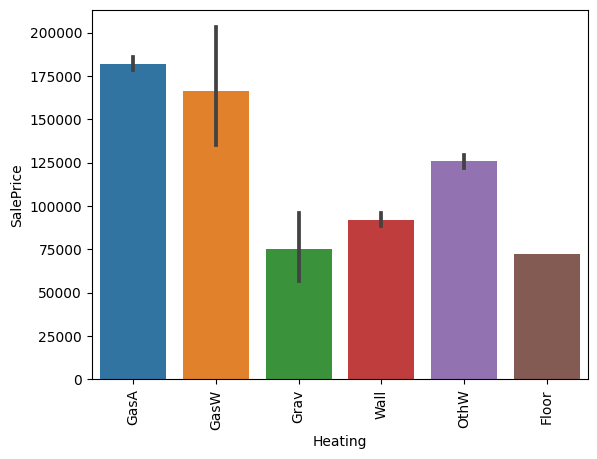

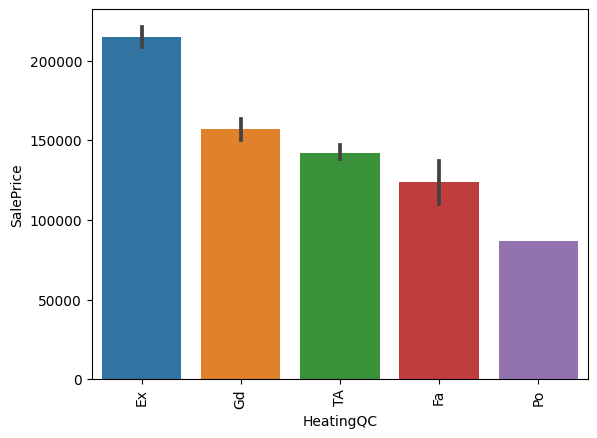

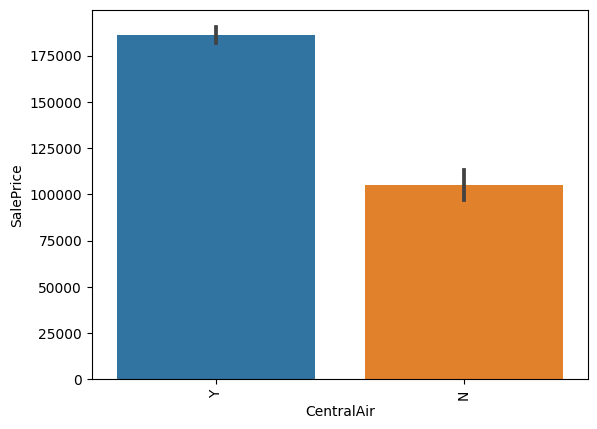

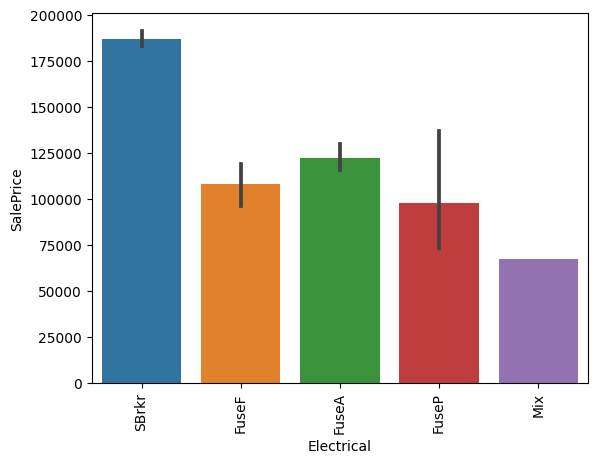

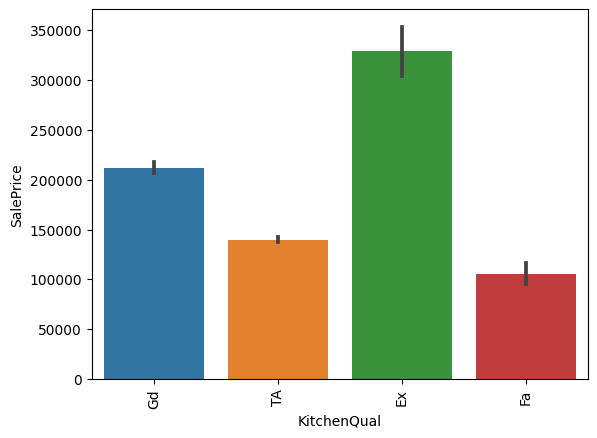

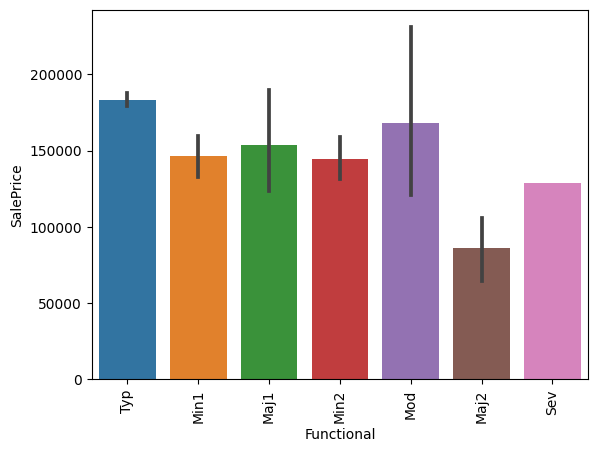

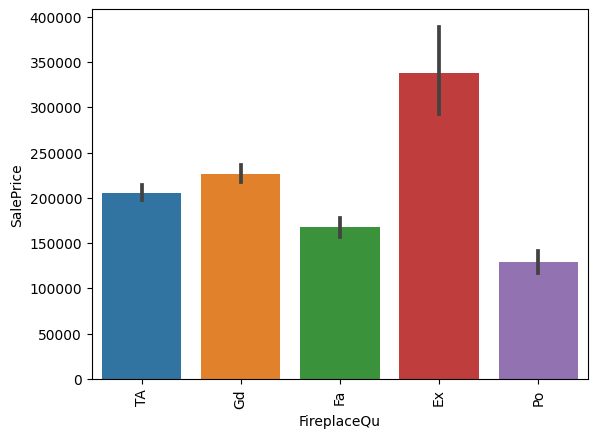

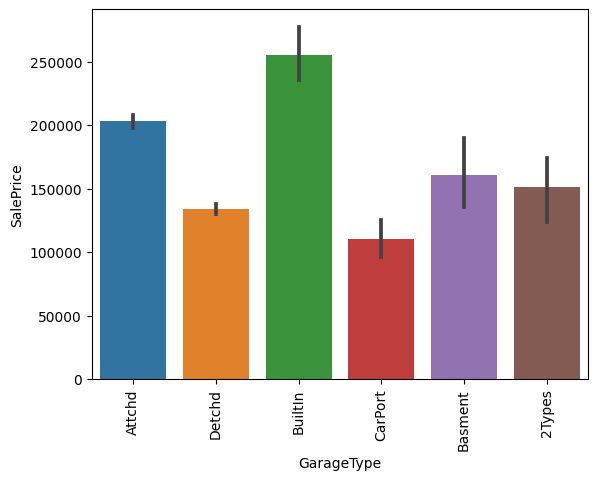

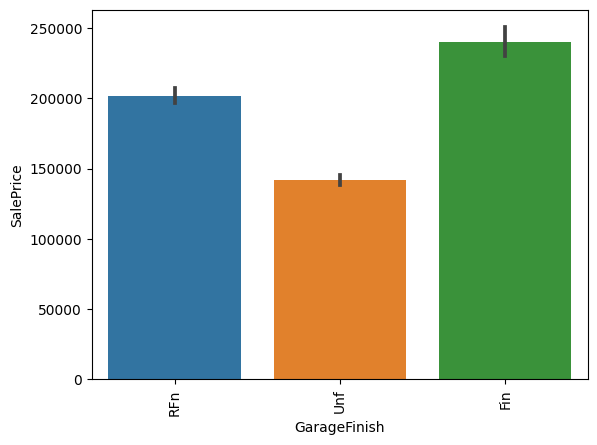

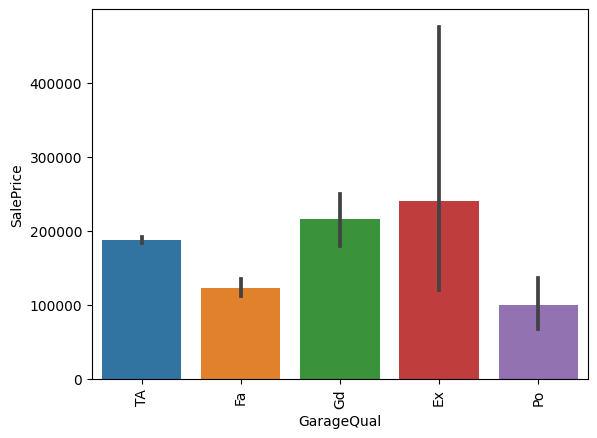

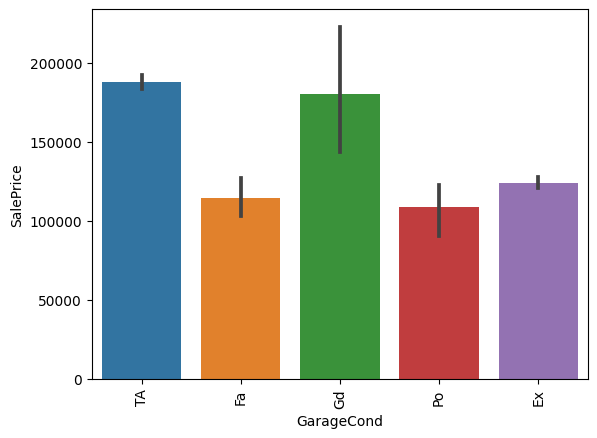

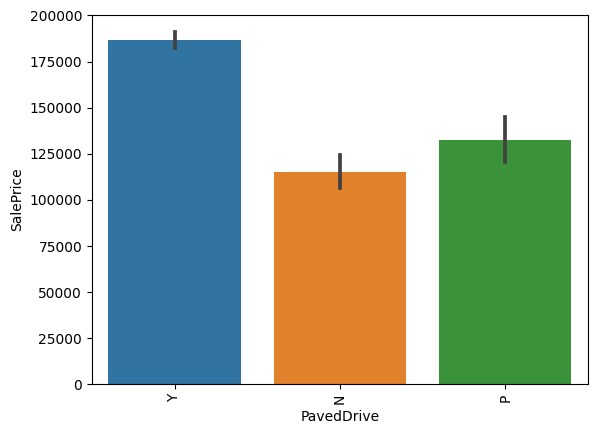

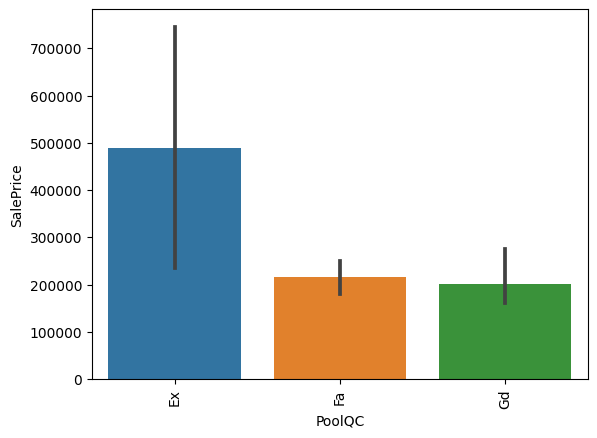

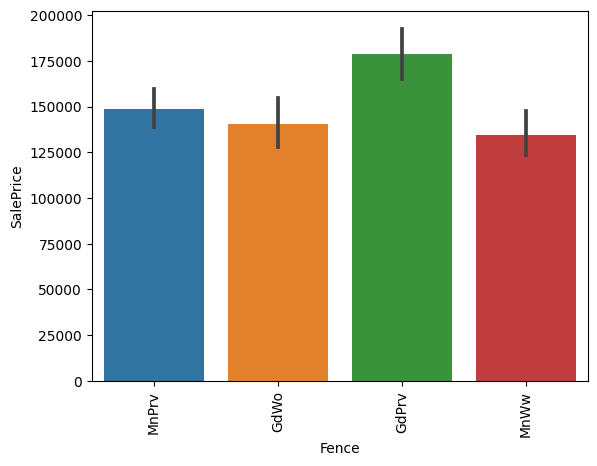

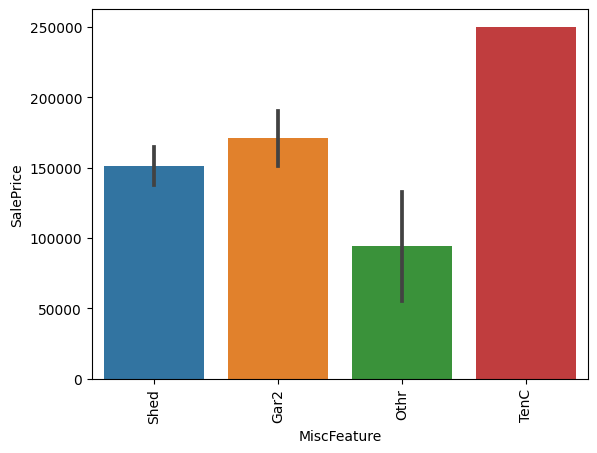

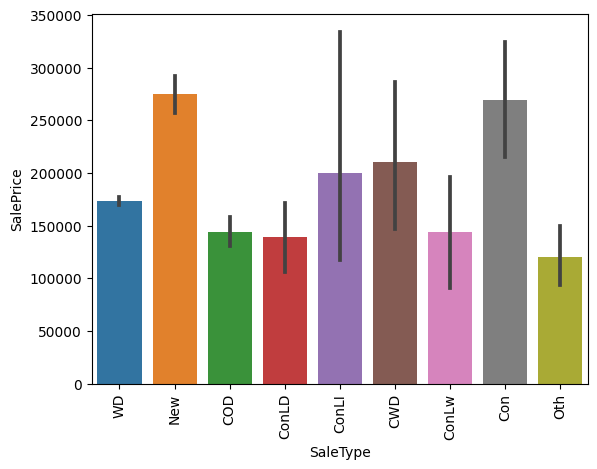

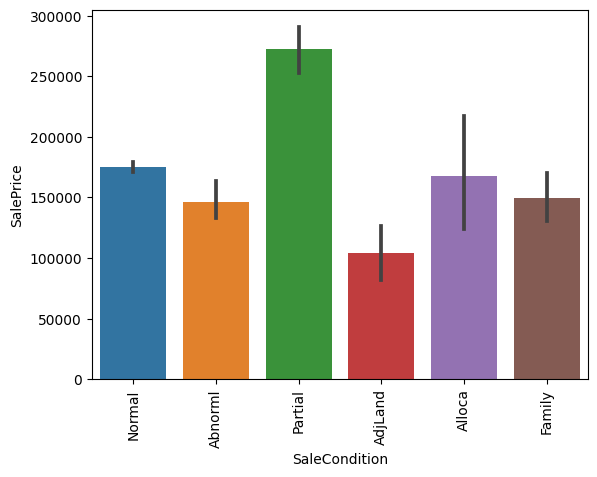

In [23]:
for i in cat:
    sns.barplot(x=df[i],y=df['SalePrice'])
    plt.xticks(rotation ='vertical')
    plt.show()


In [26]:
## For Continous Feature

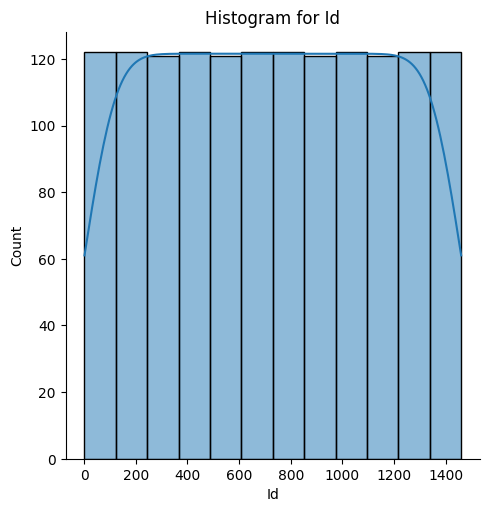

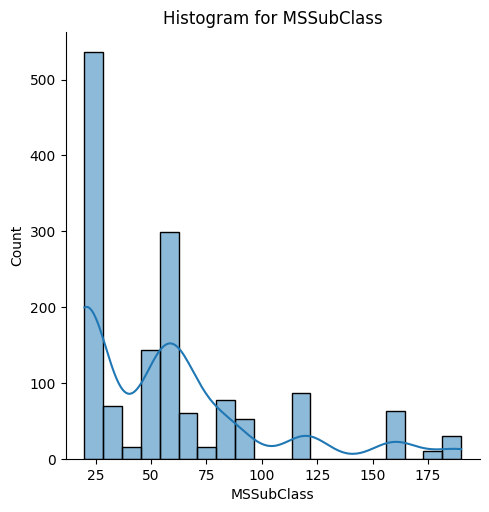

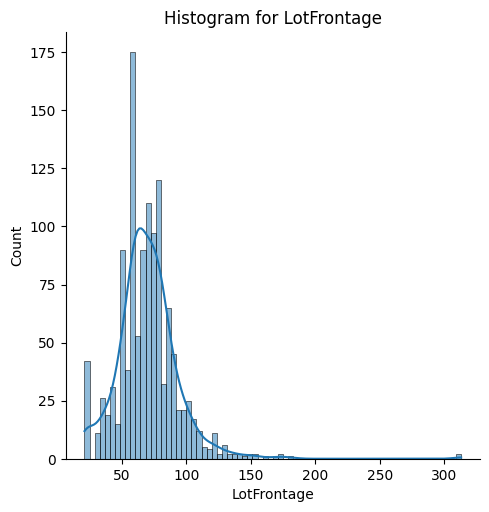

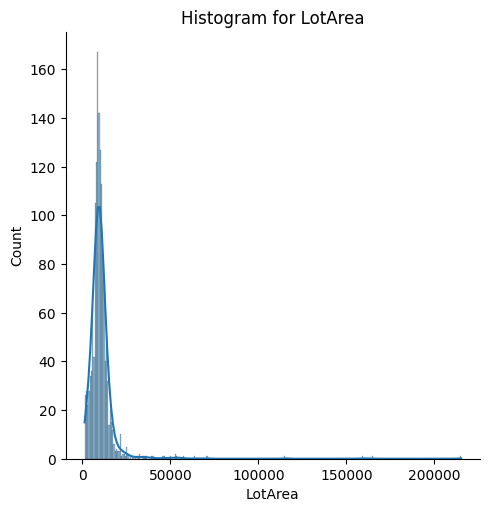

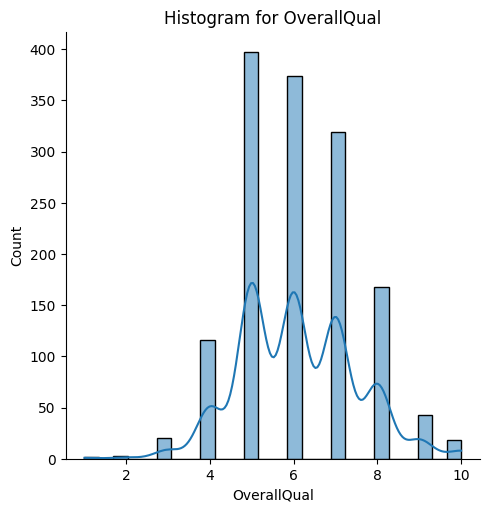

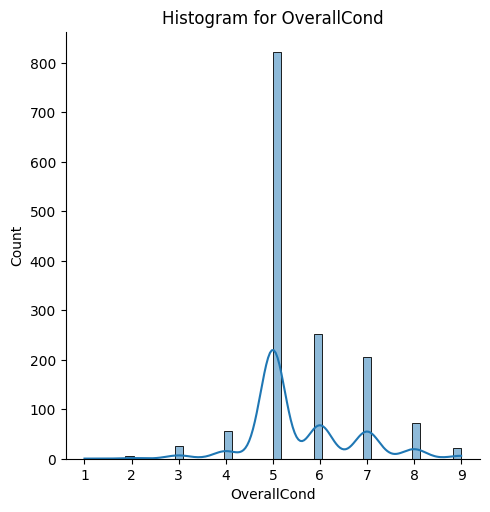

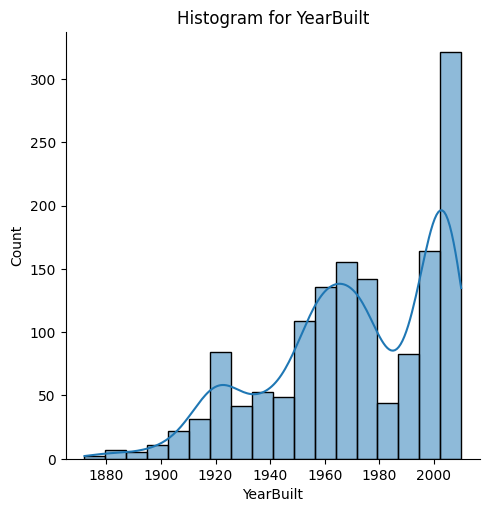

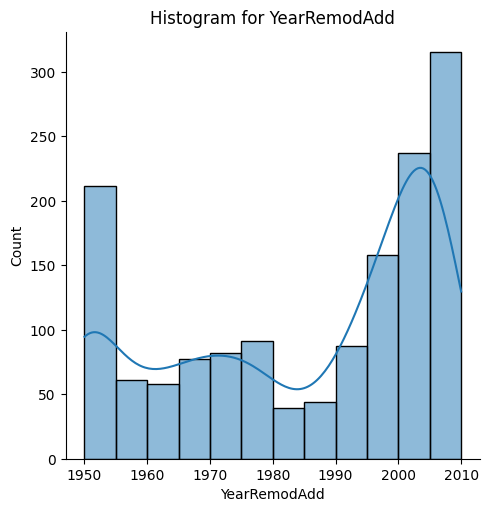

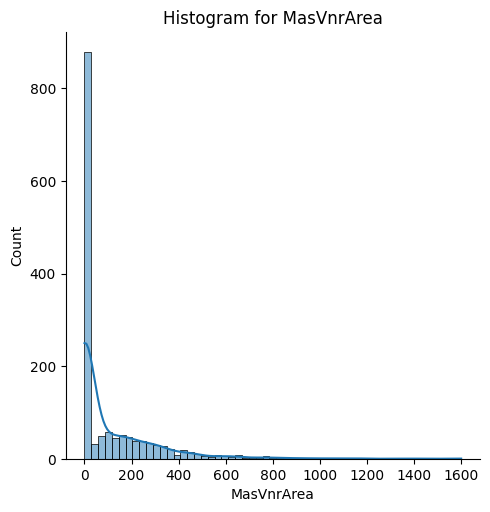

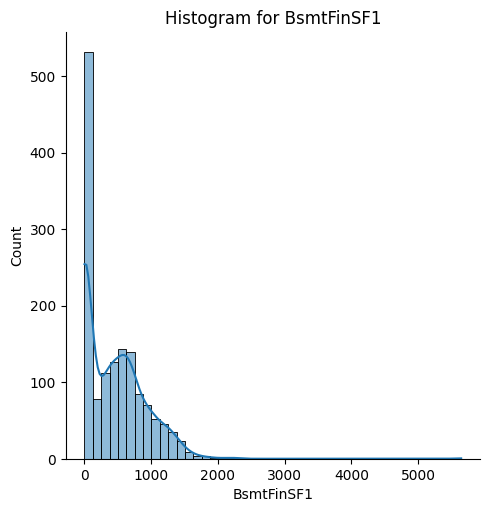

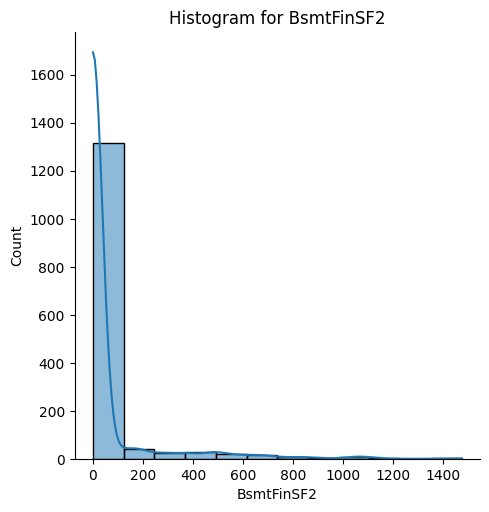

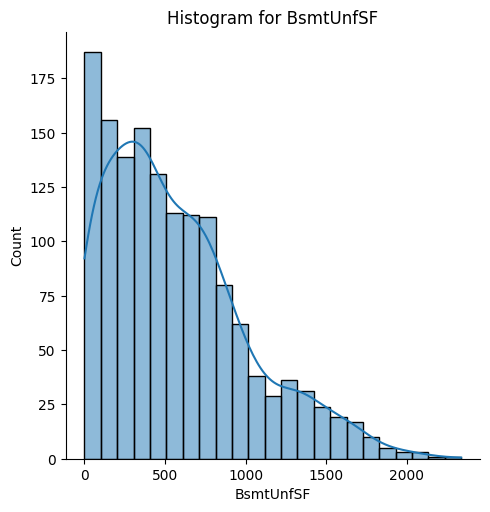

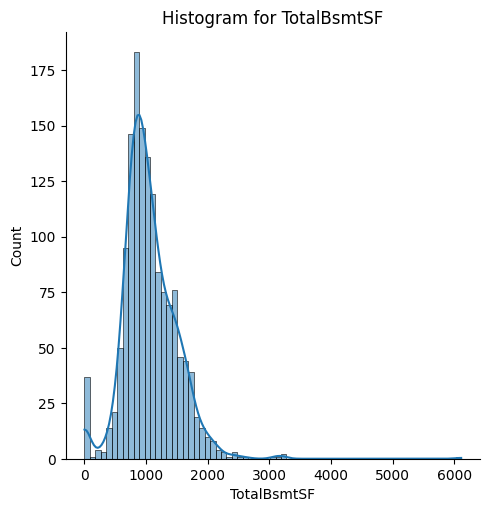

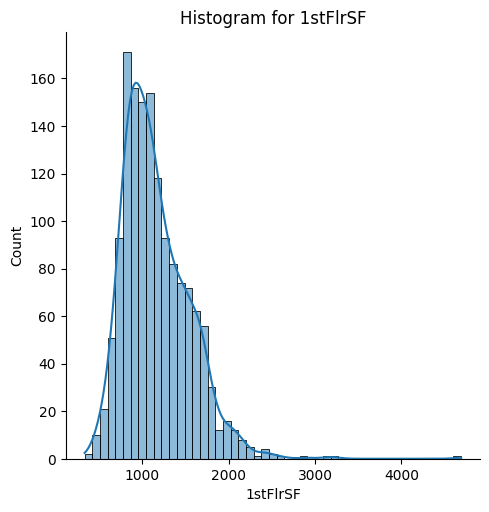

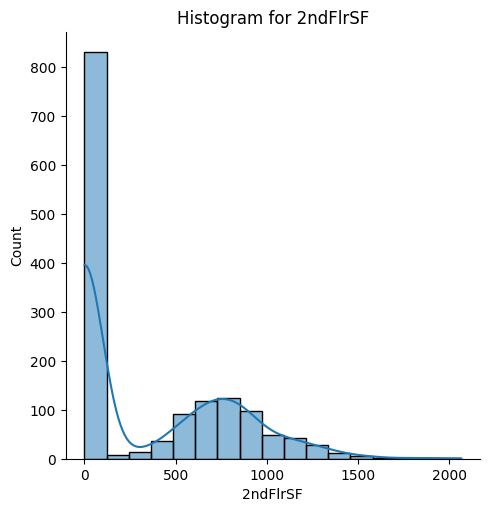

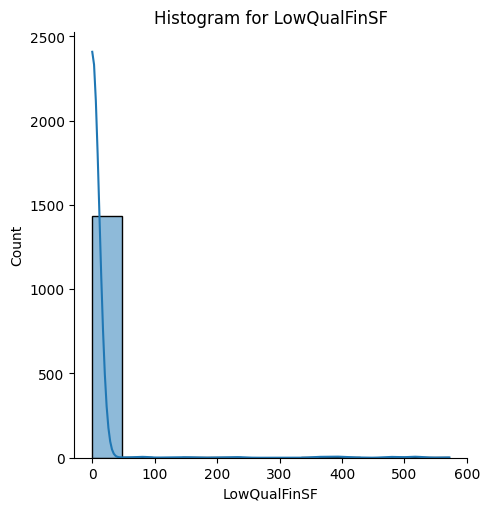

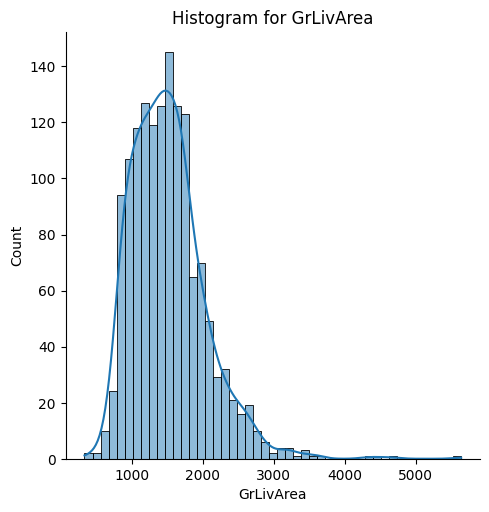

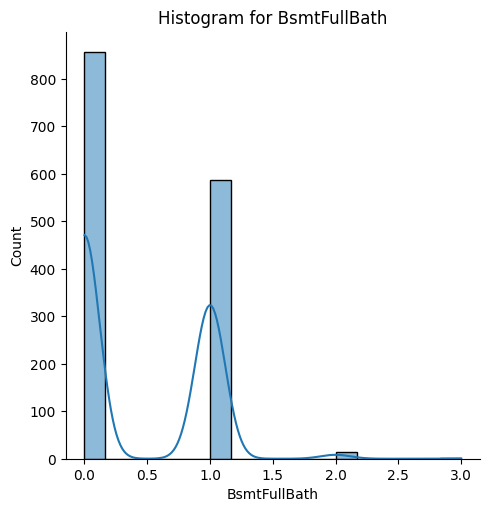

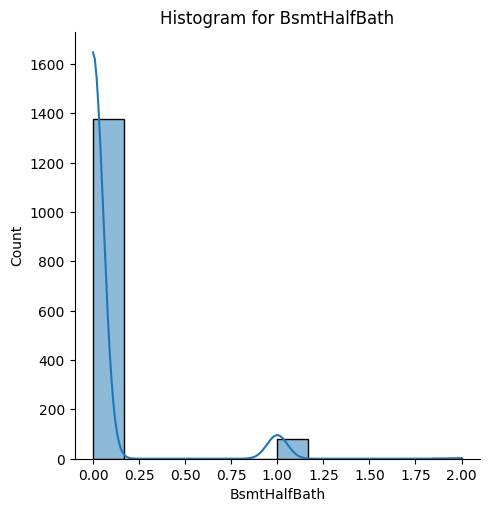

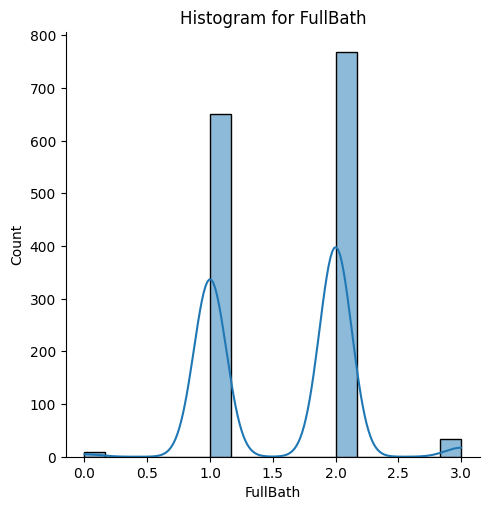

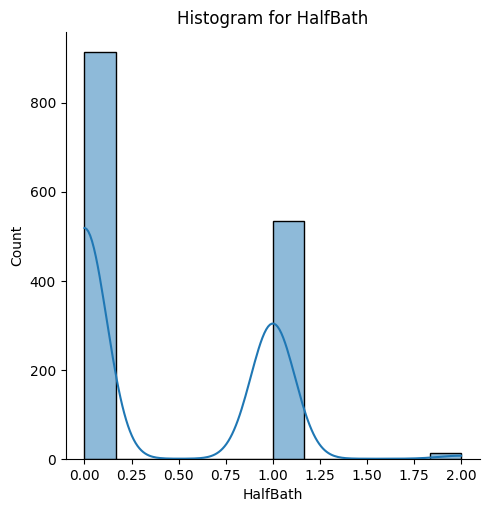

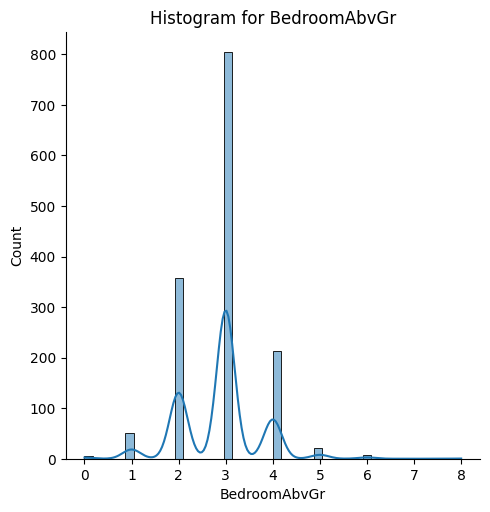

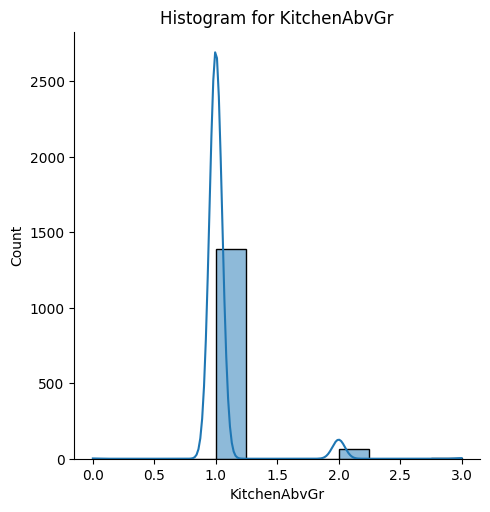

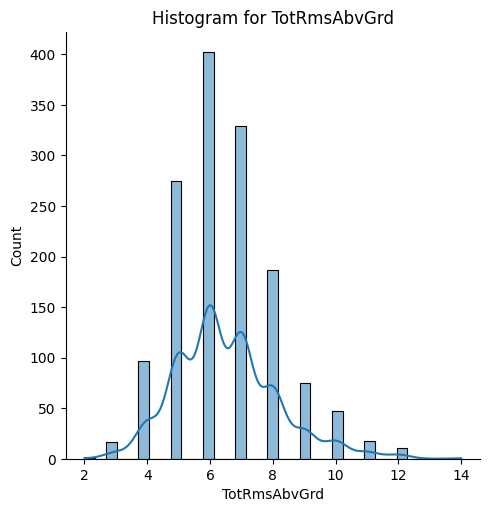

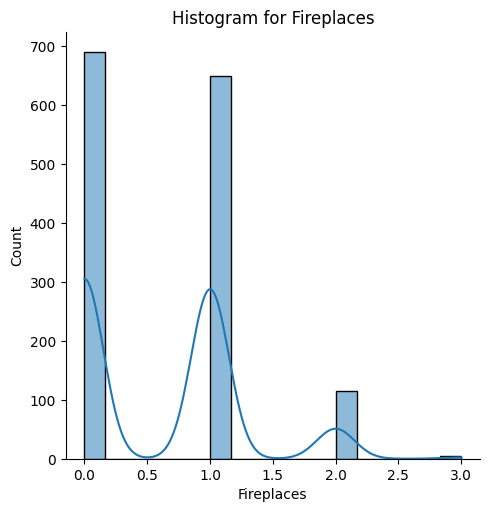

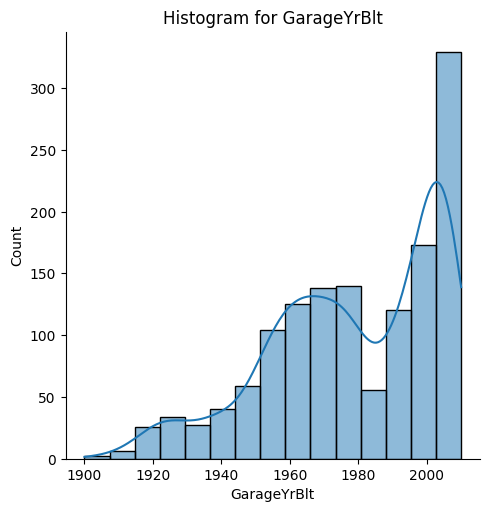

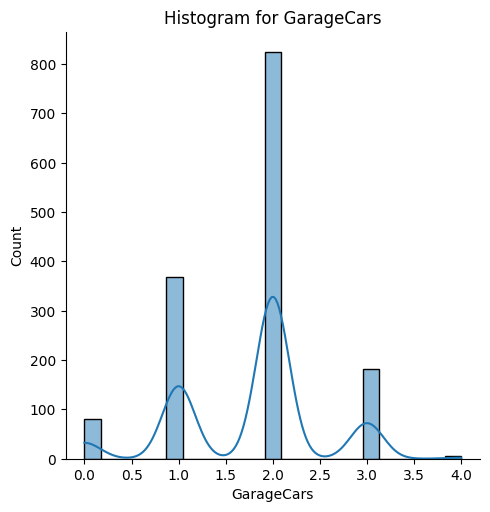

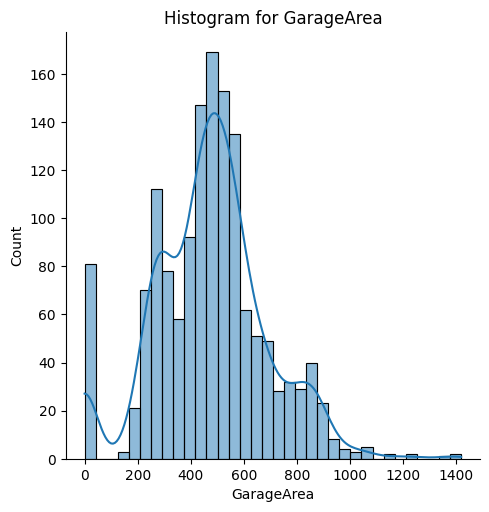

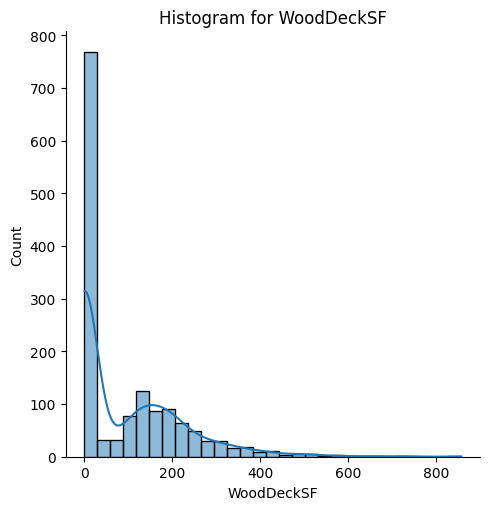

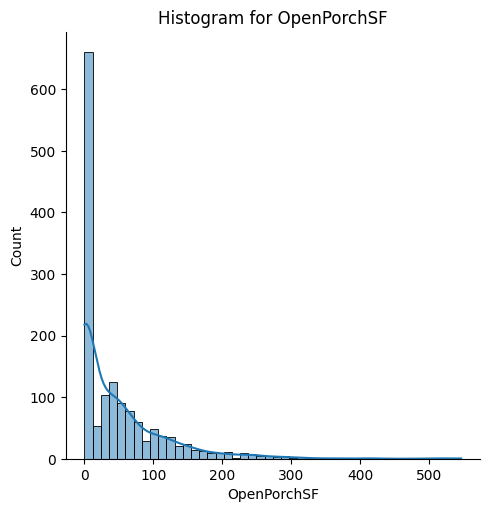

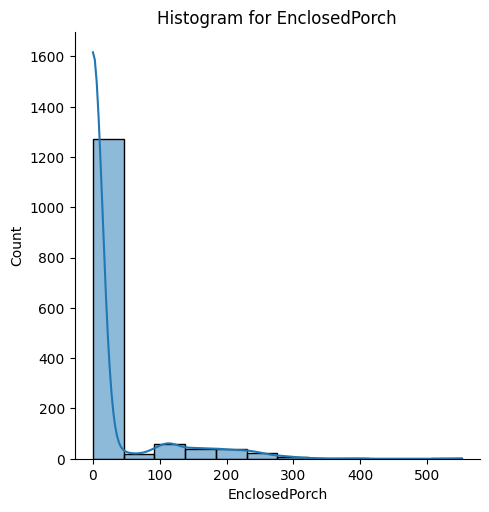

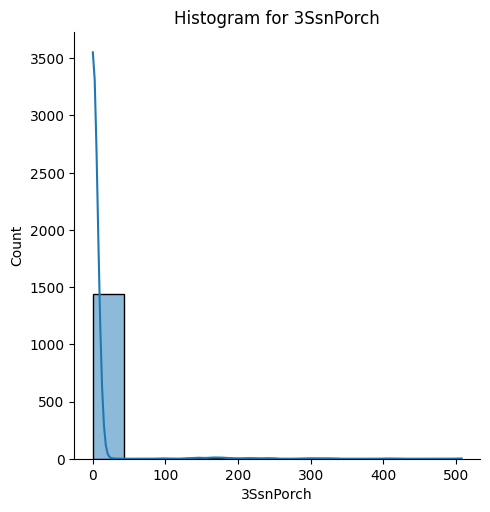

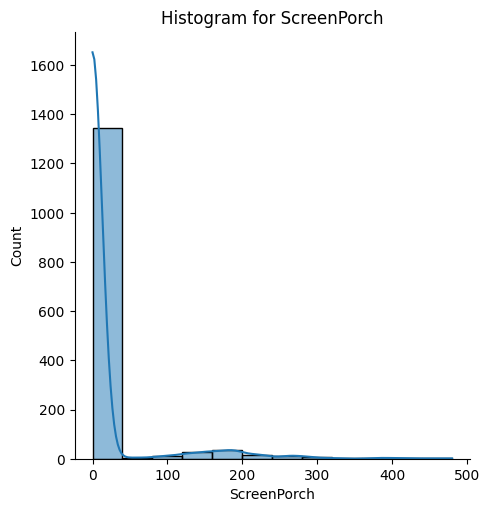

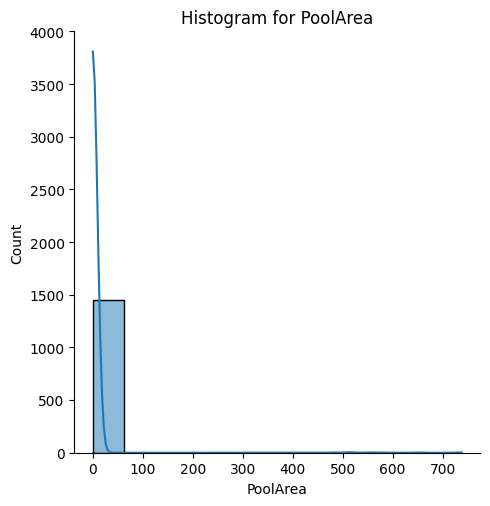

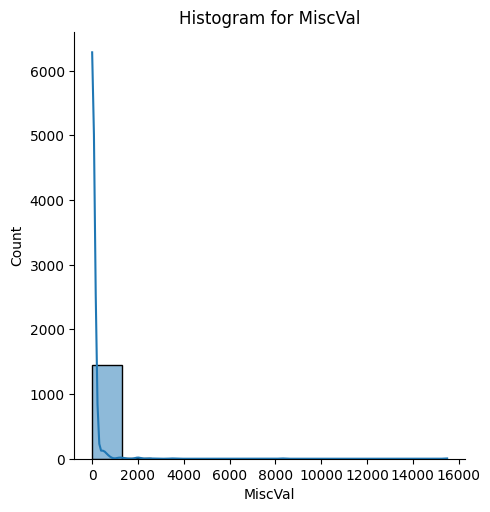

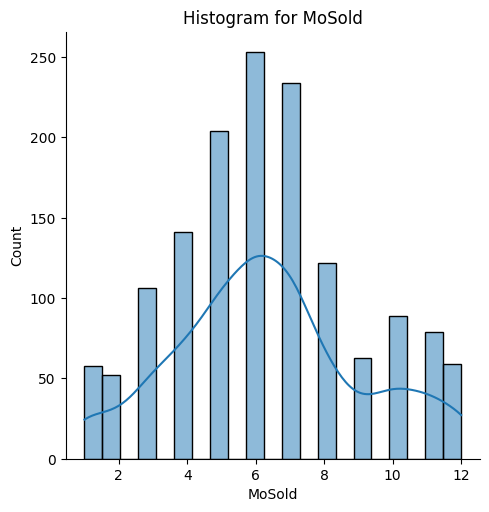

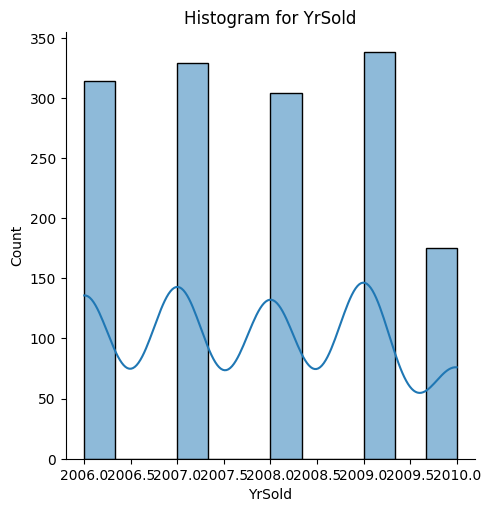

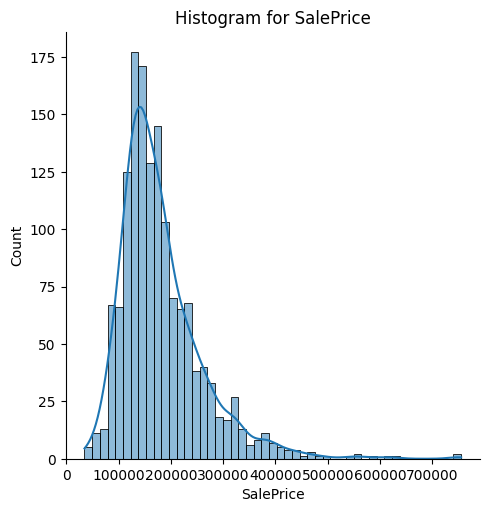

In [28]:
for i in con:
    sns.displot(data=df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

## Bivariate Analysis

In [29]:
## Con vs Con - Scatterplot, Correlation Heatmap
##  Cat vs Con - Boxplot


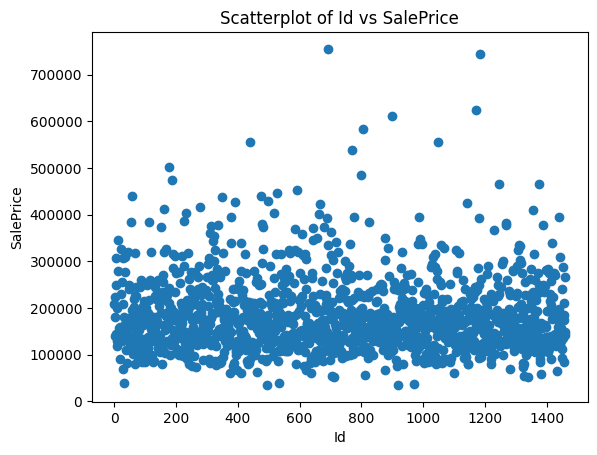

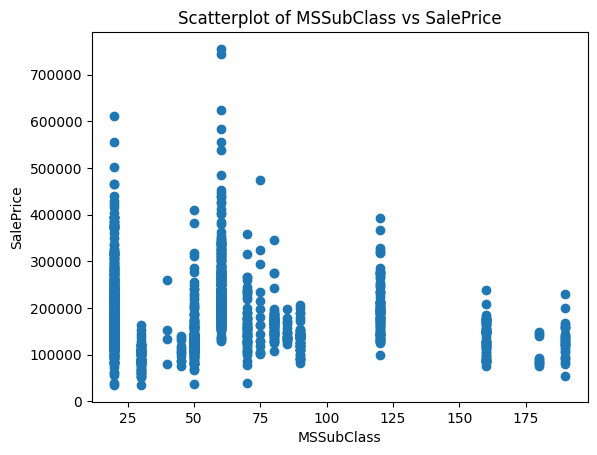

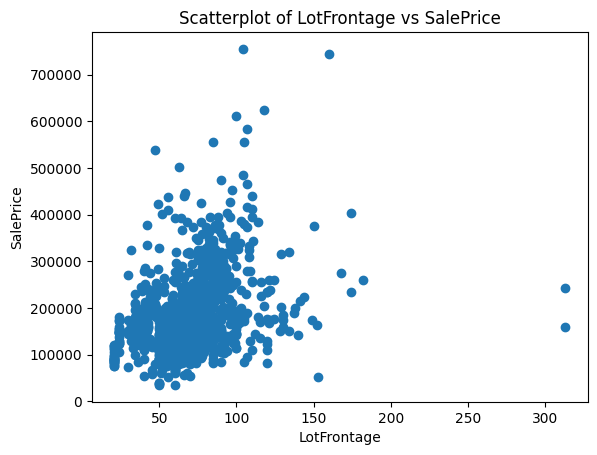

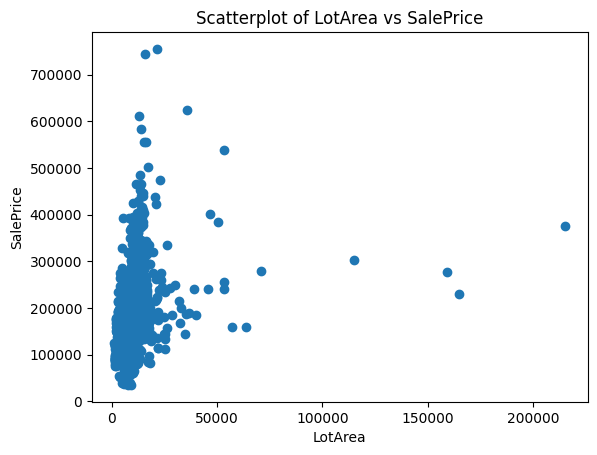

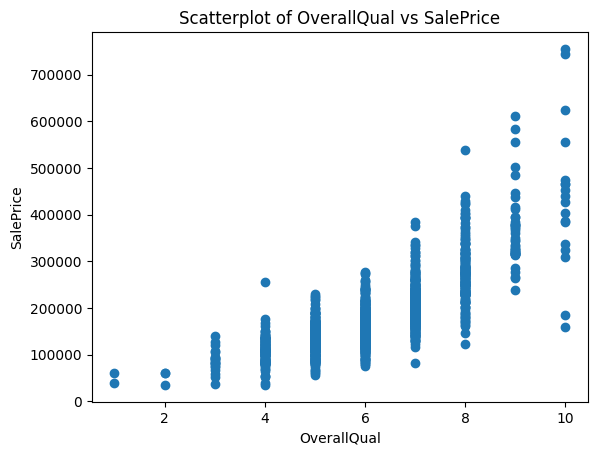

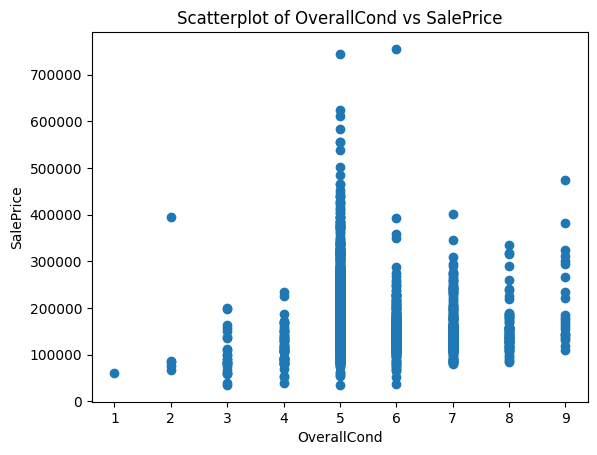

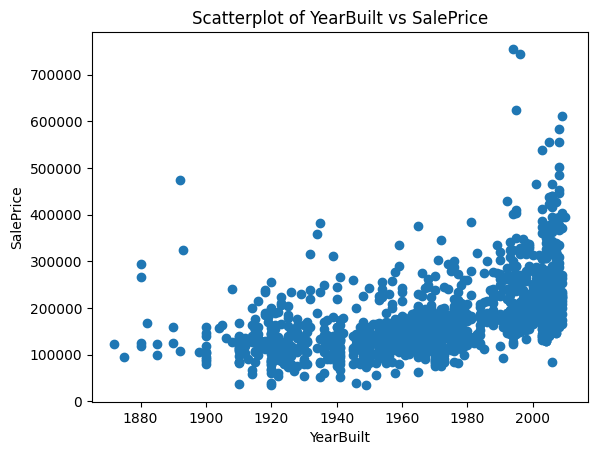

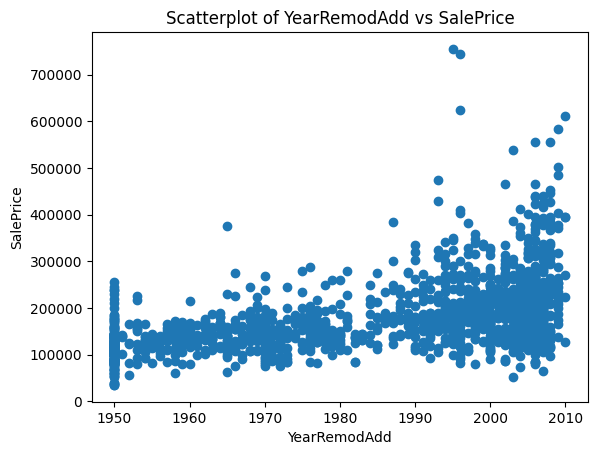

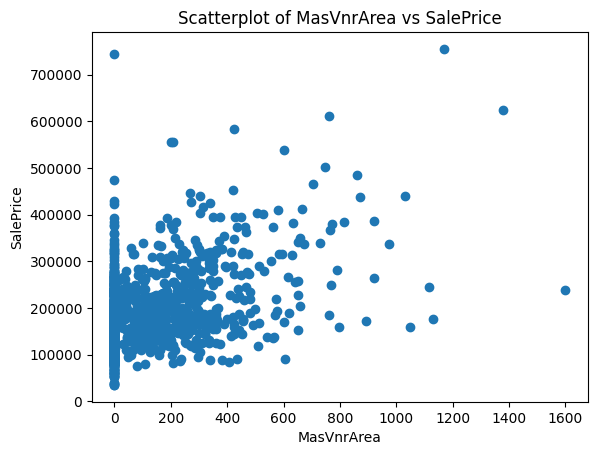

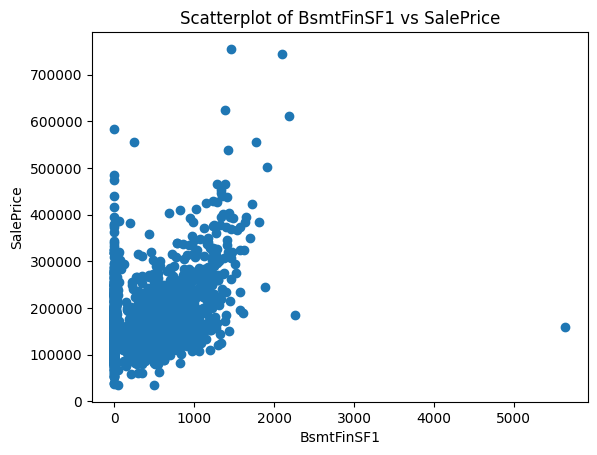

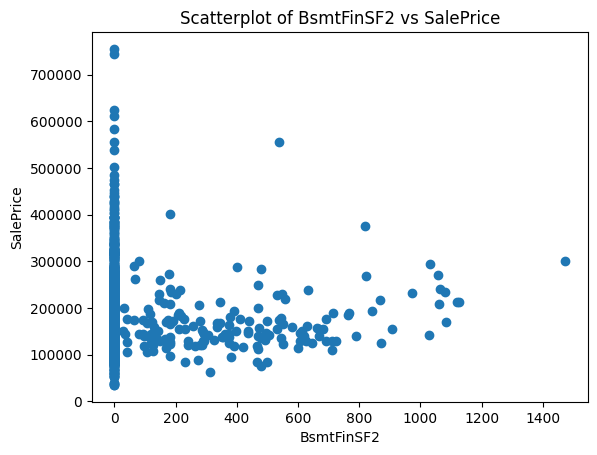

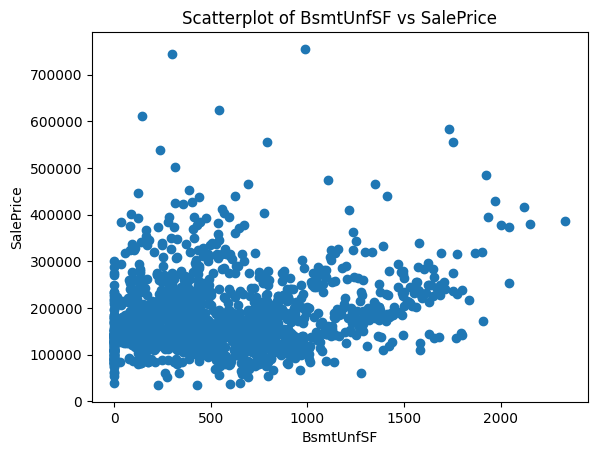

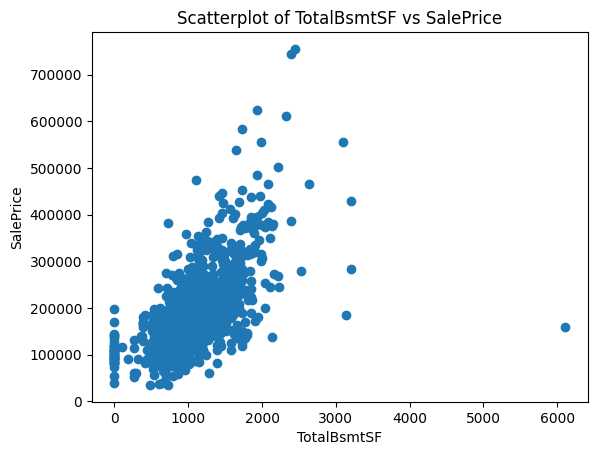

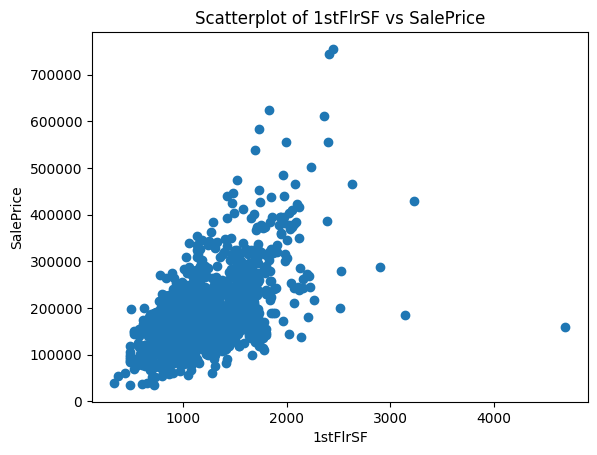

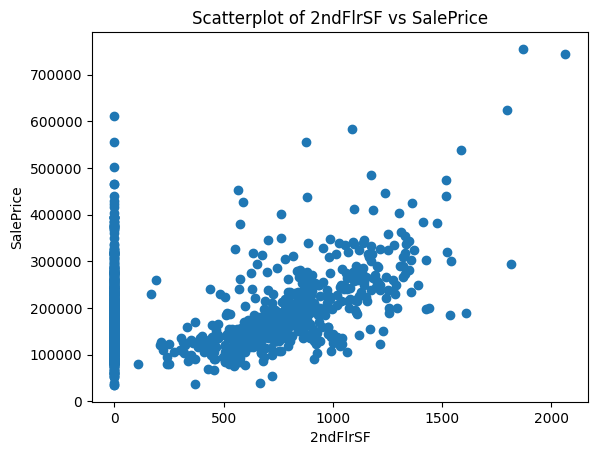

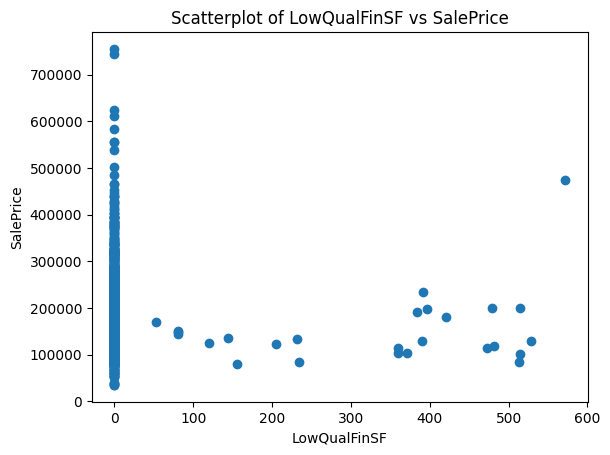

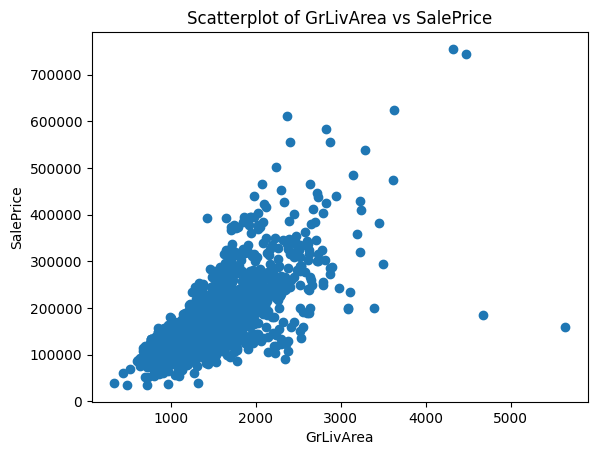

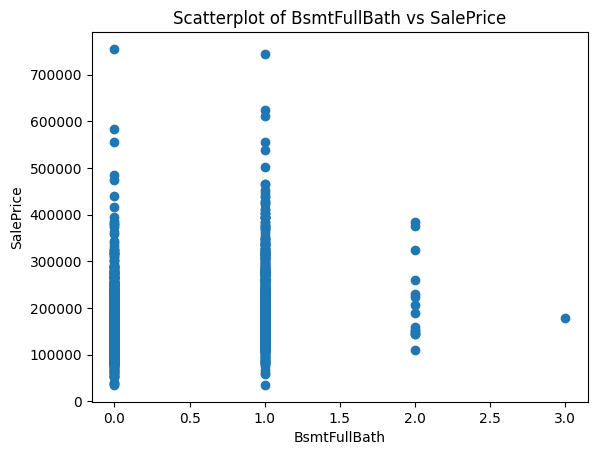

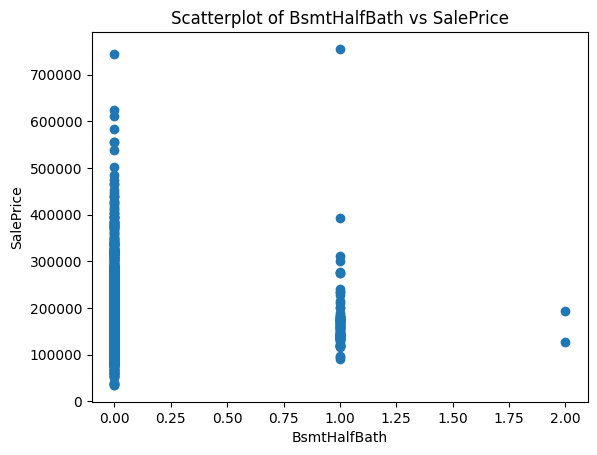

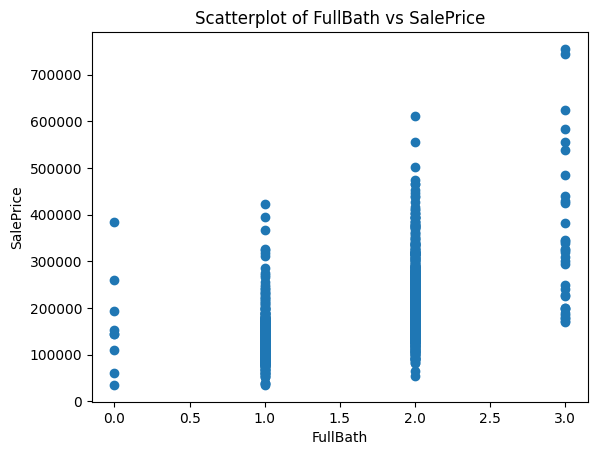

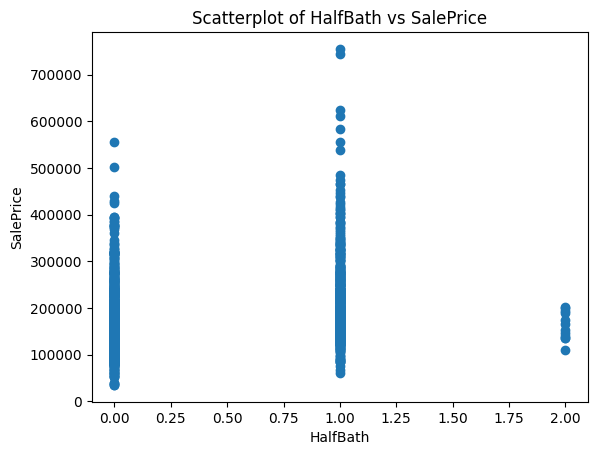

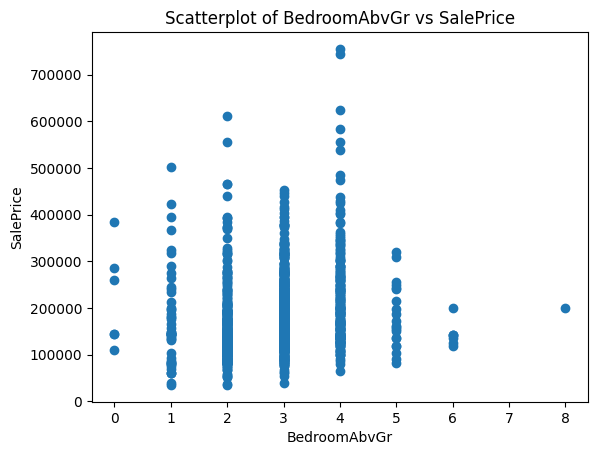

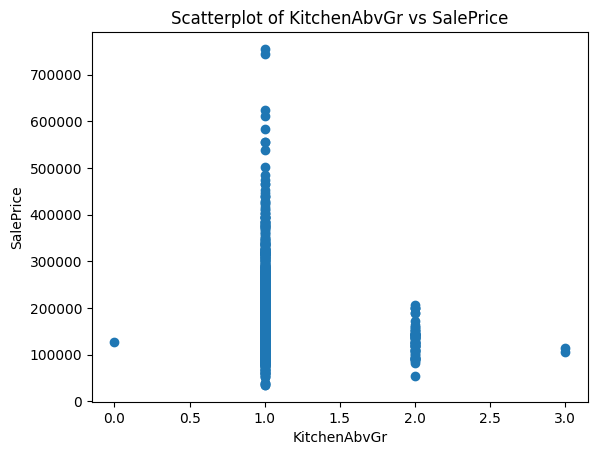

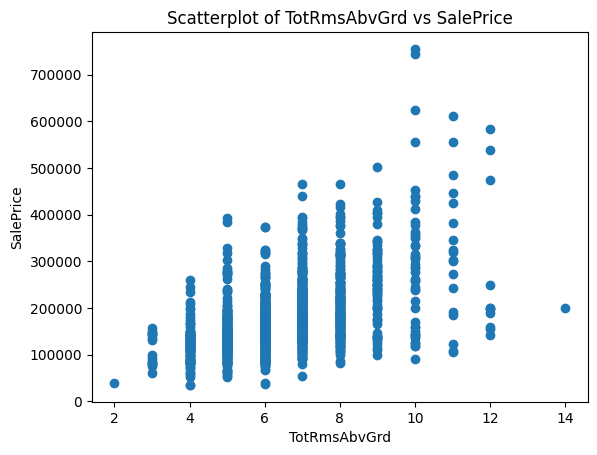

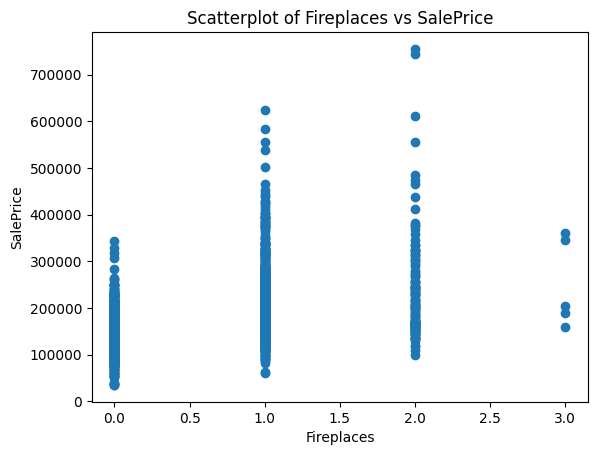

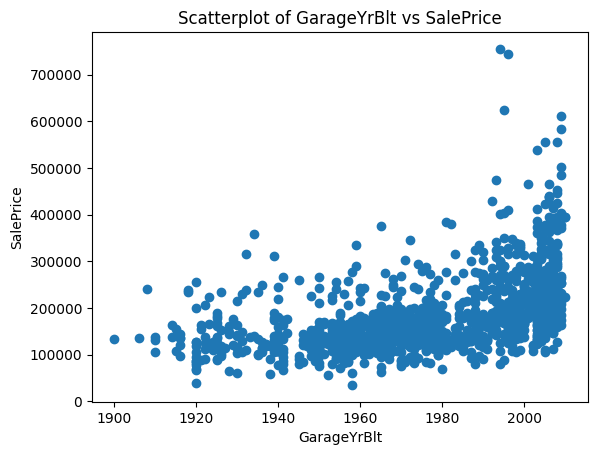

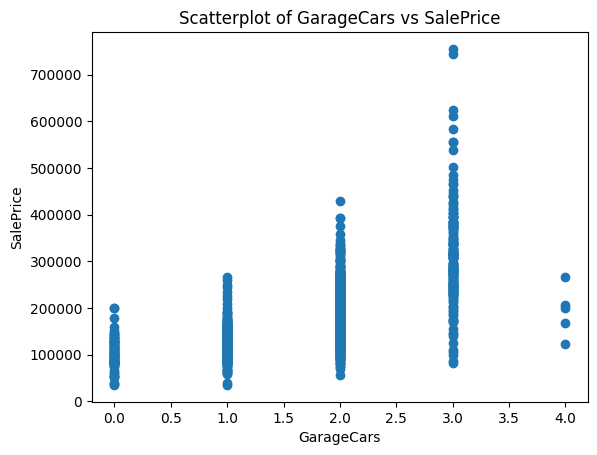

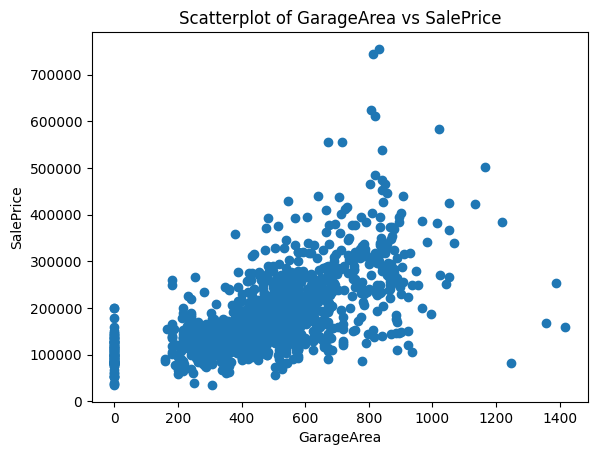

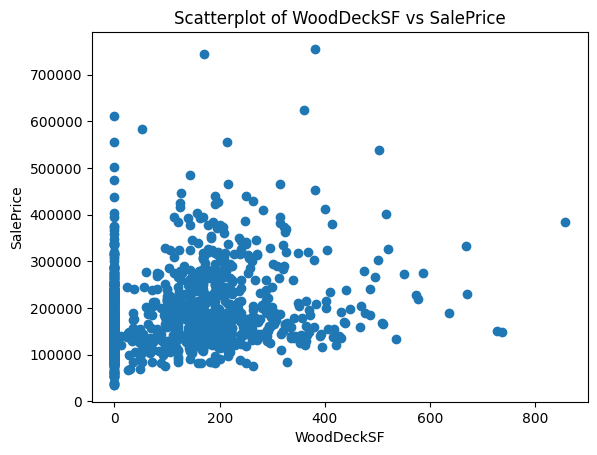

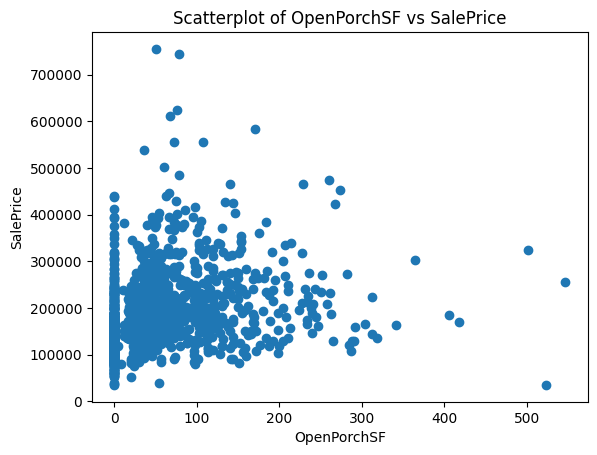

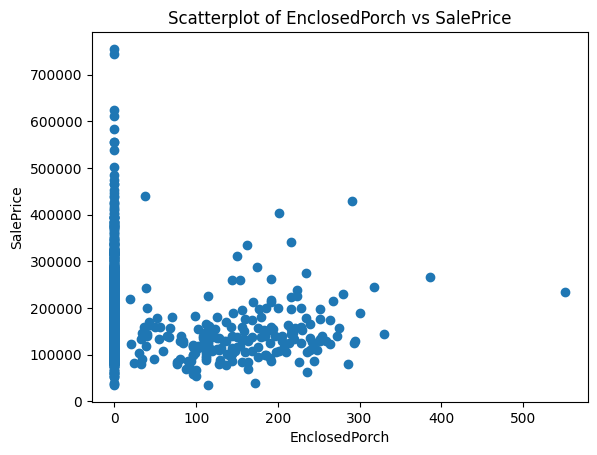

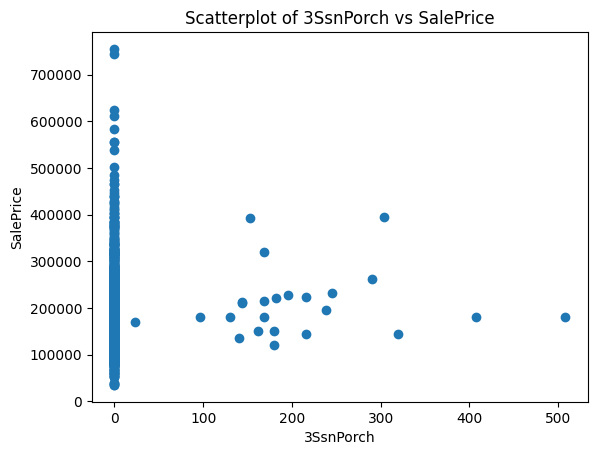

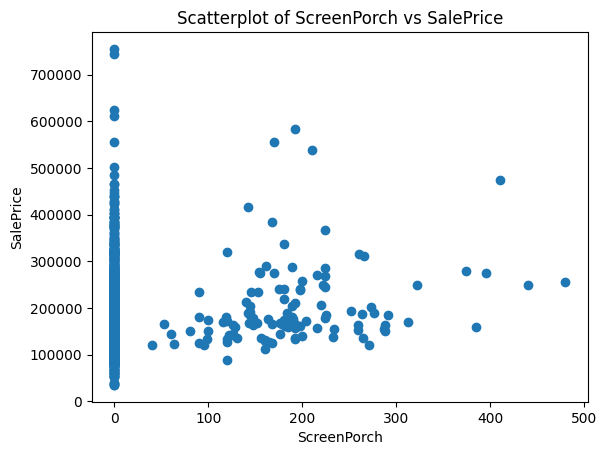

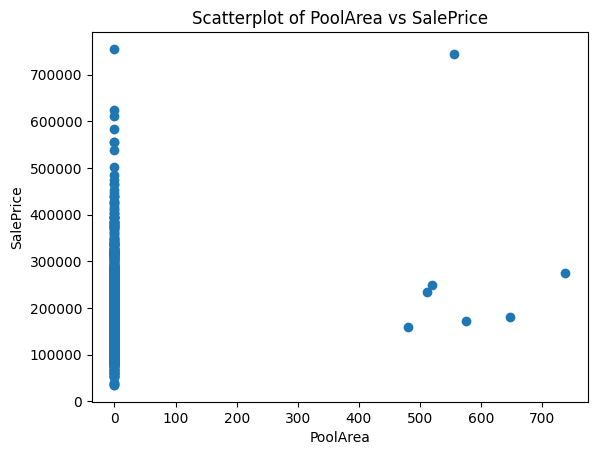

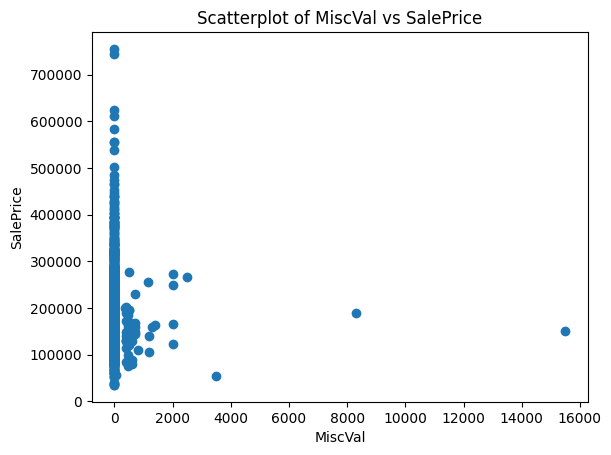

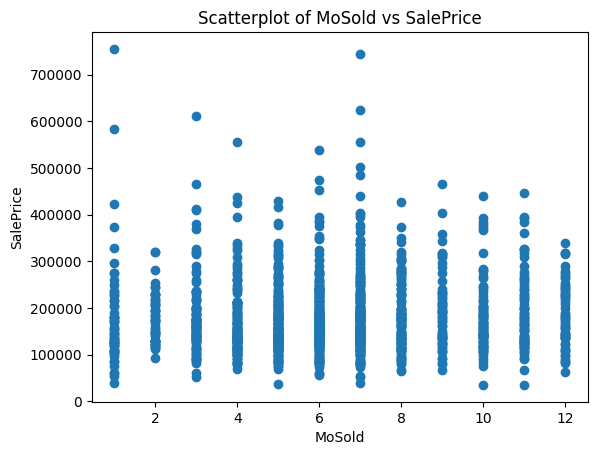

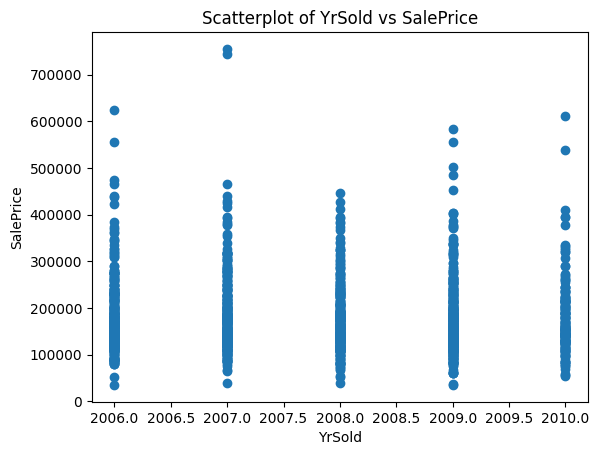

In [30]:
# Scatterplot
for i in con:
    if i!='SalePrice':
        plt.scatter(df[i],df['SalePrice'])
        plt.xlabel(f'{i}')
        plt.ylabel('SalePrice')
        plt.title(f'Scatterplot of {i} vs SalePrice')
        plt.show()

In [31]:
## Correlation Heatmap
df[con].corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

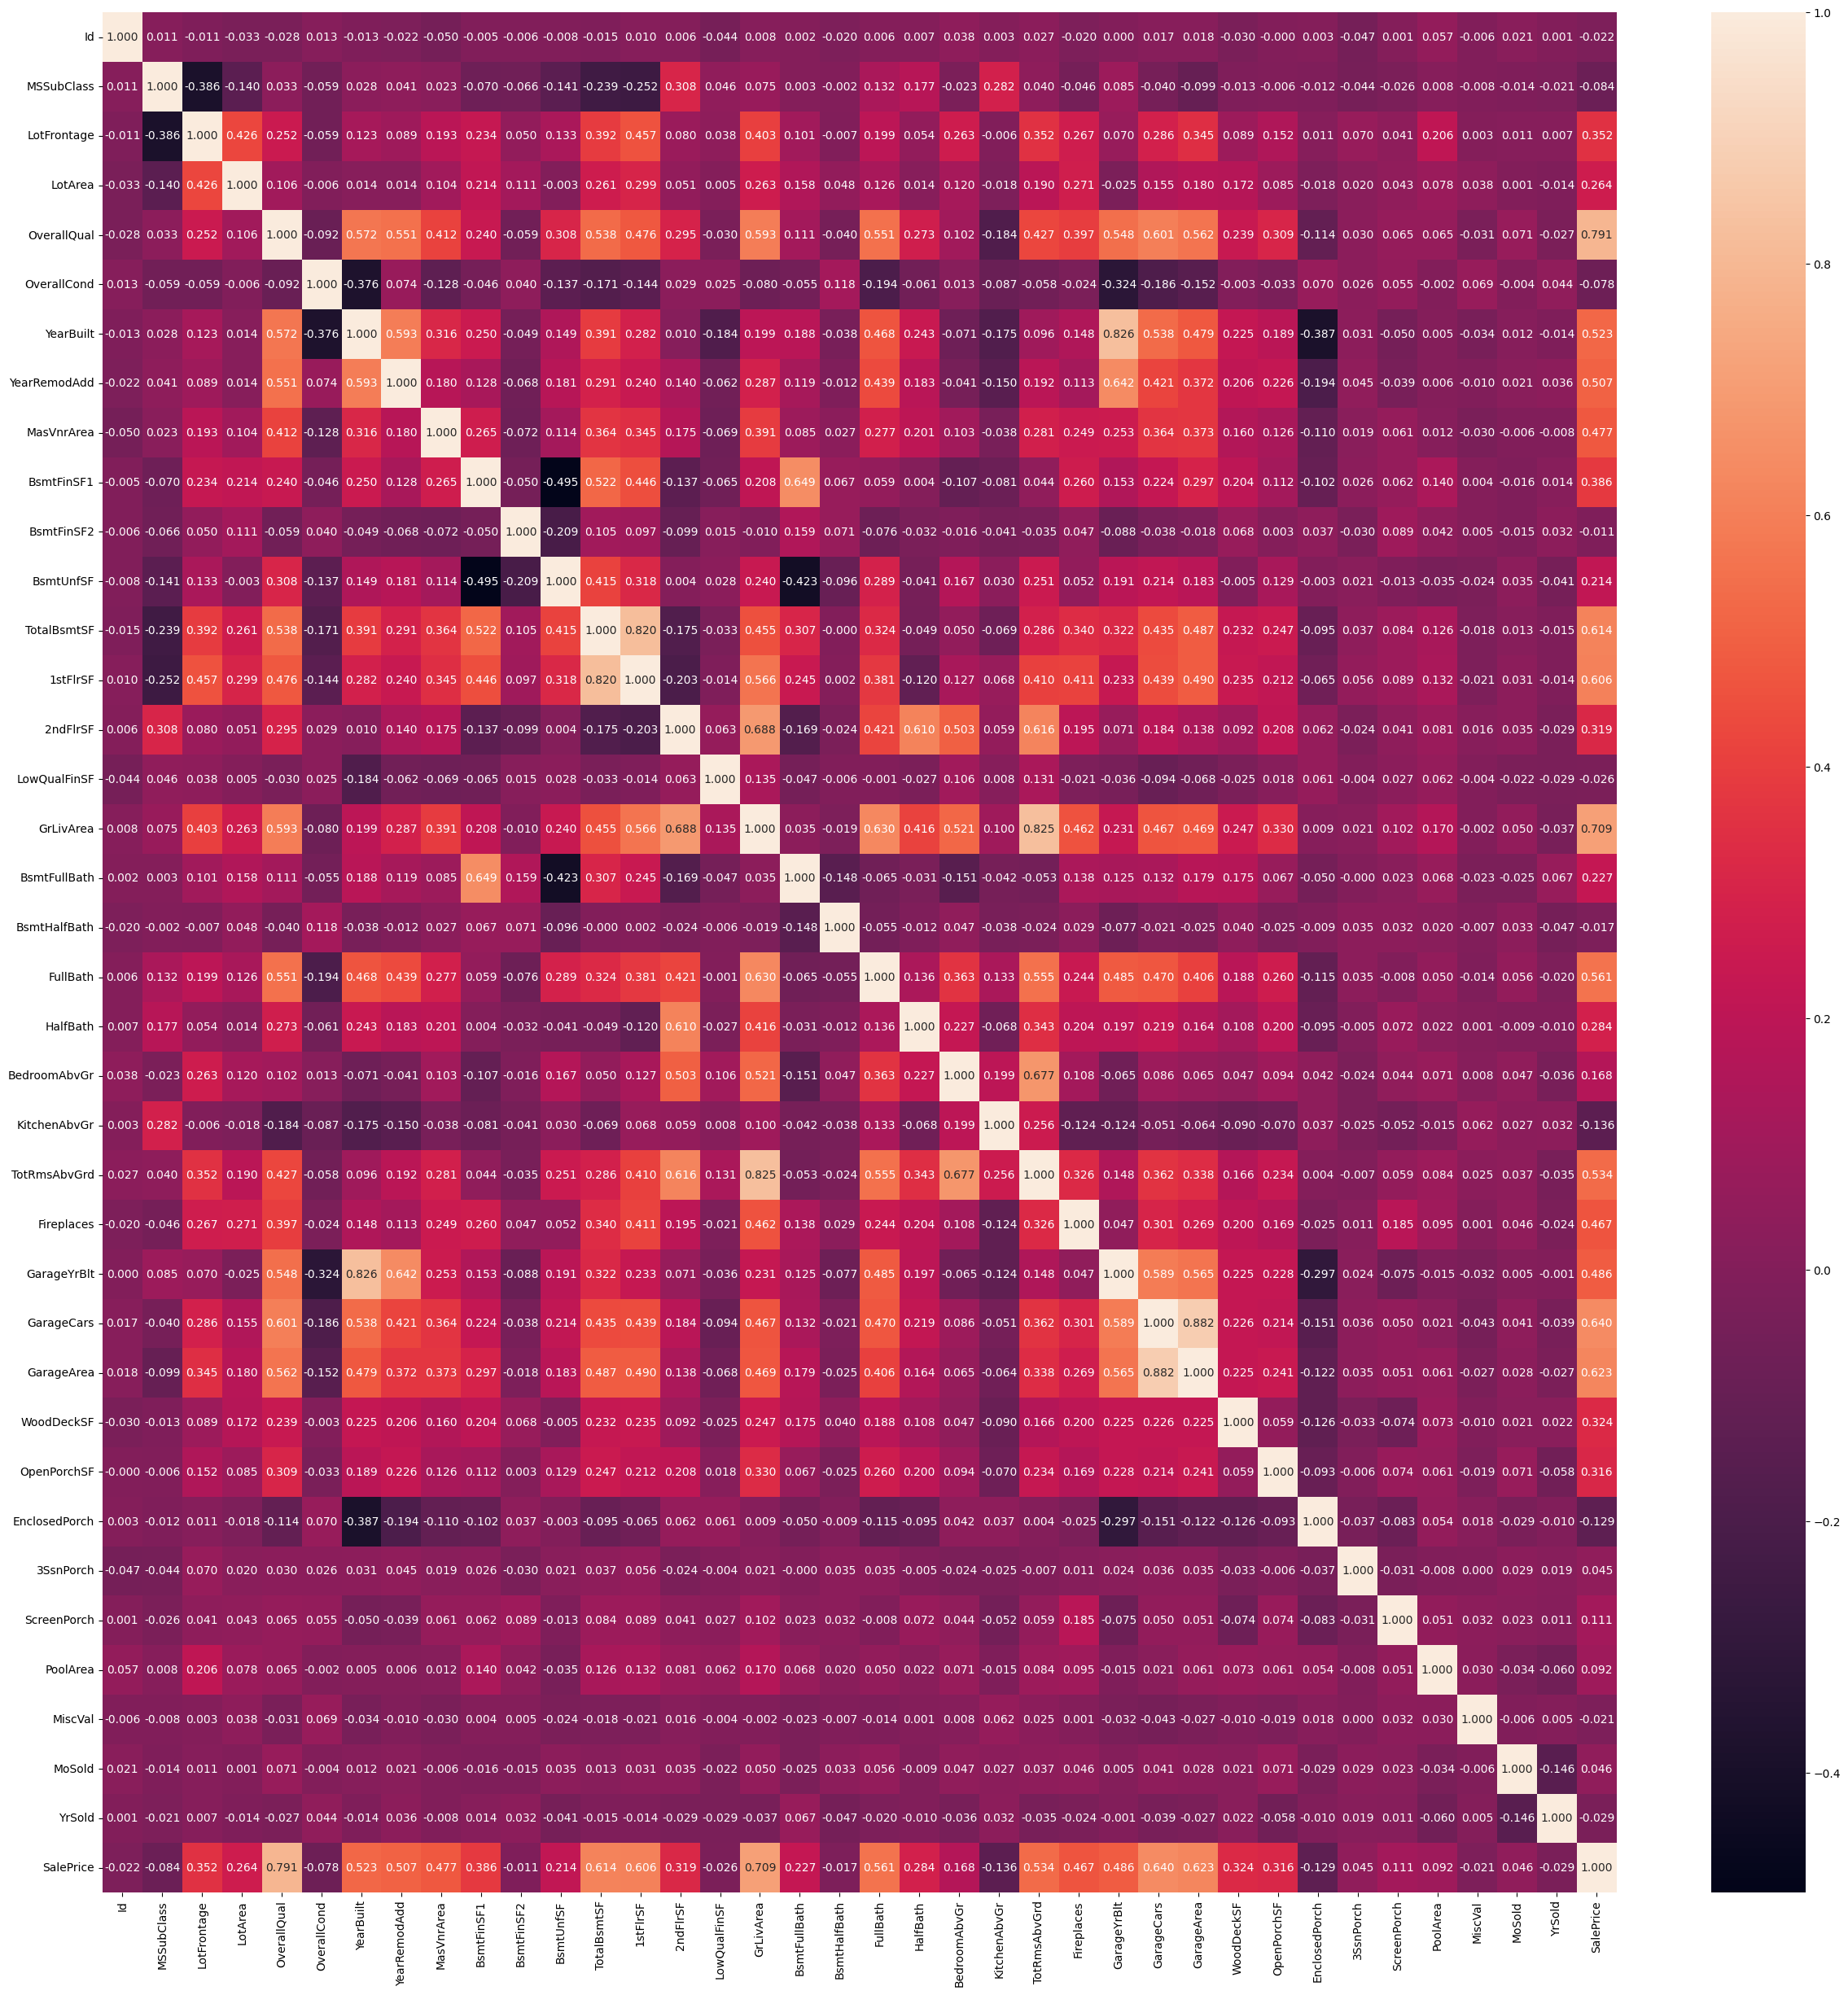

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(df[con].corr(),annot=True,fmt='.3f')
plt.show()

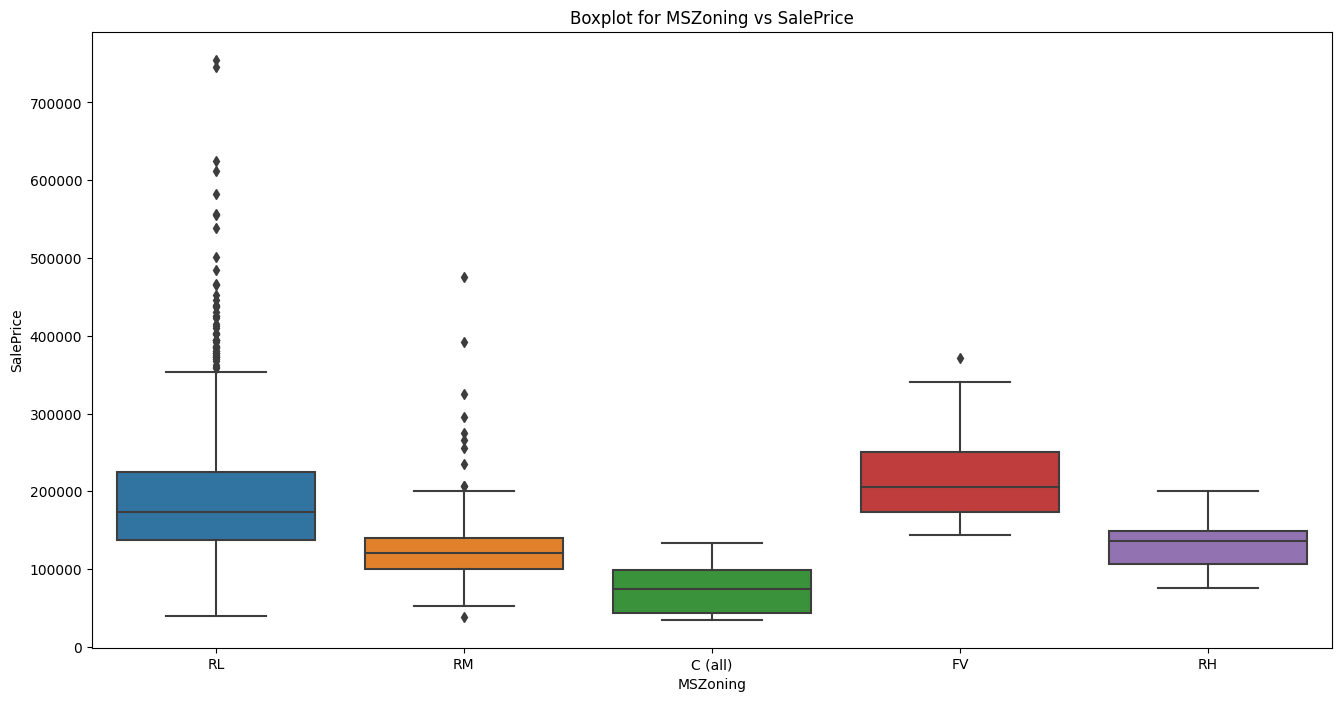

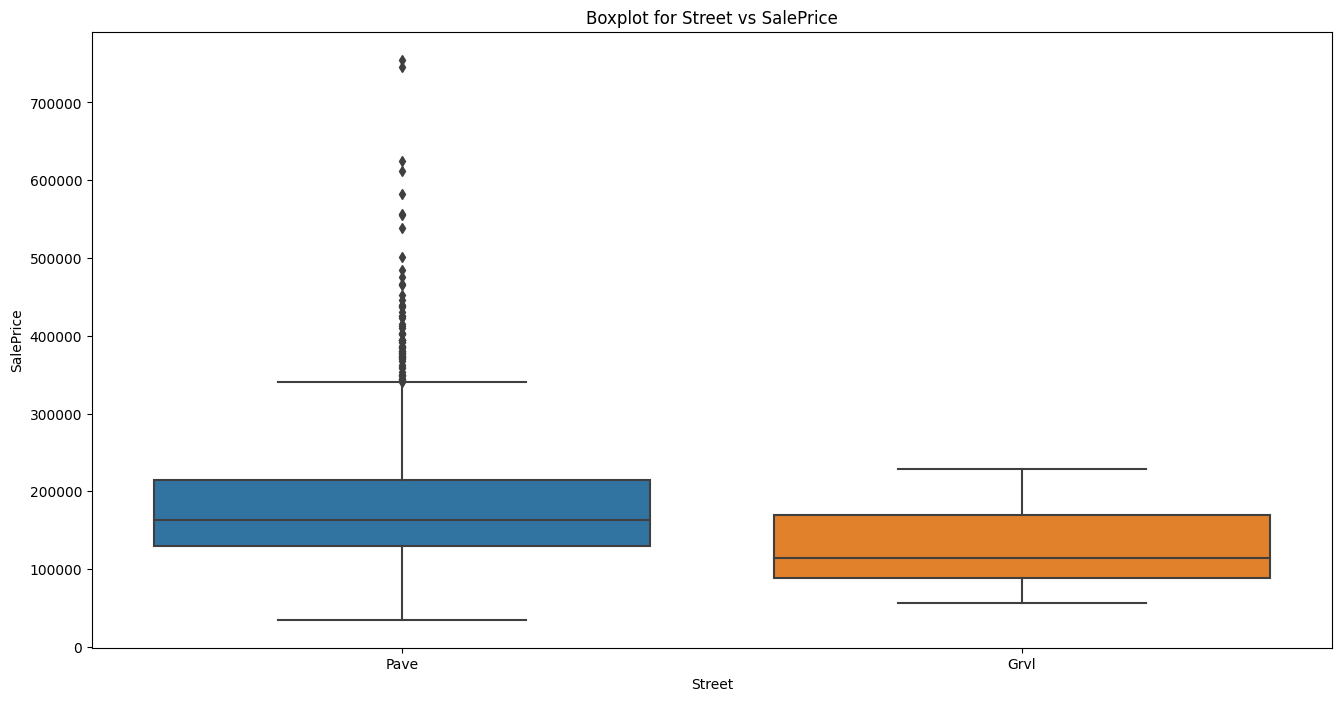

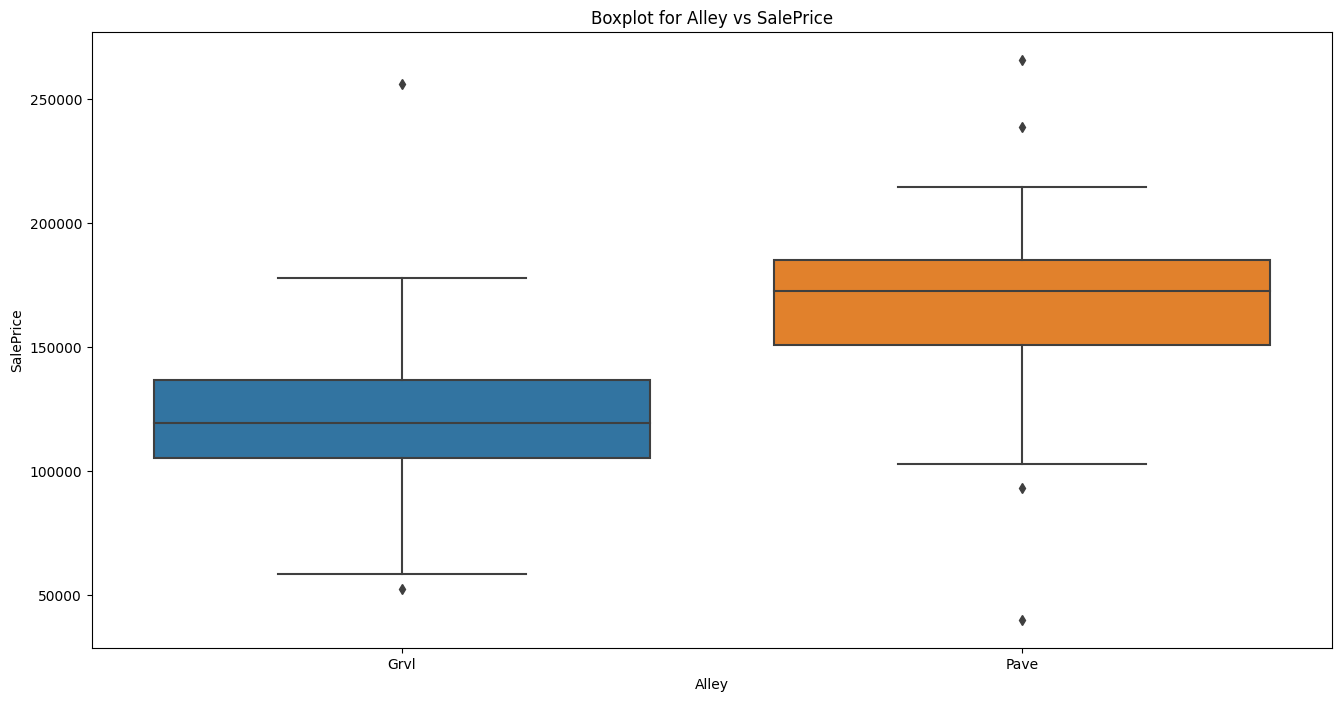

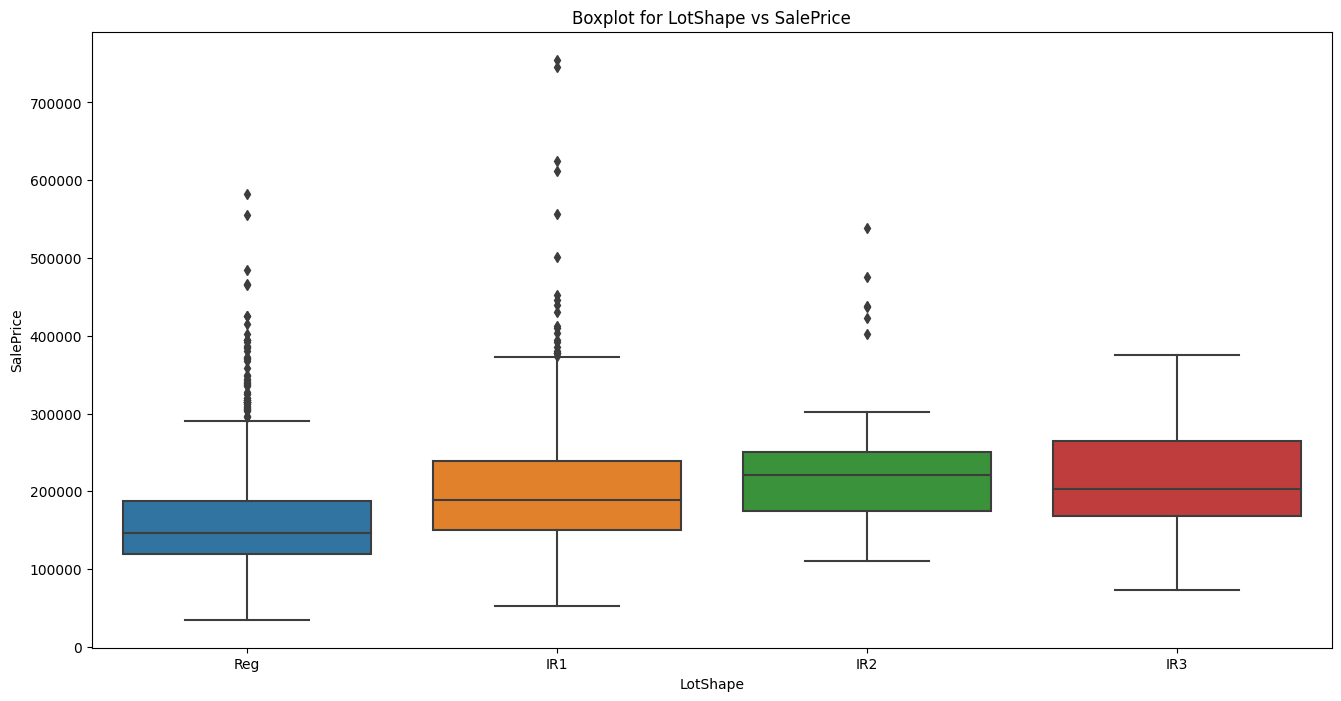

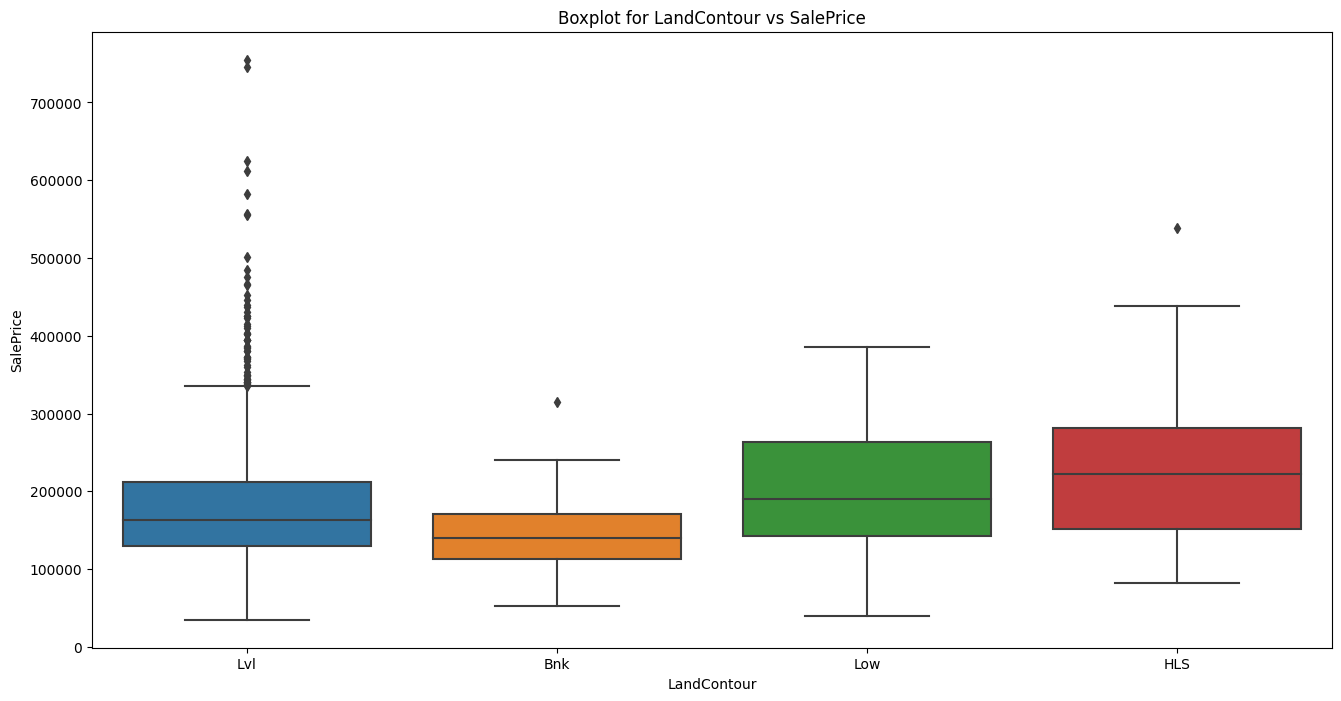

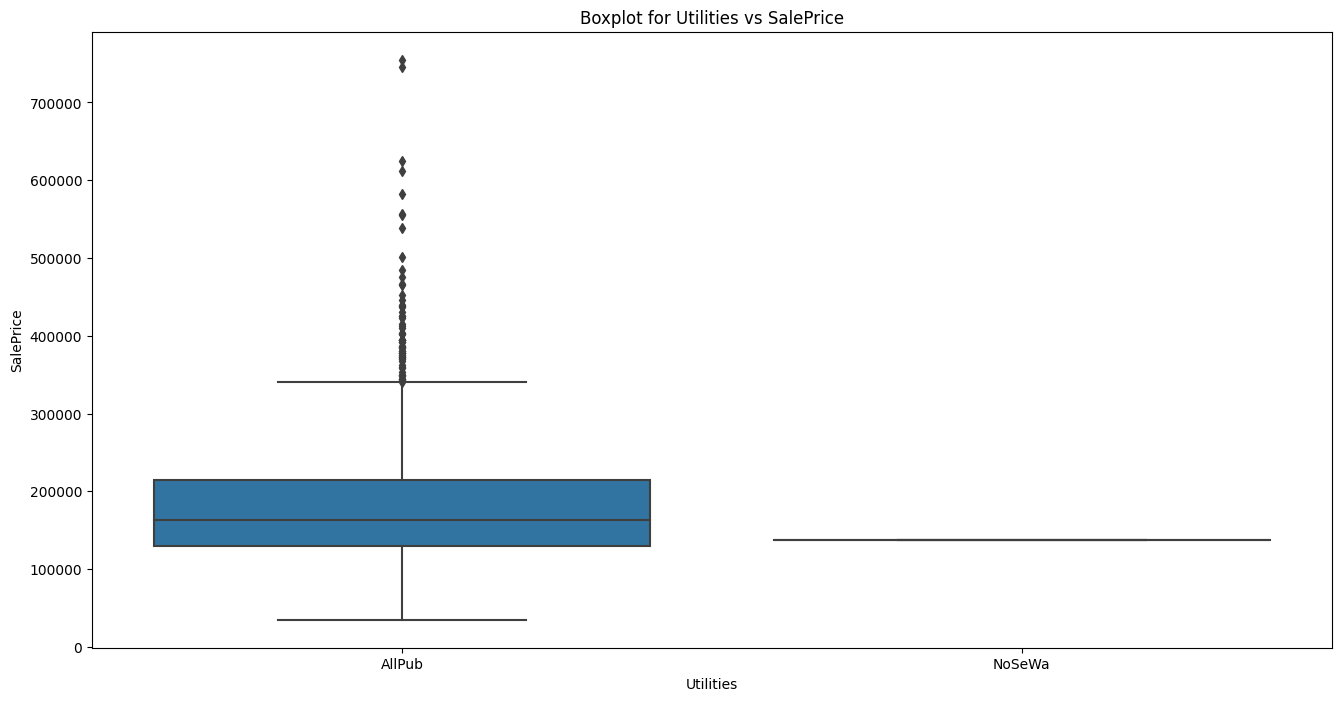

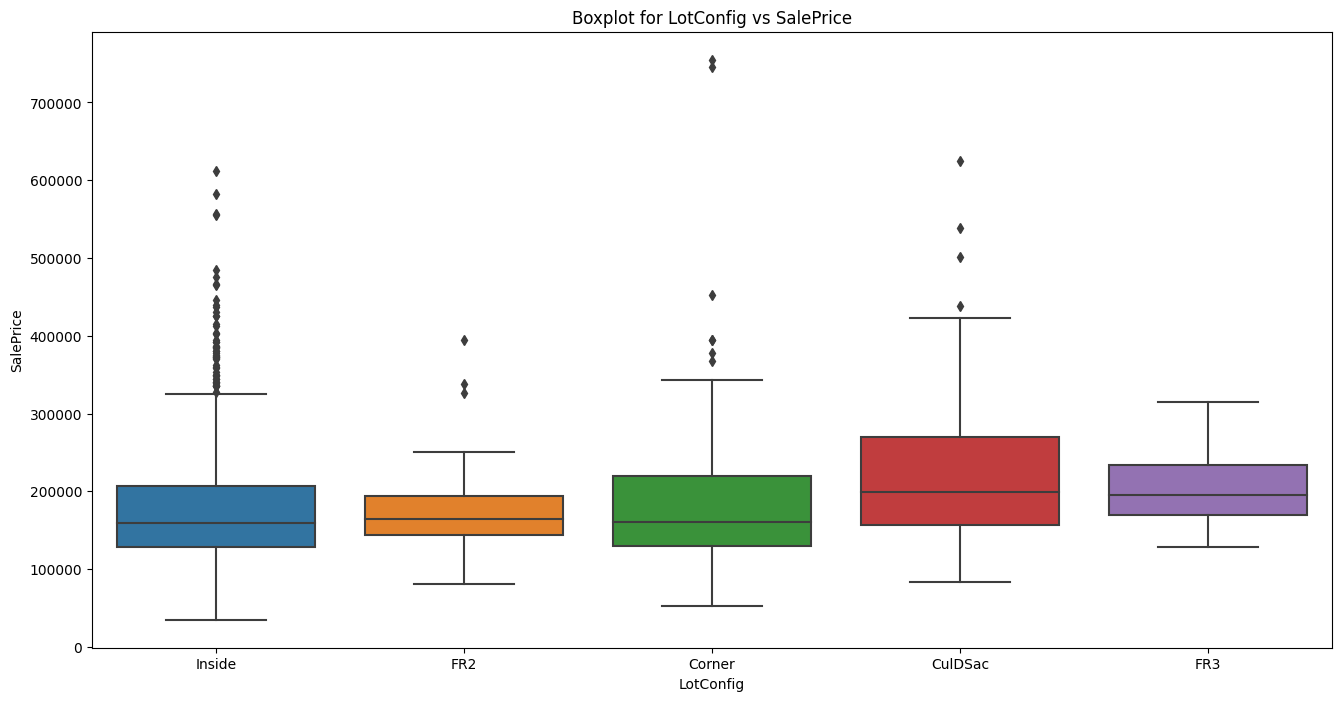

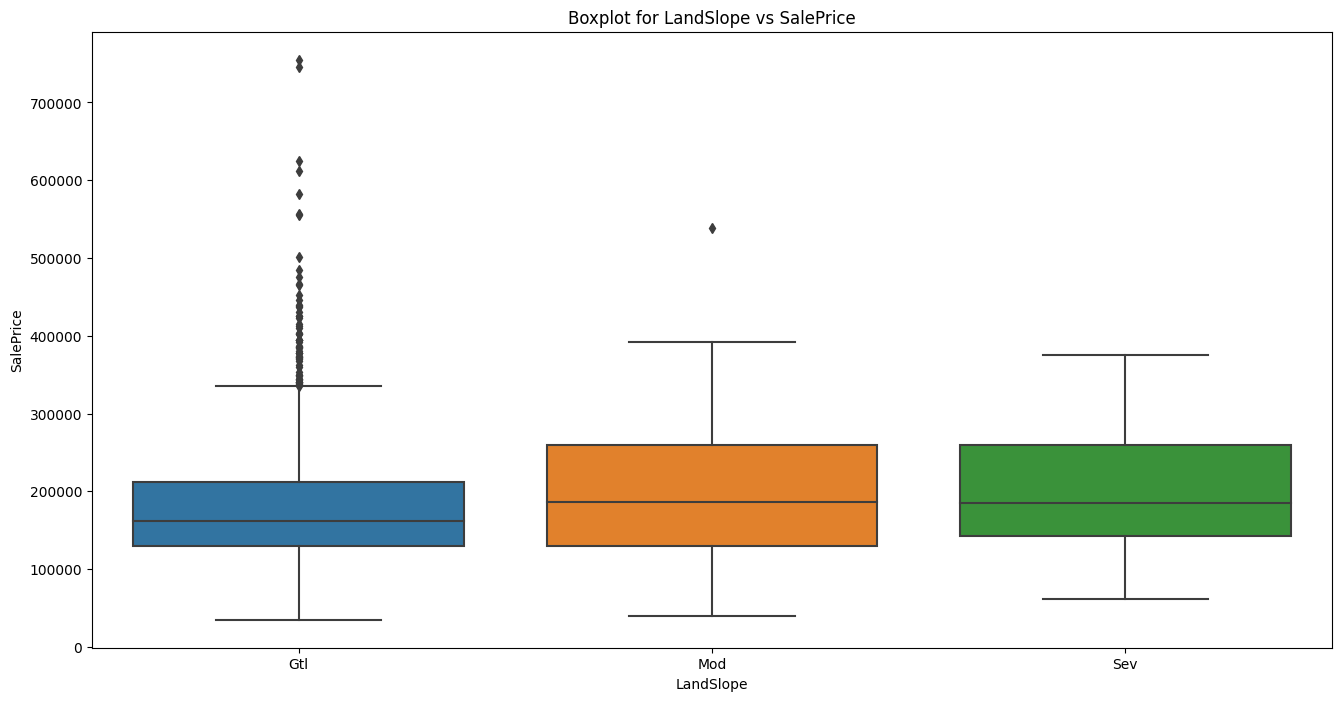

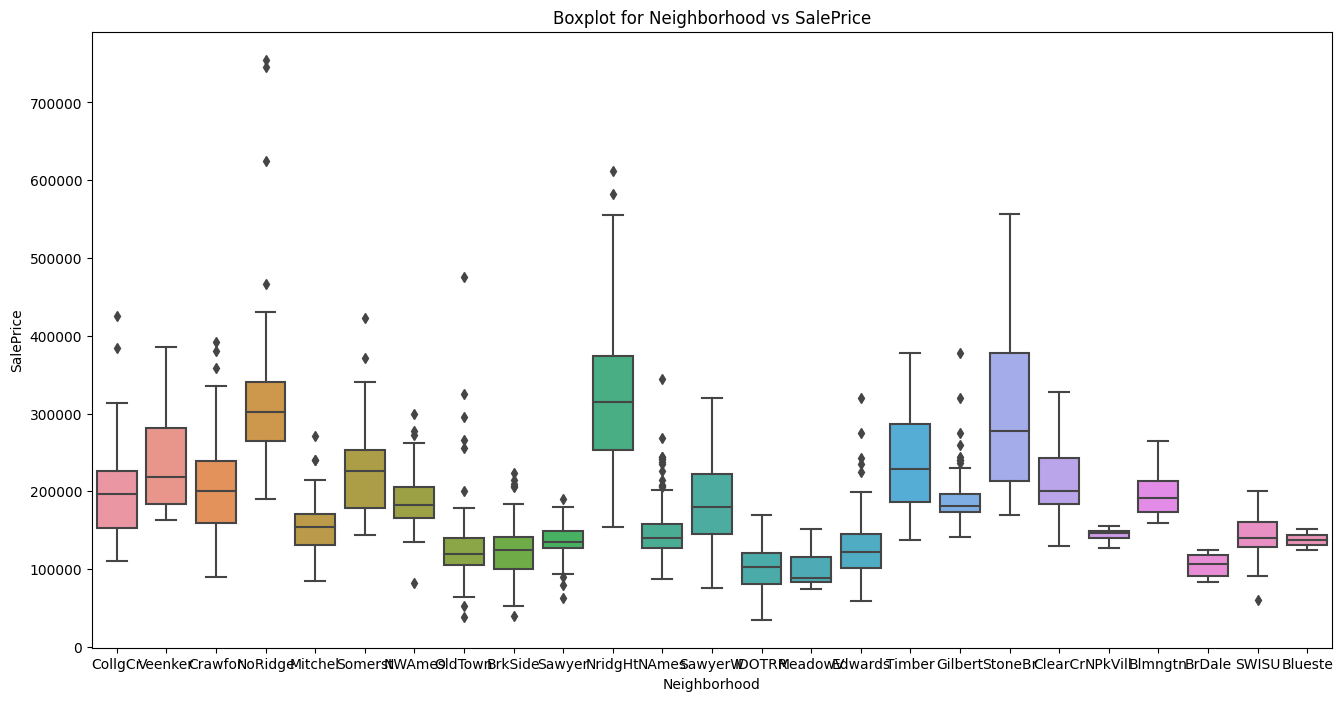

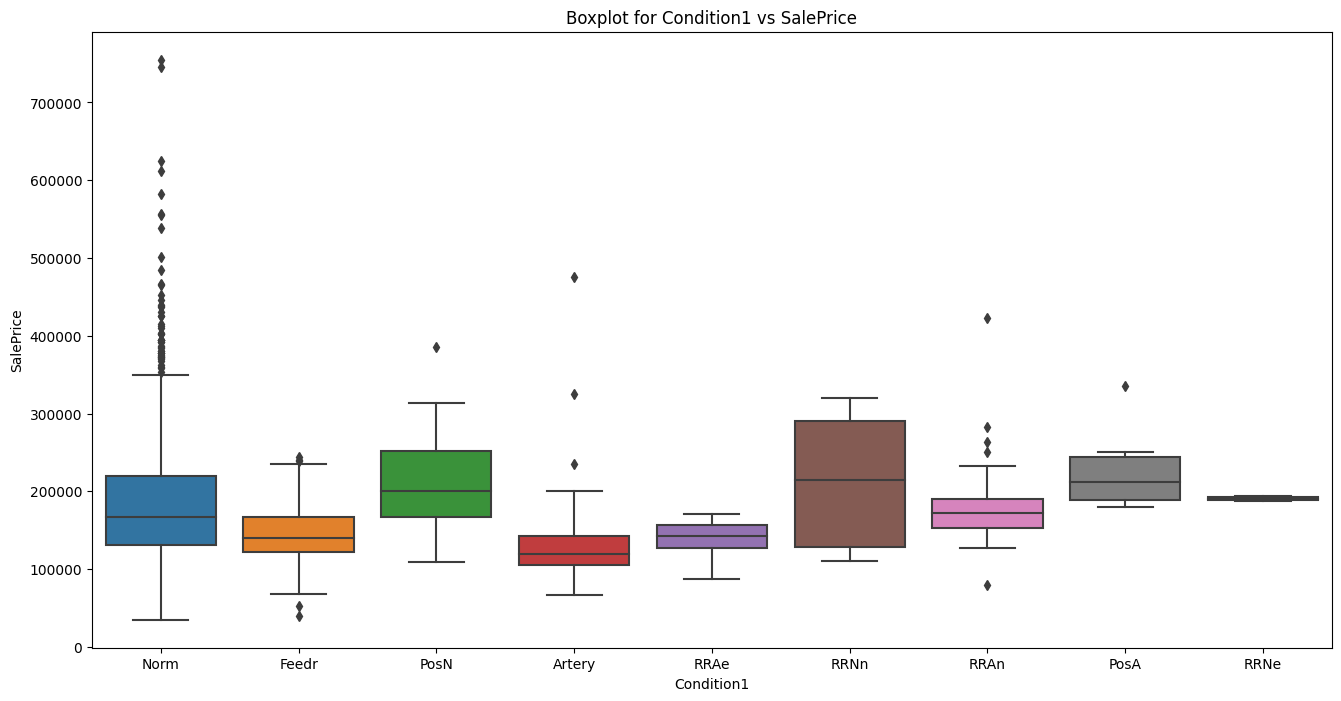

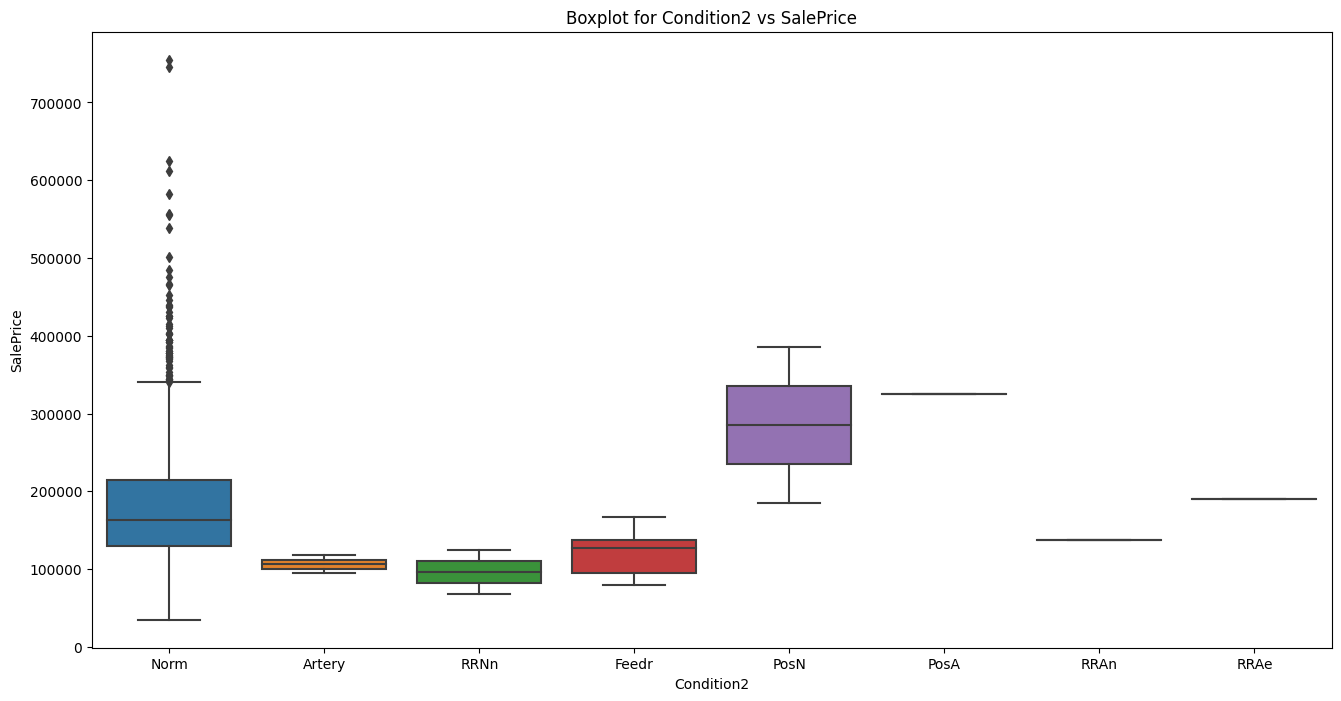

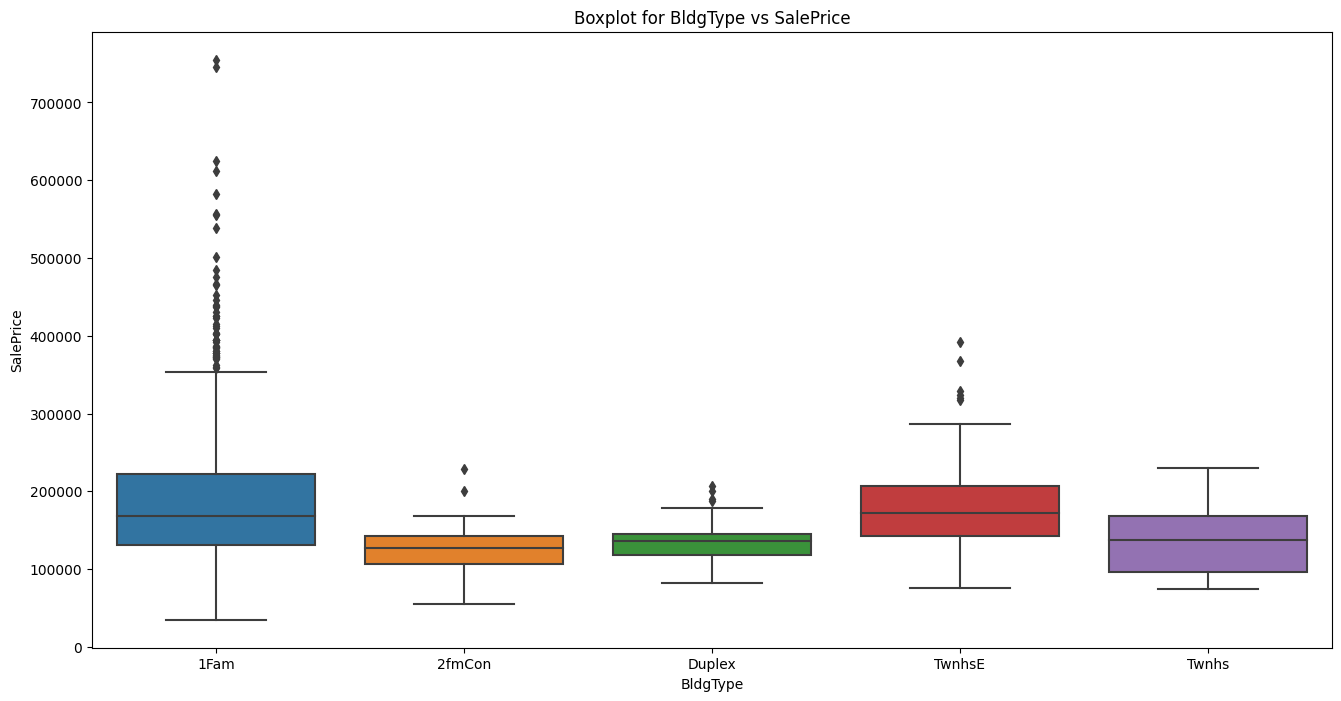

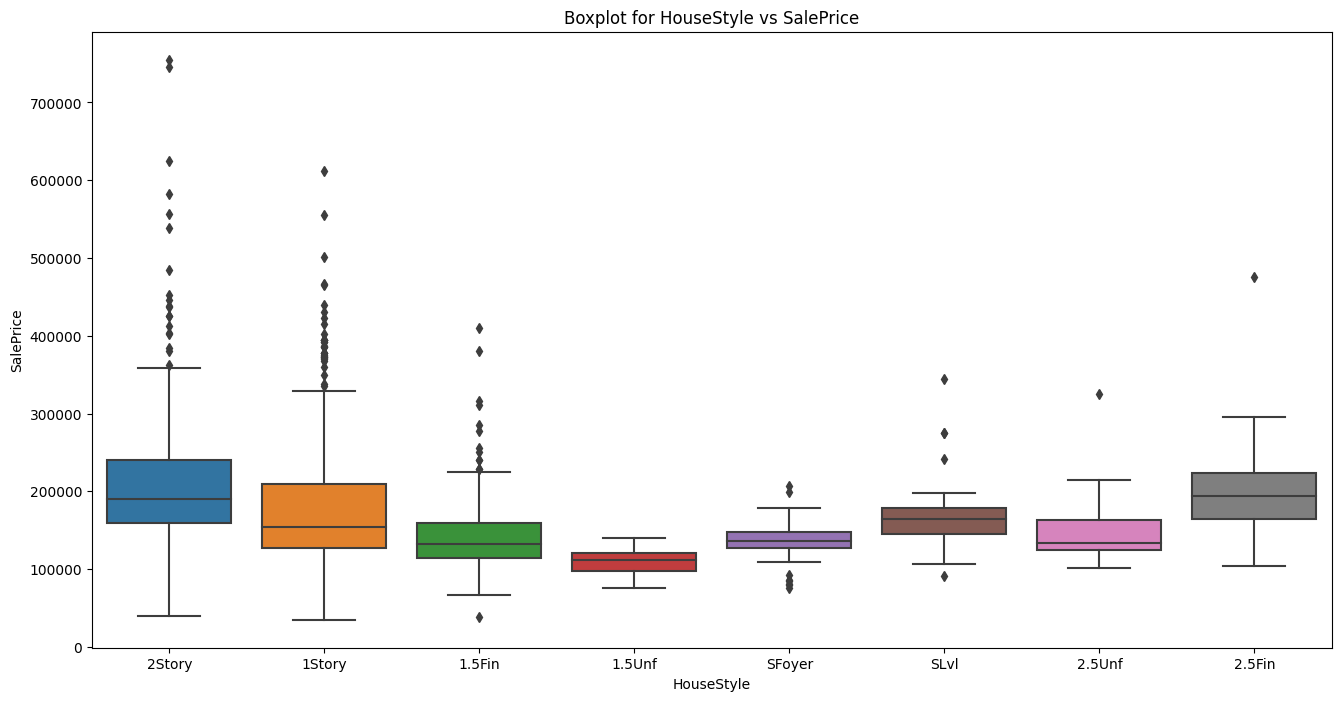

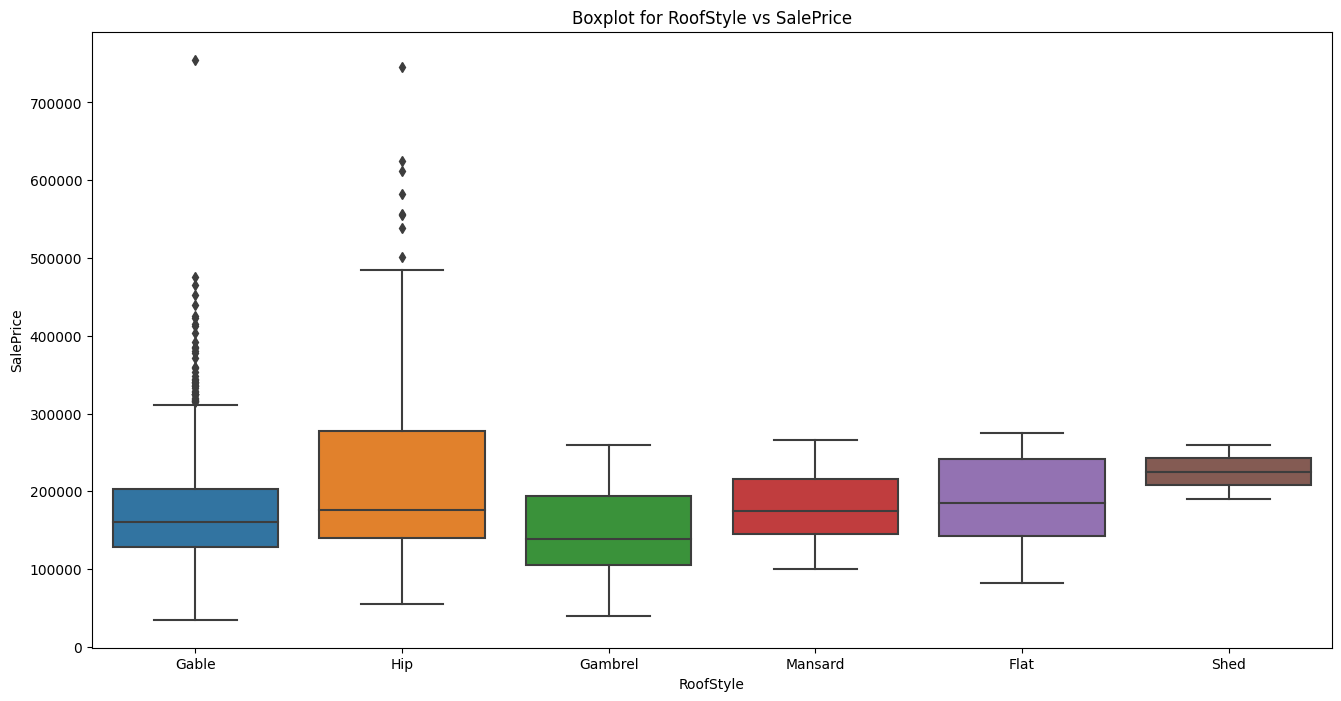

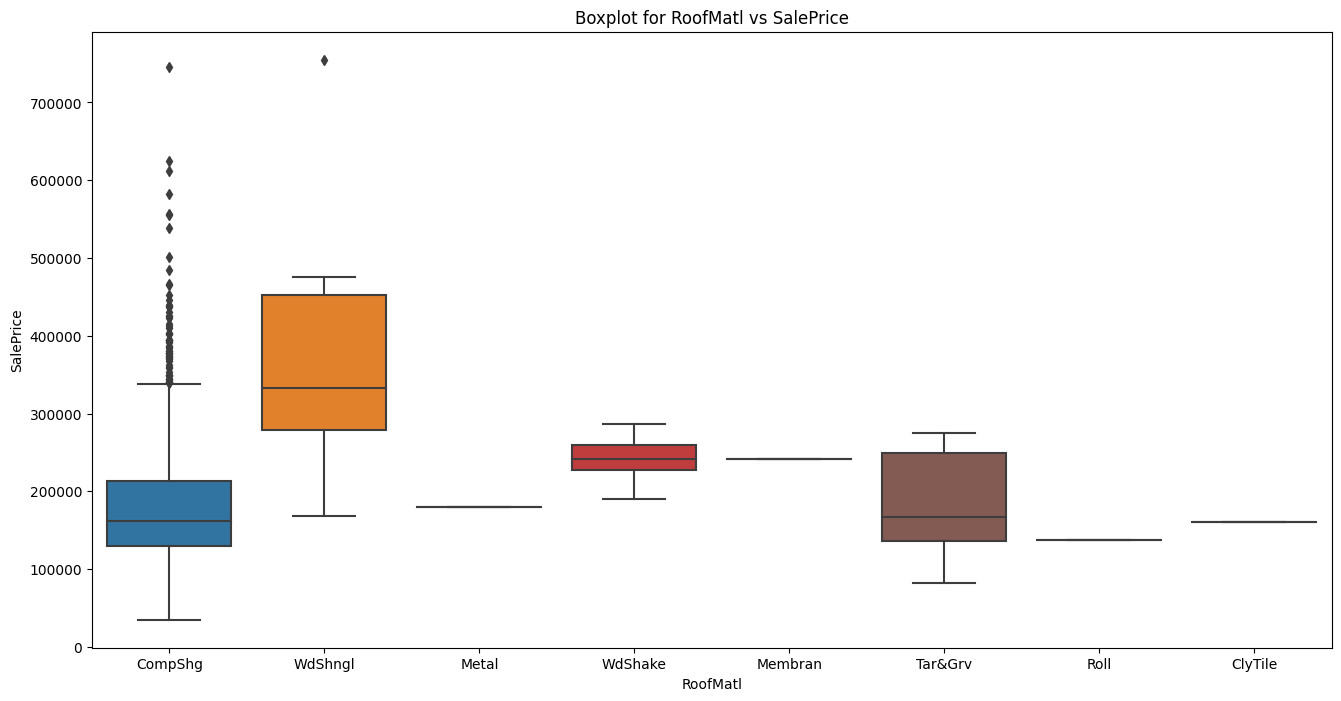

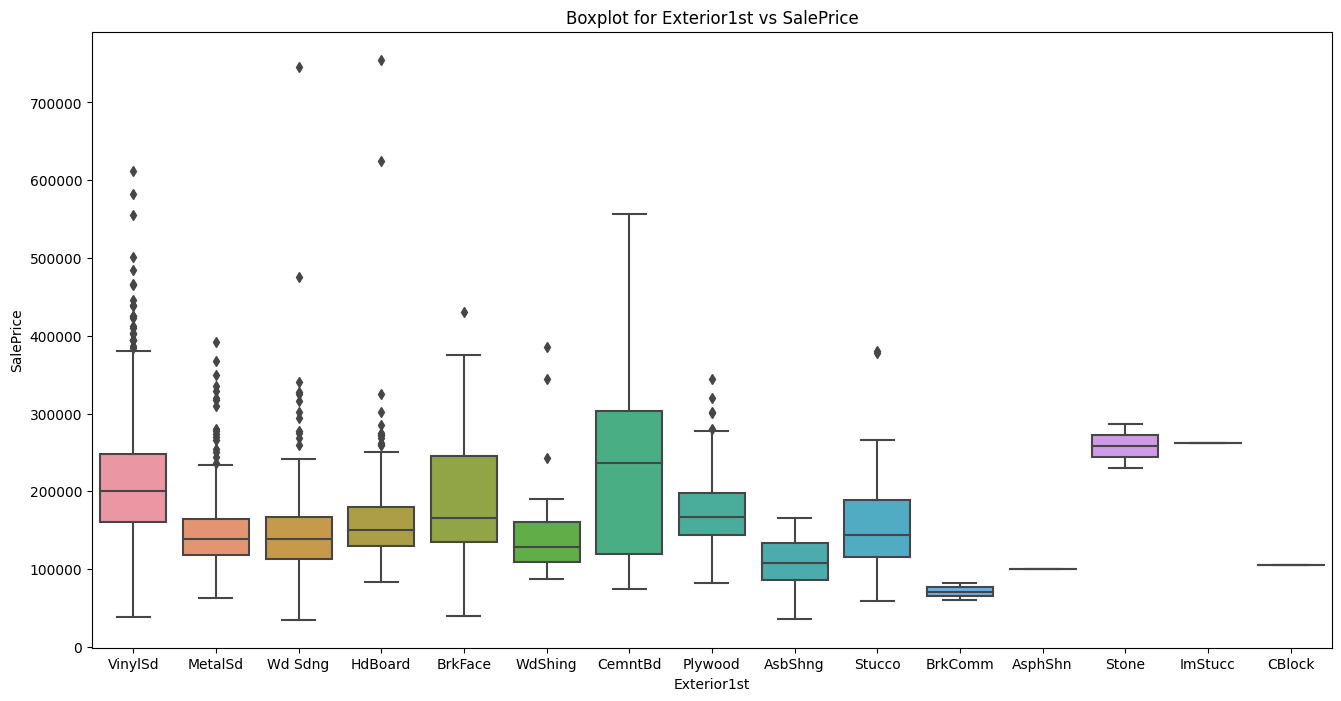

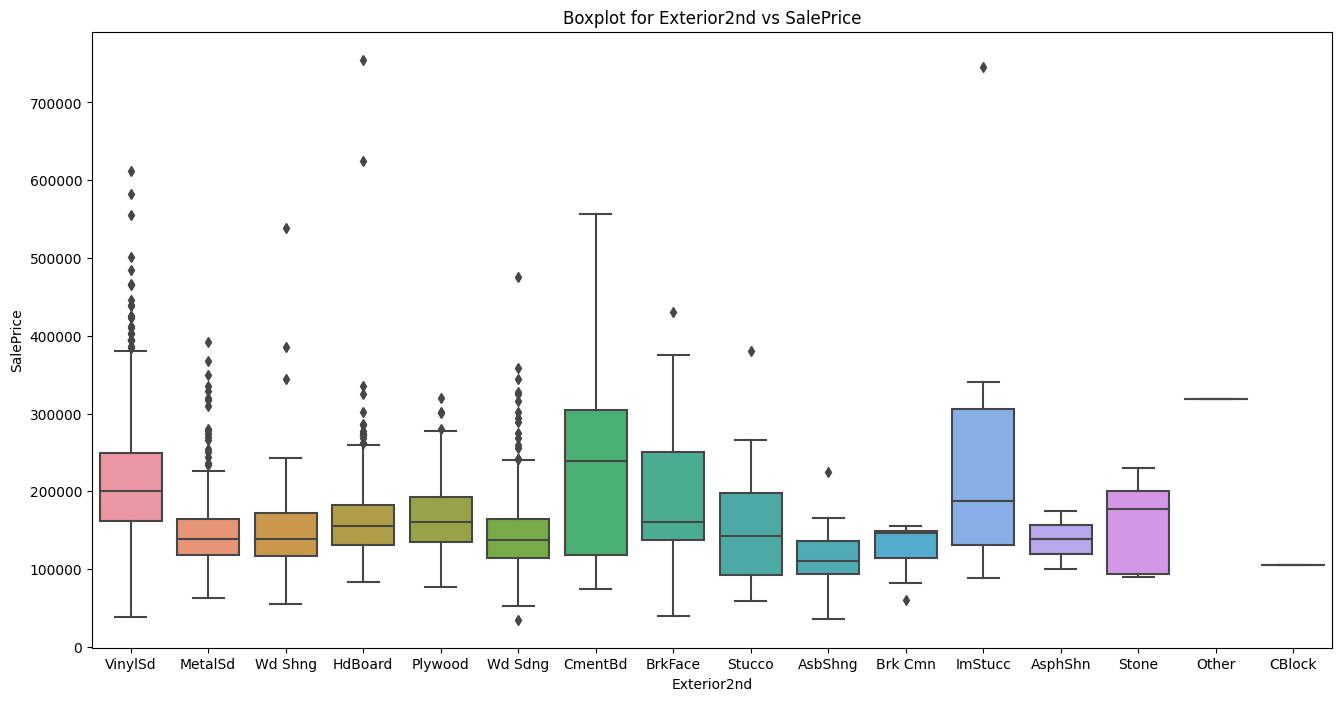

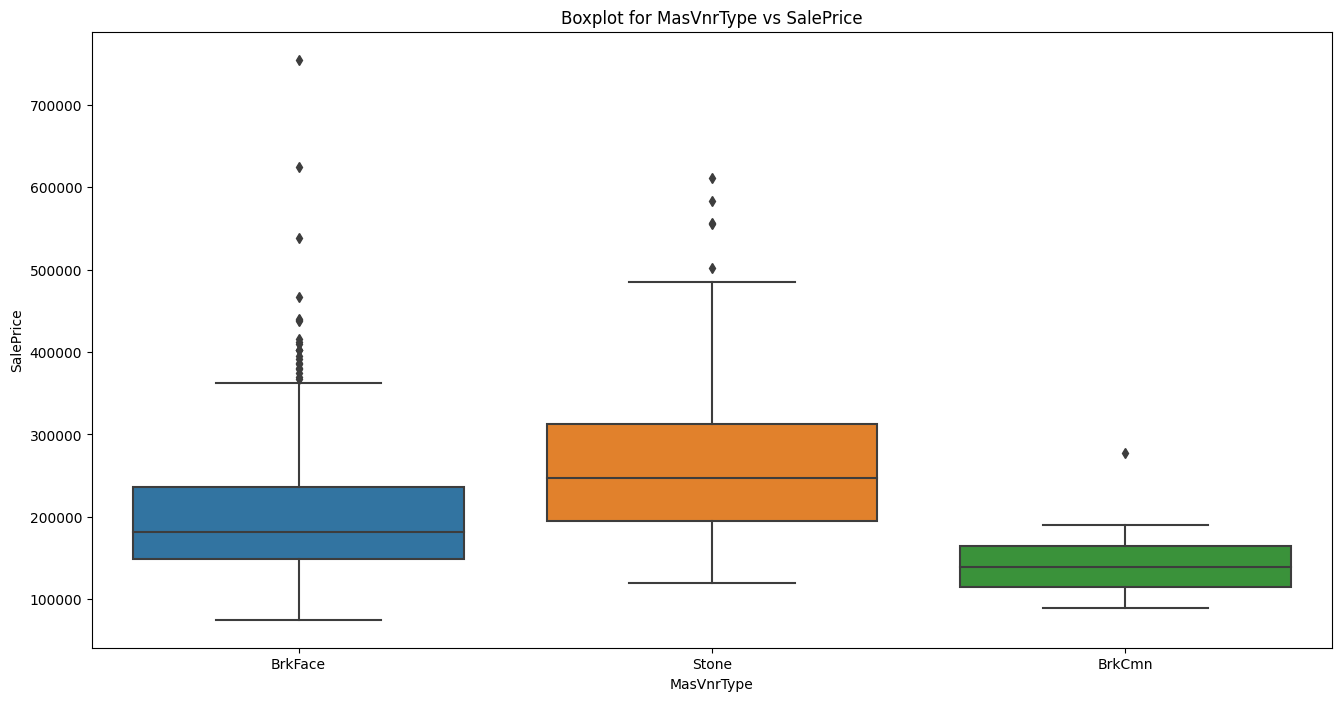

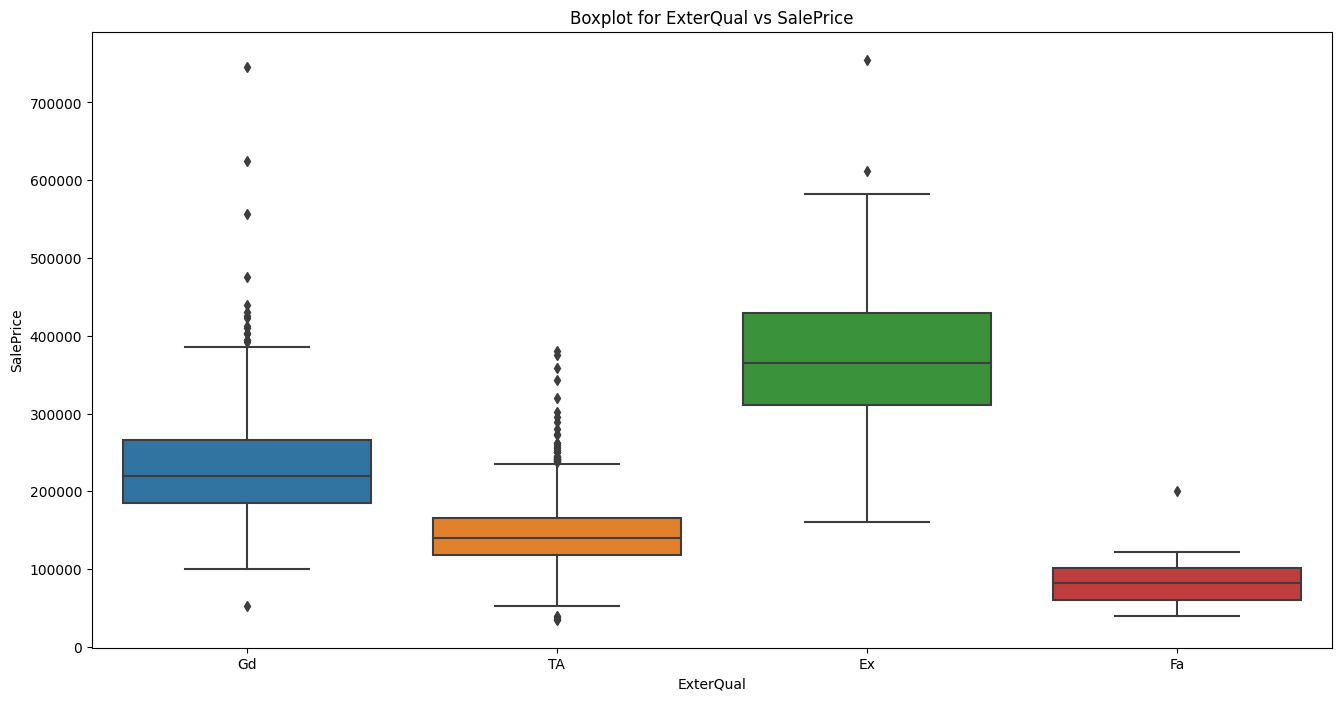

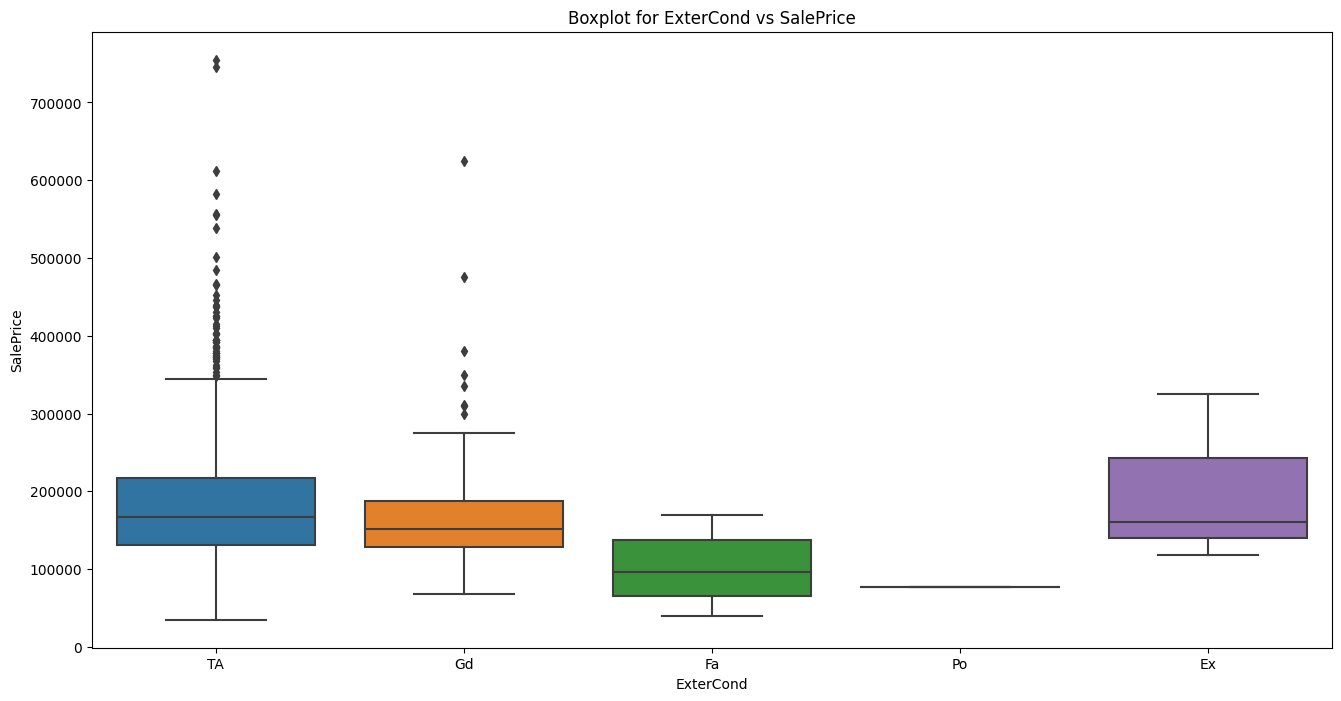

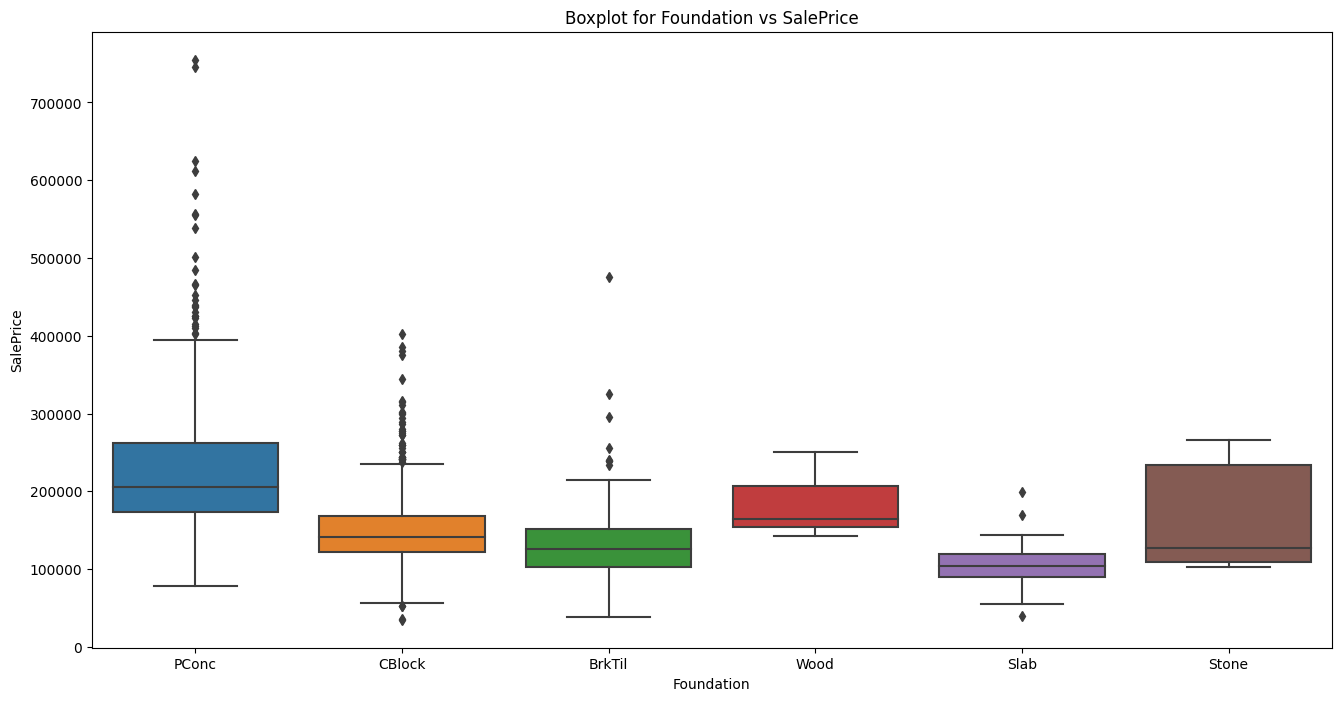

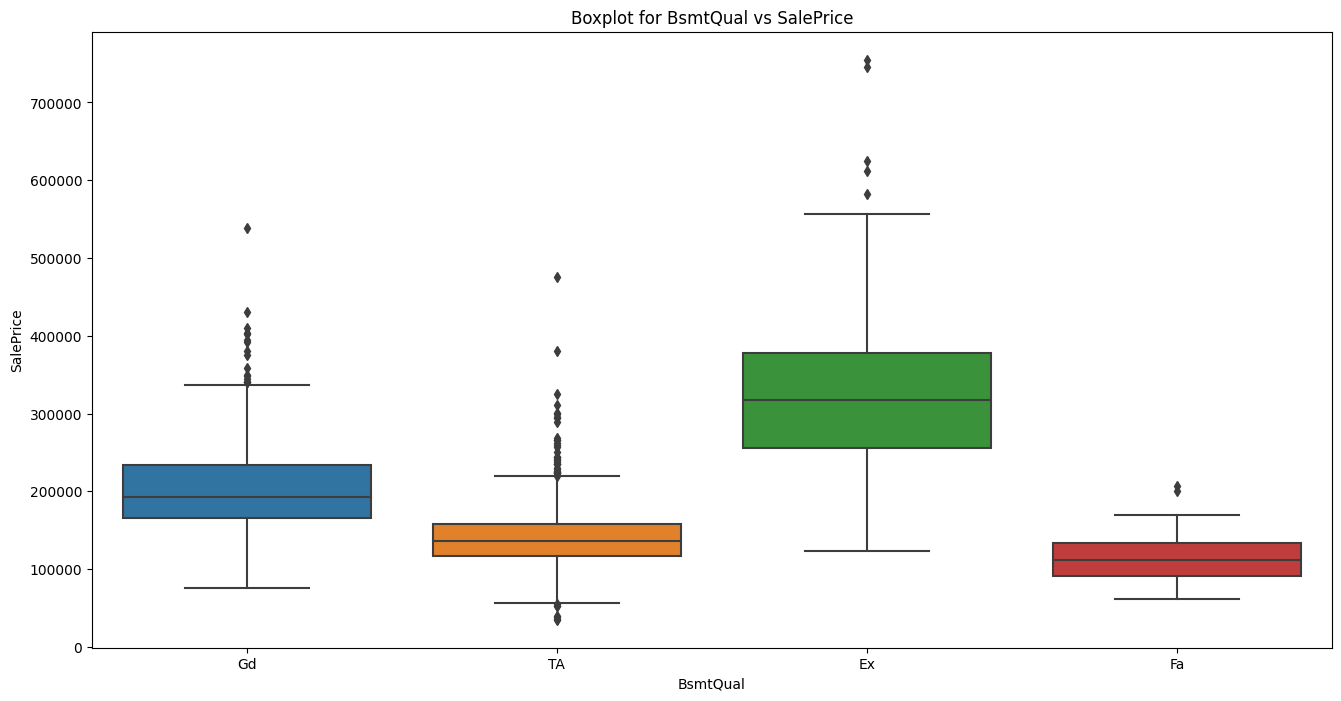

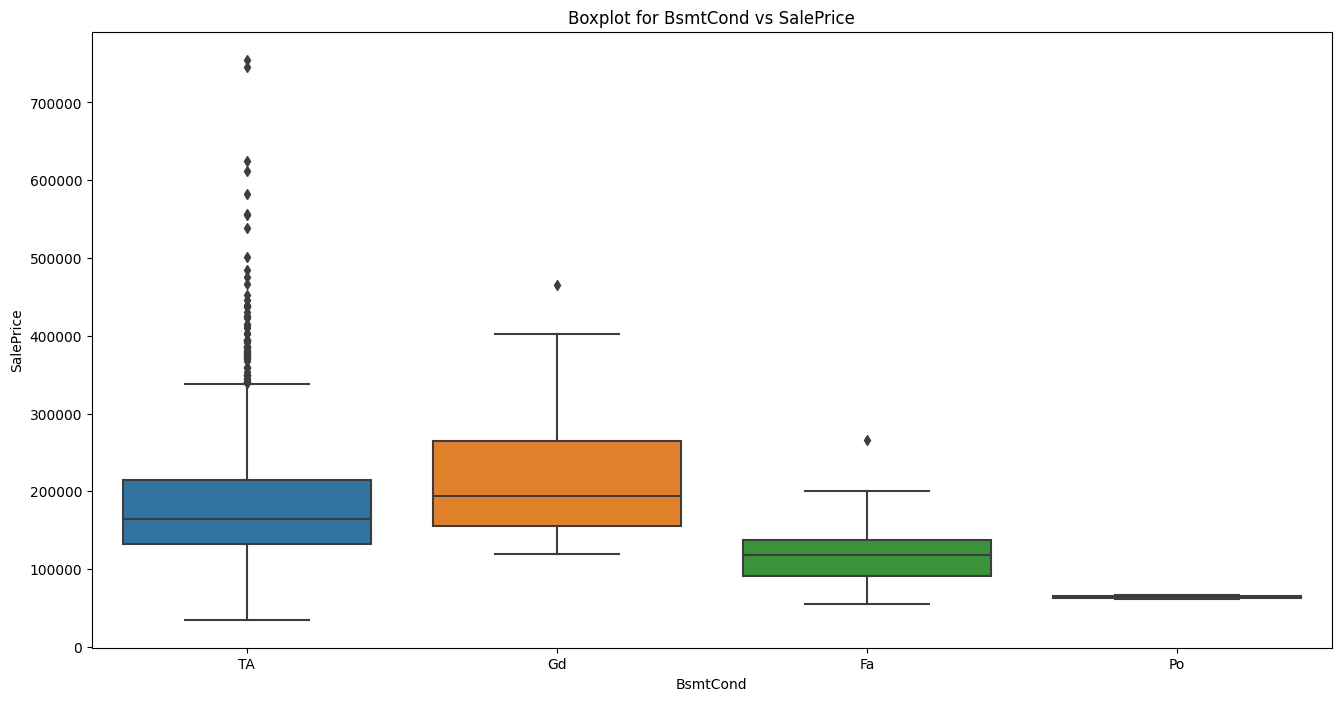

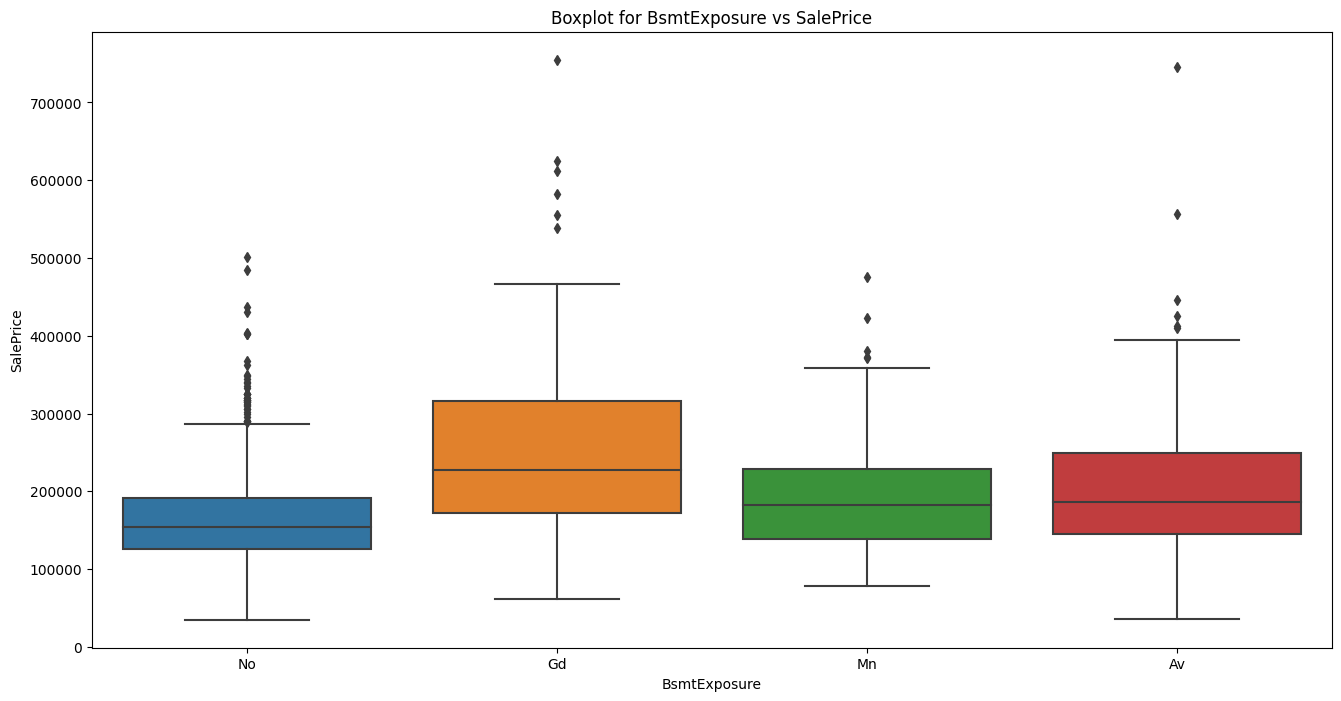

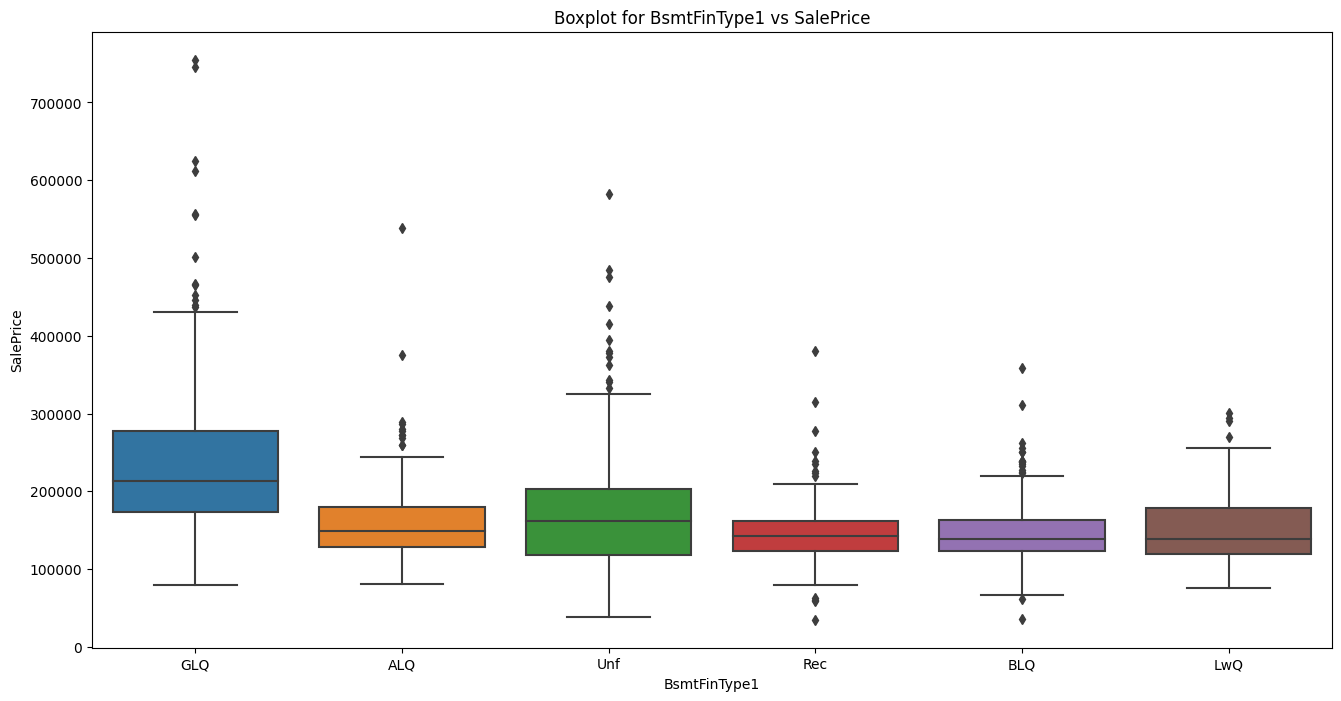

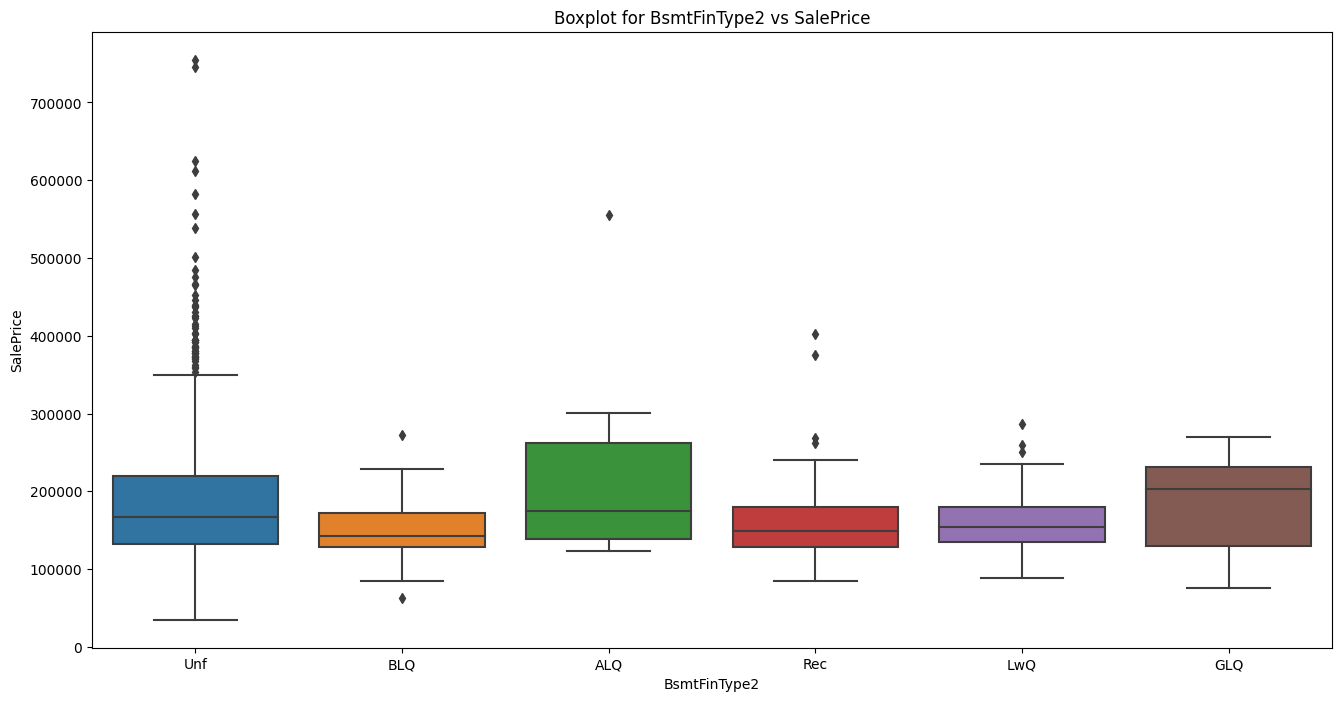

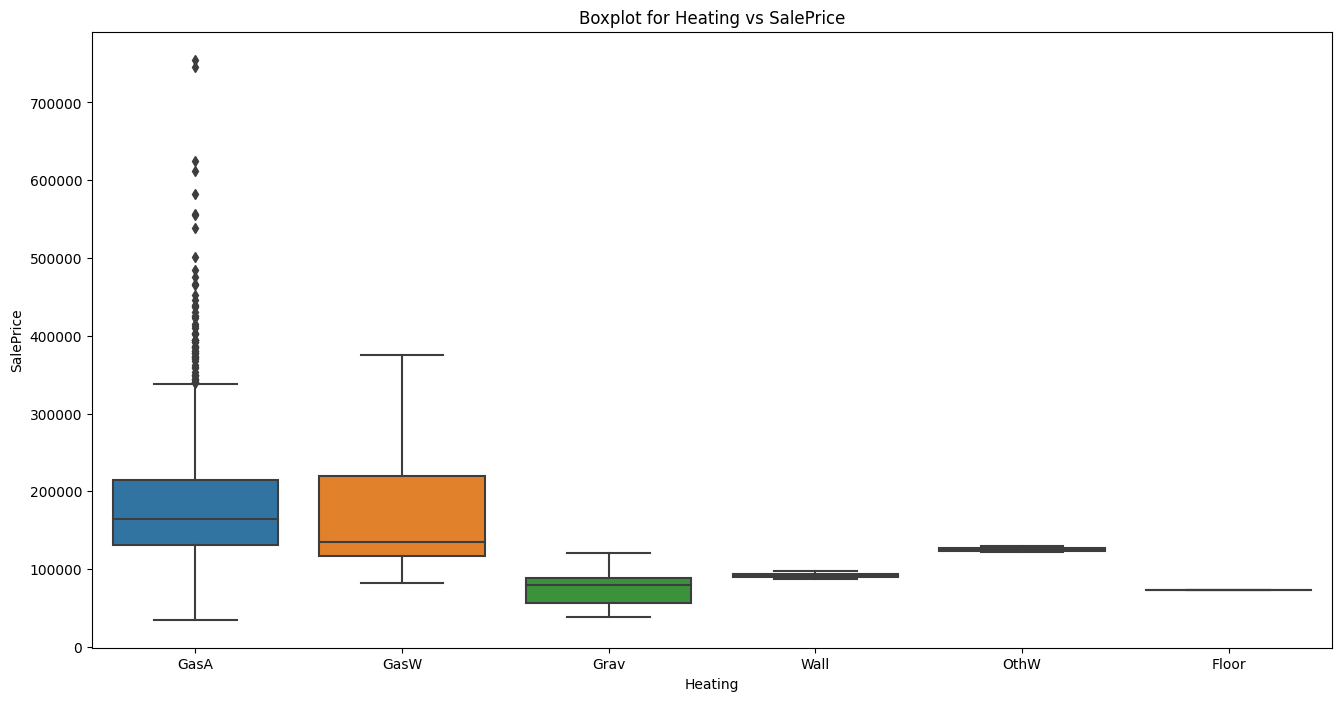

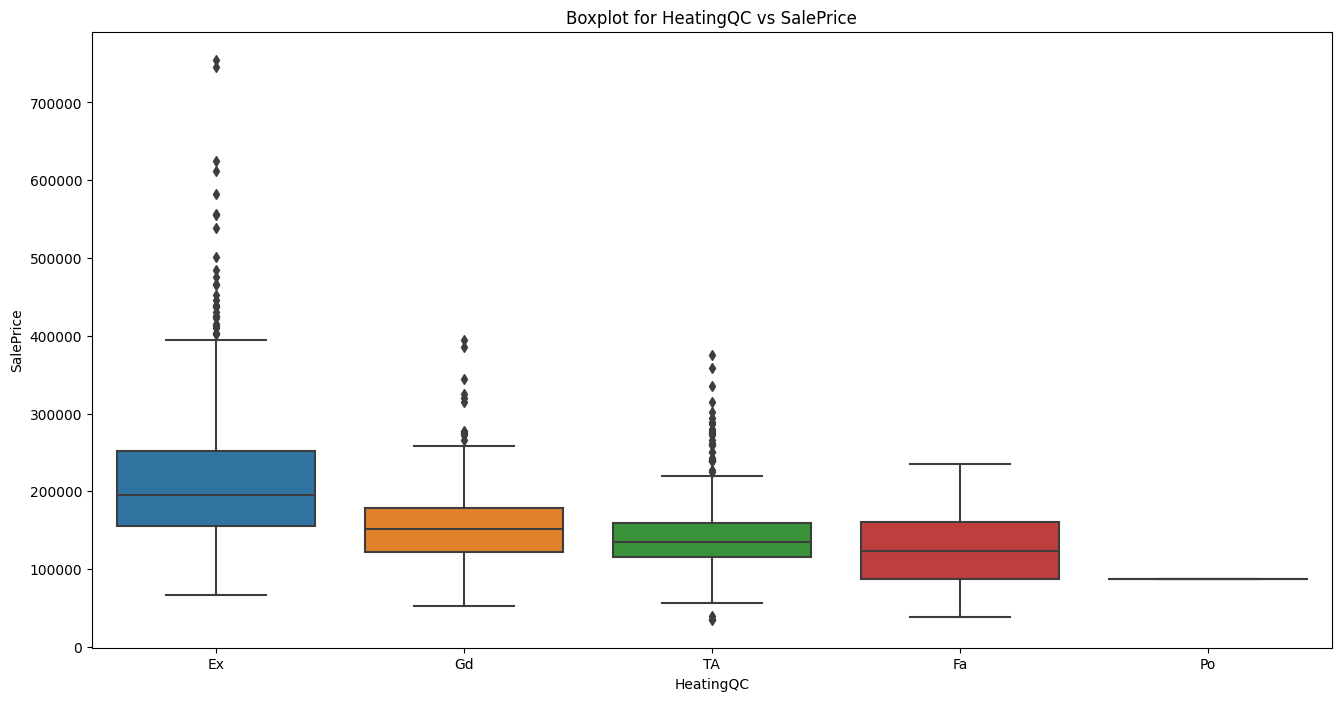

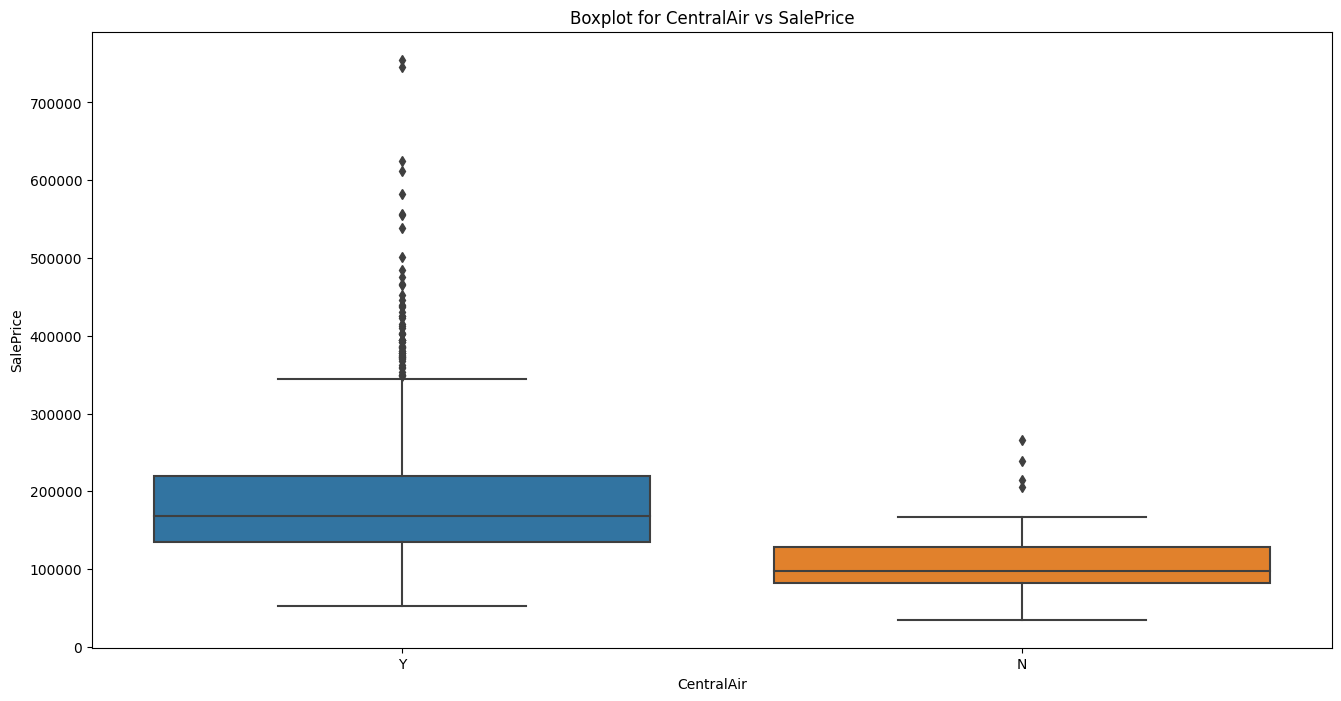

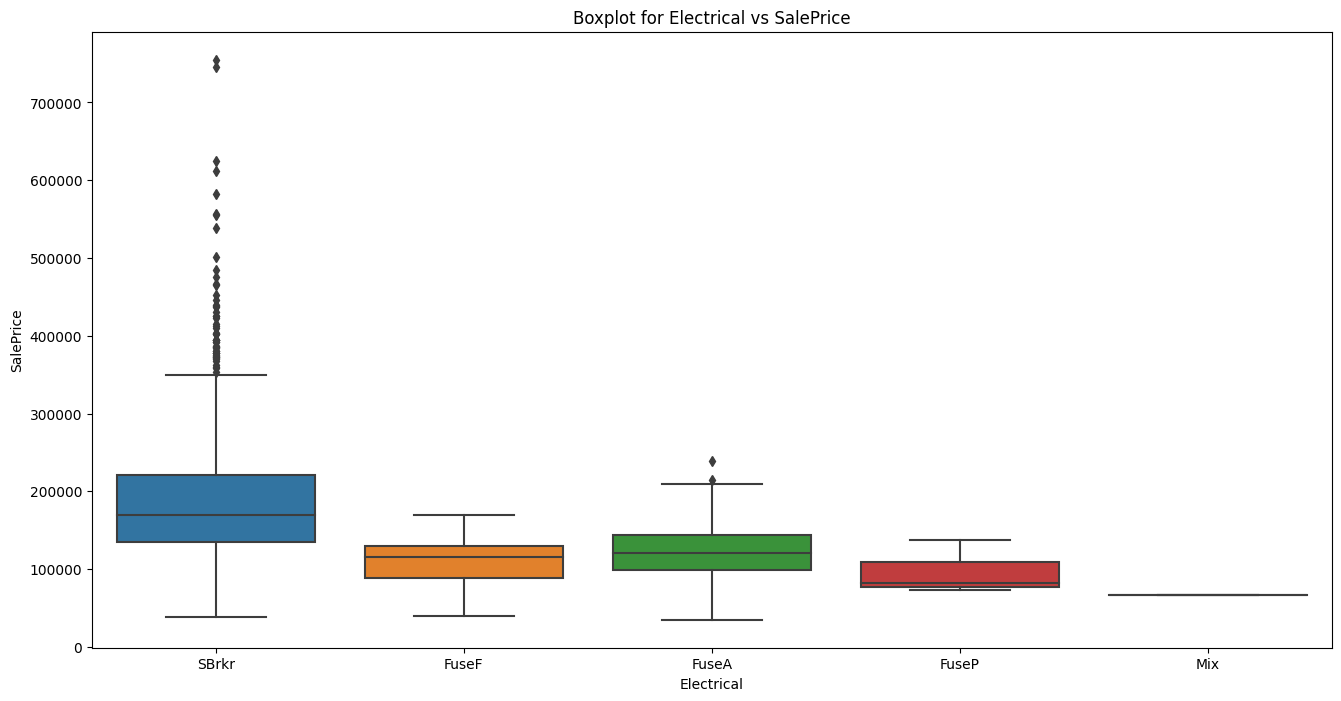

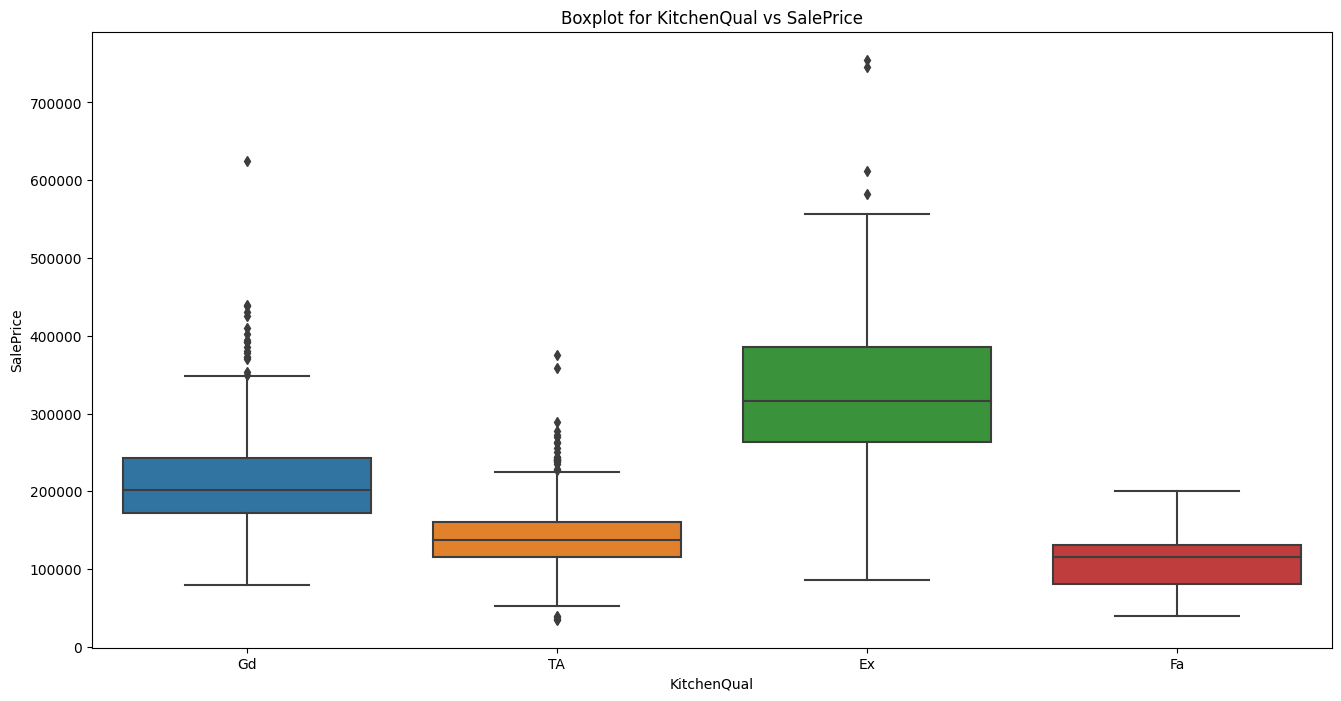

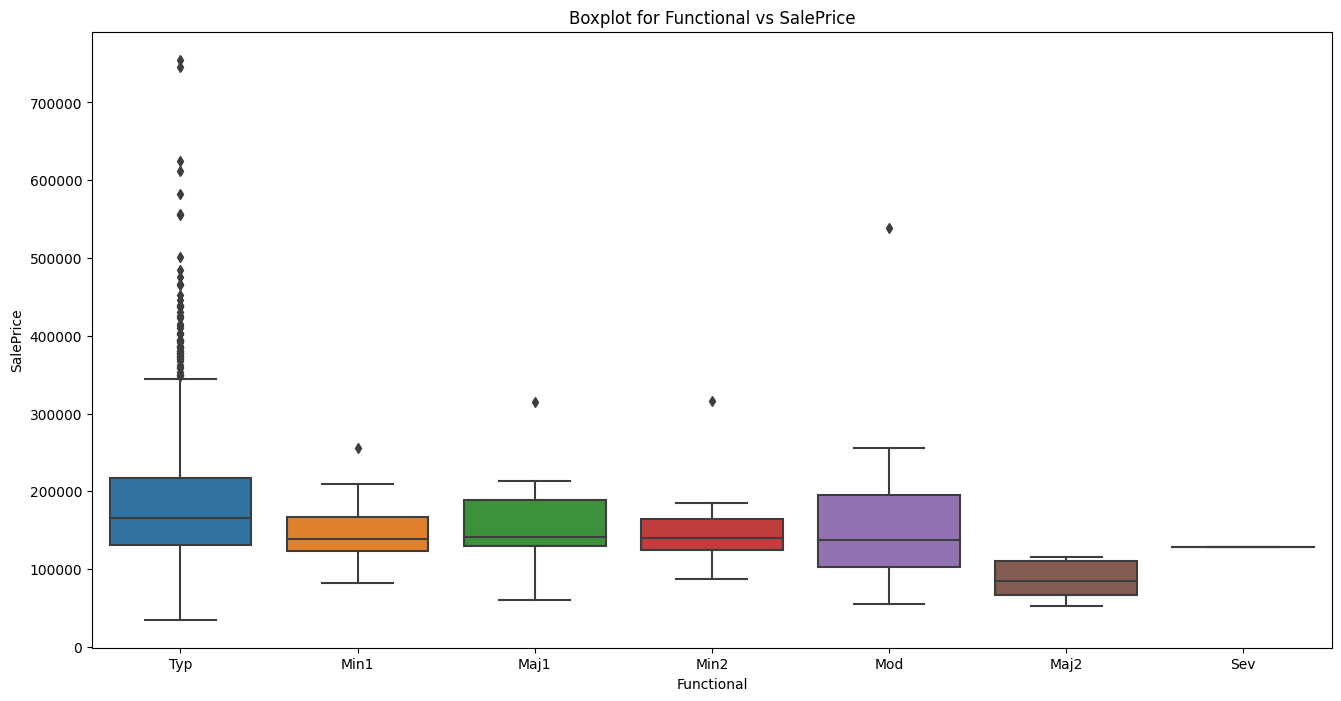

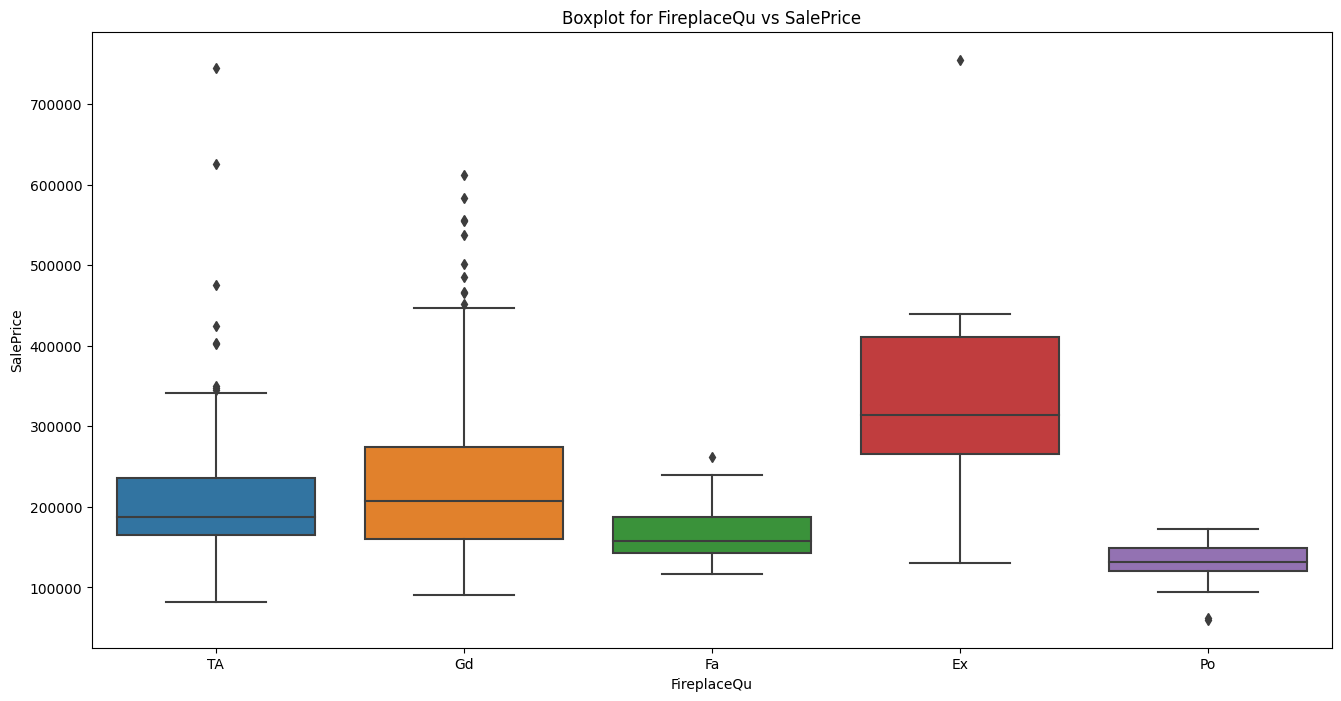

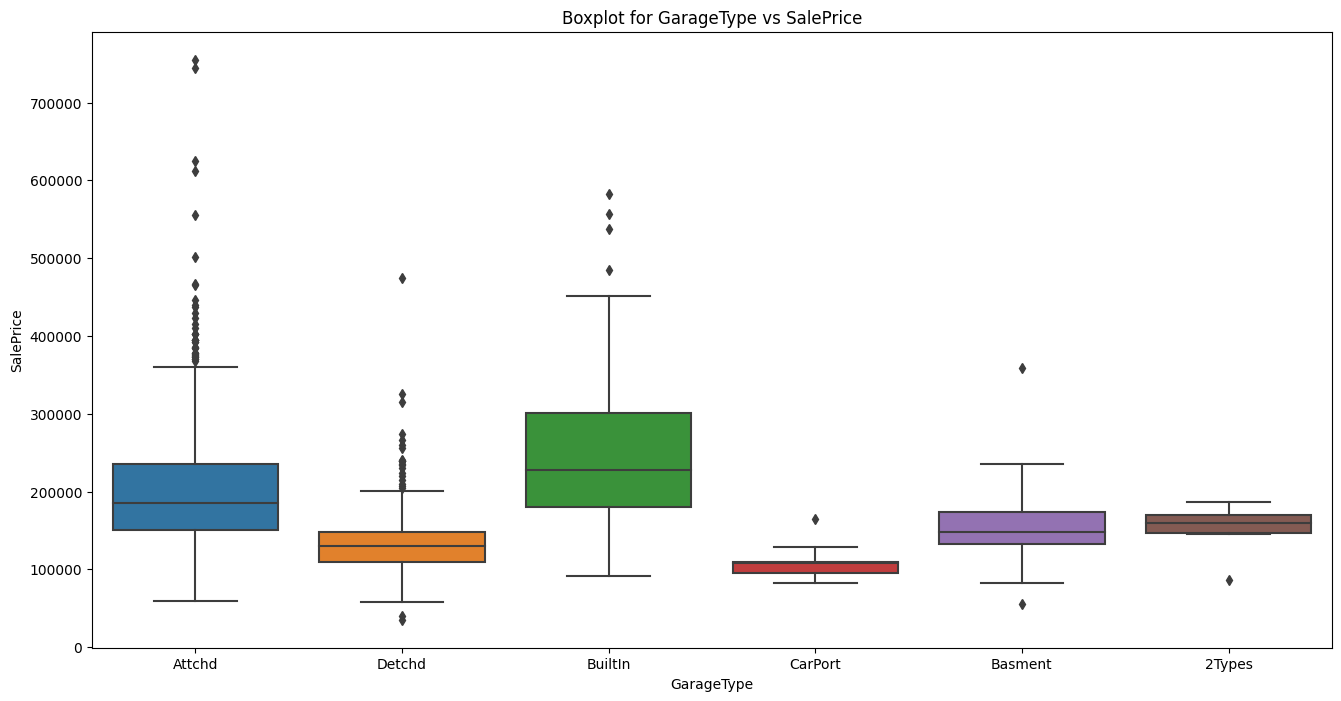

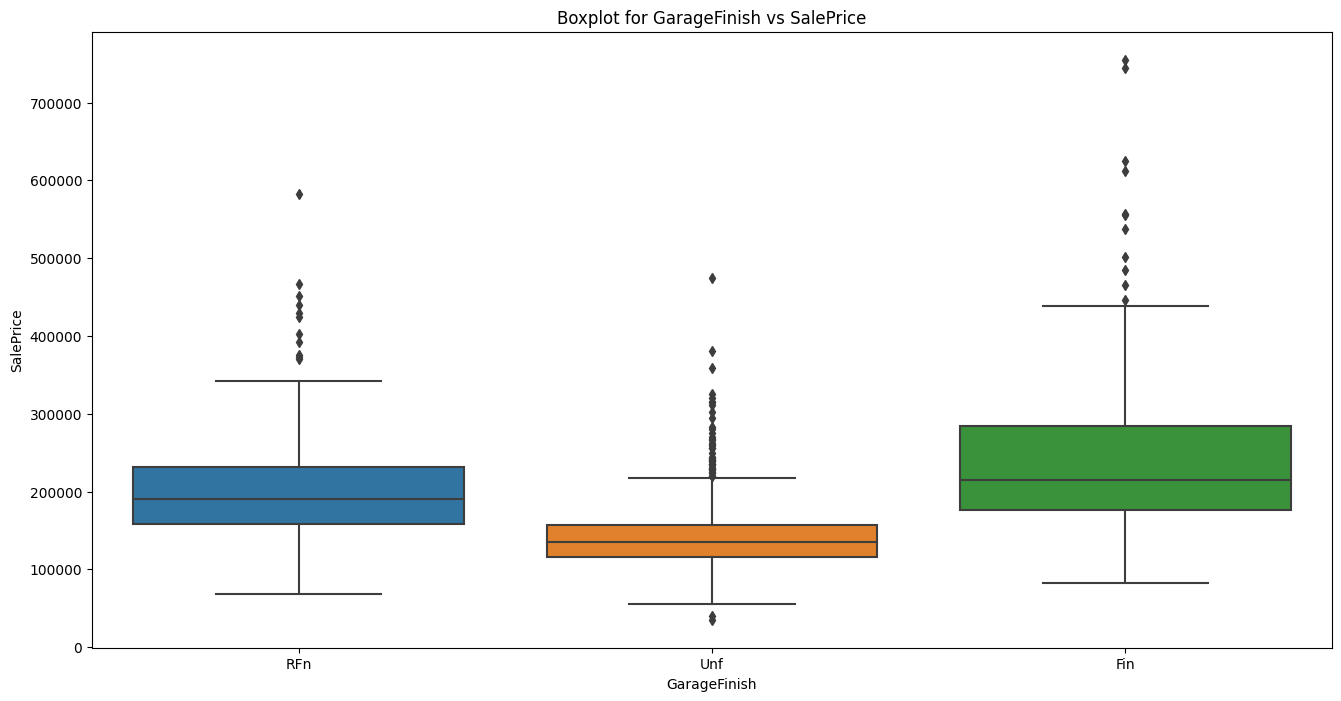

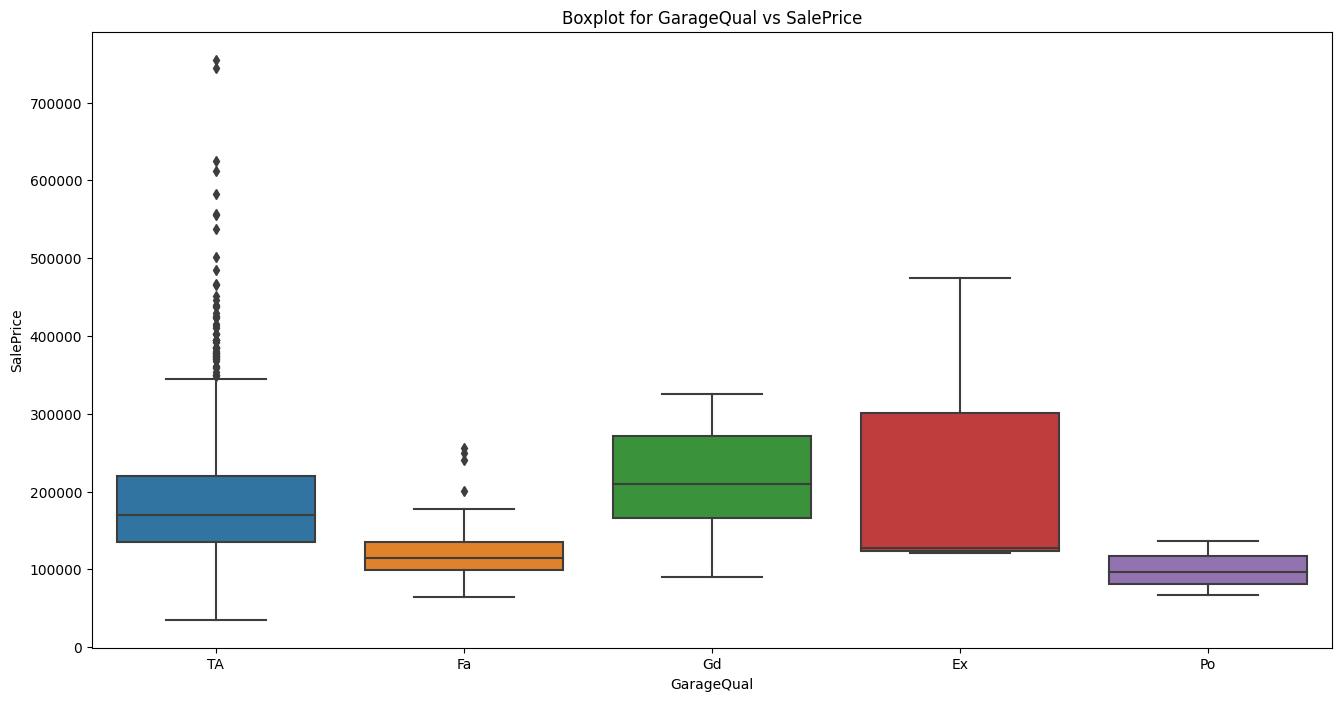

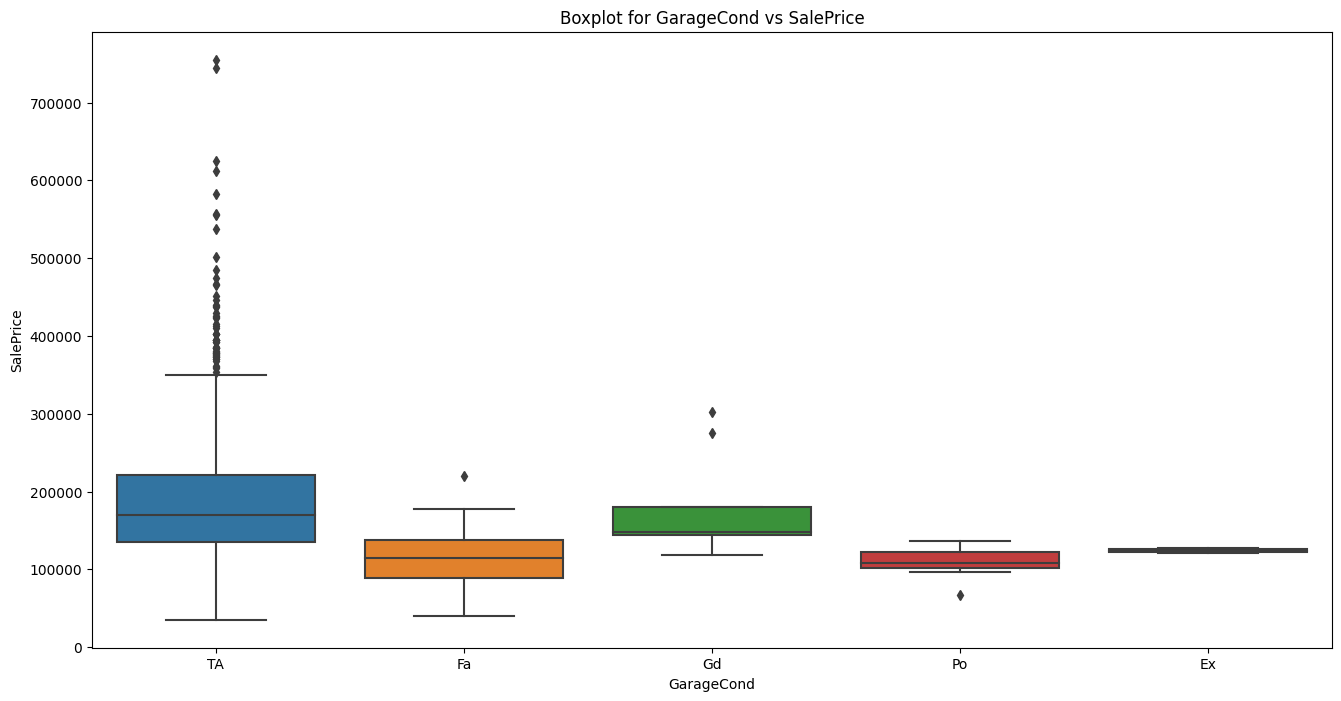

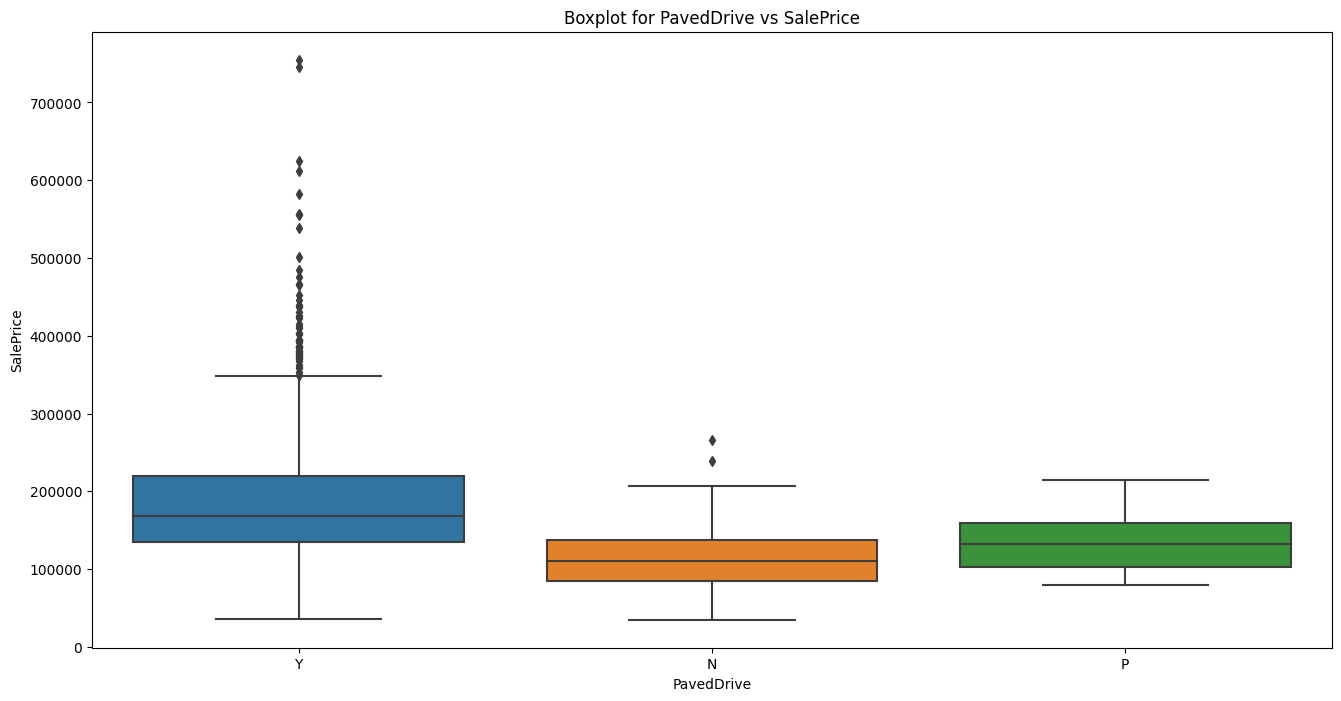

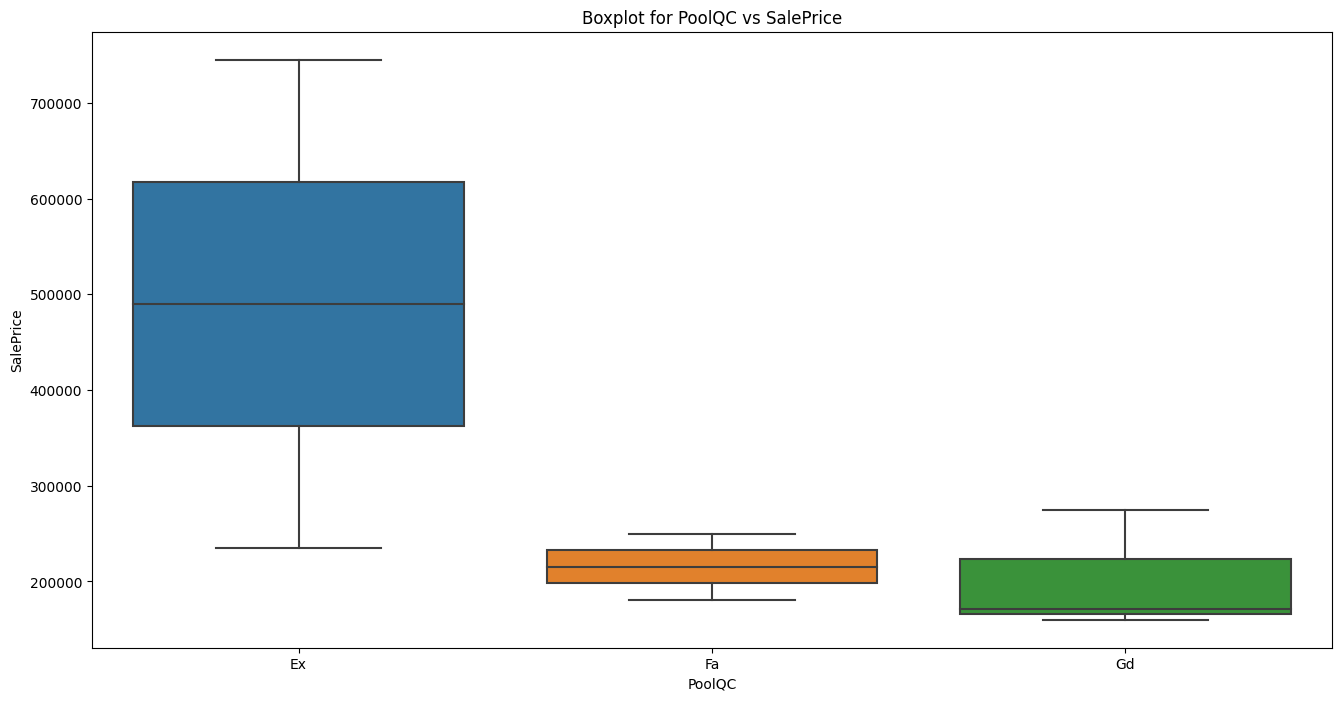

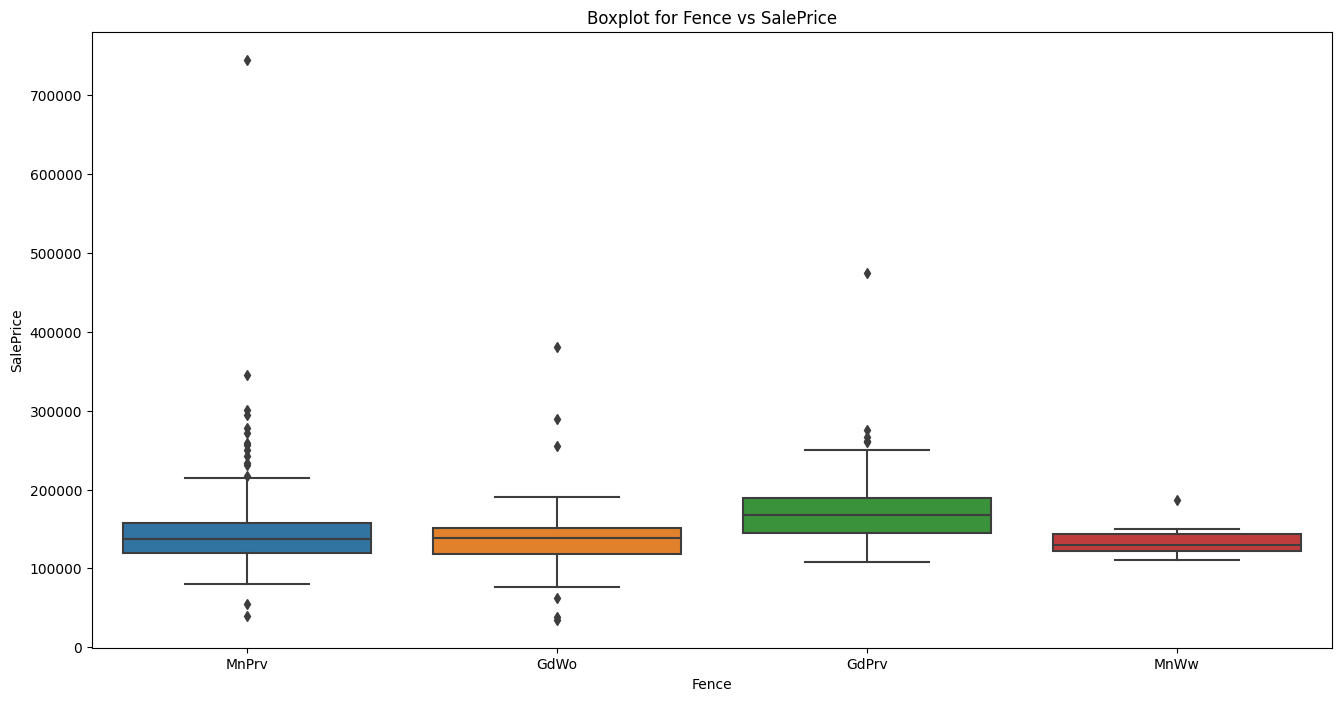

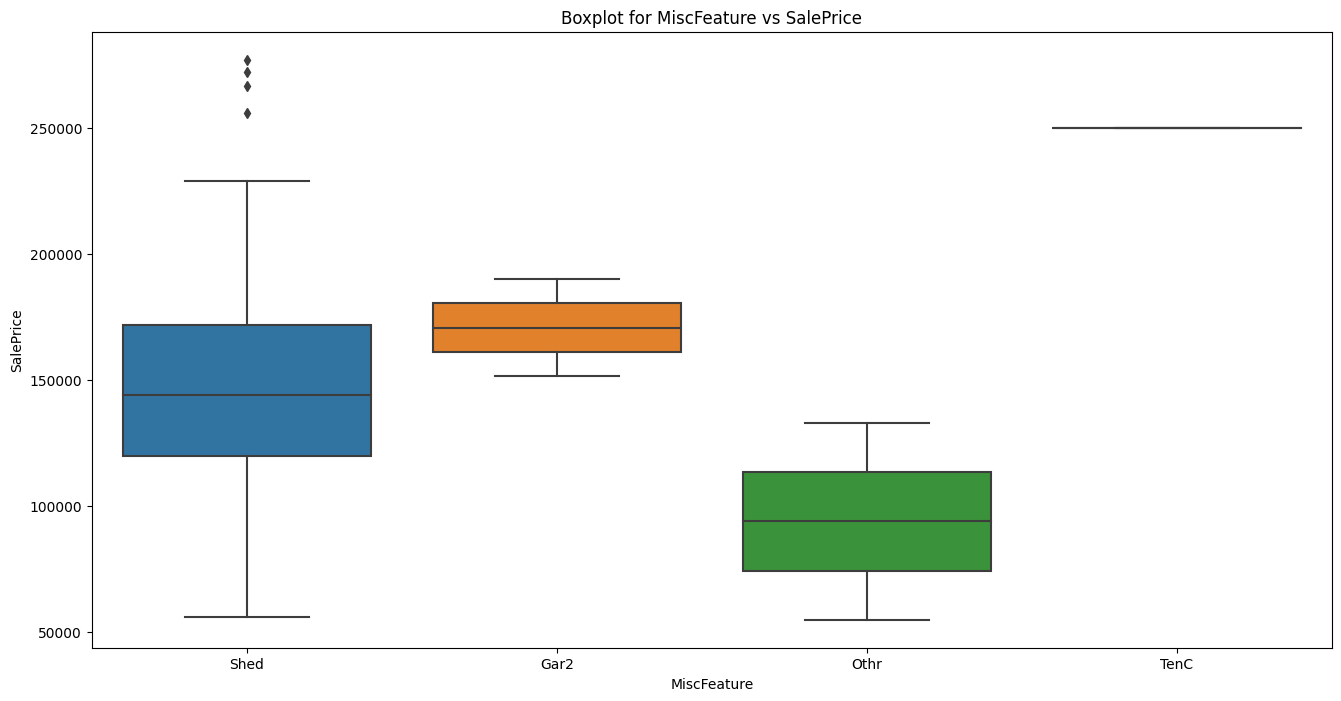

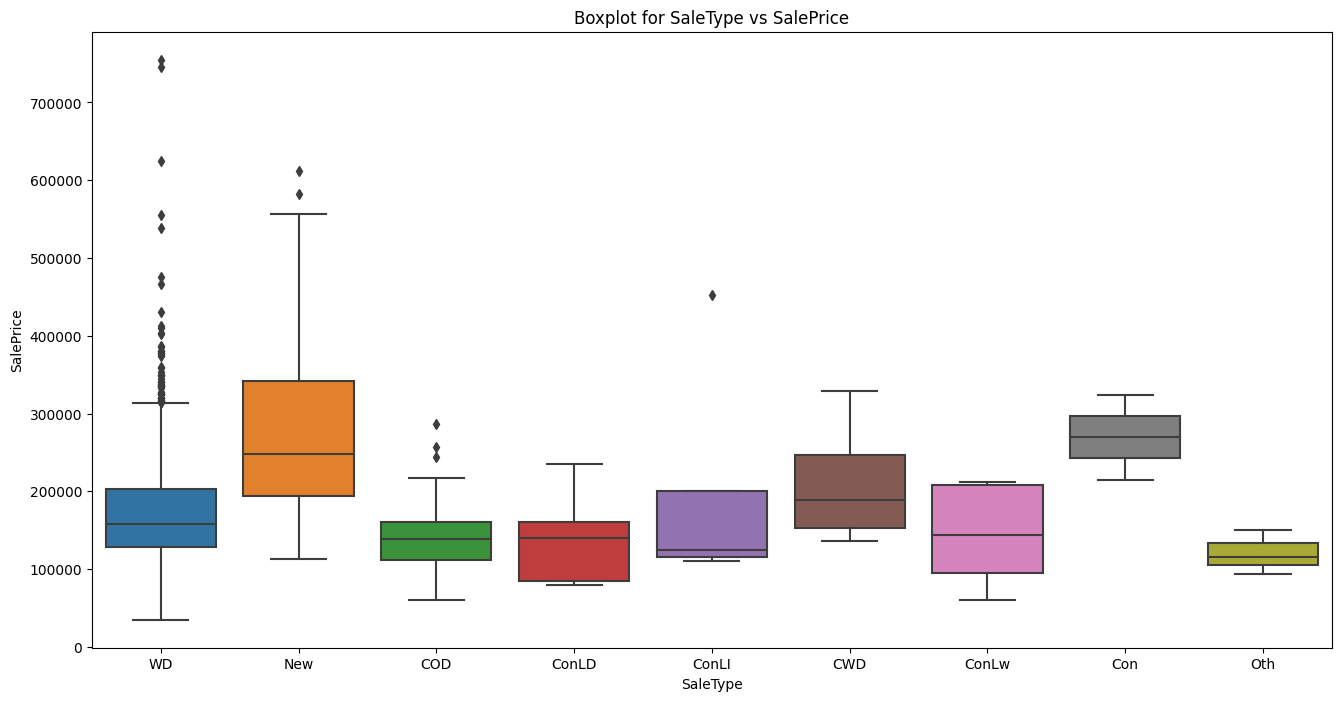

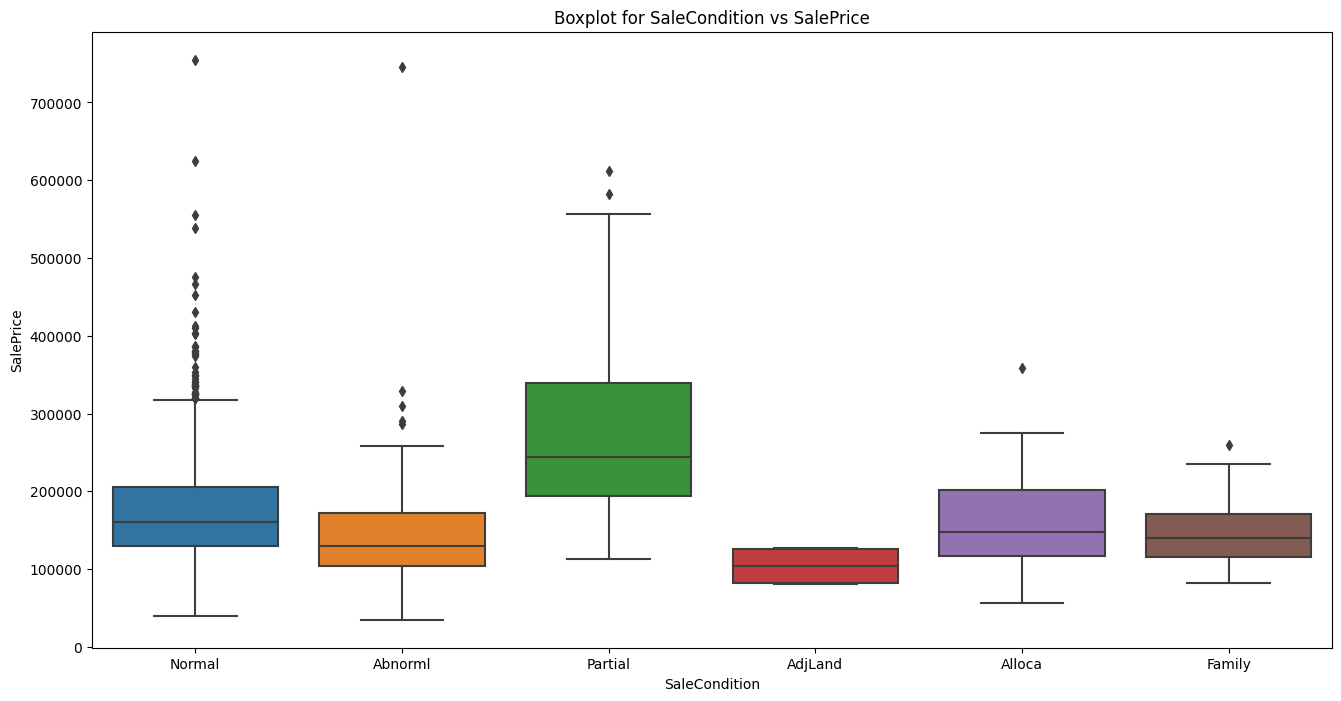

In [34]:
# Boxplot for Categorical Features 
for i in cat:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=df,x=i,y='SalePrice')
    plt.title(f'Boxplot for {i} vs SalePrice')
    plt.show()

## Missing Values Calculating

In [35]:
s = df.isna().sum()
s

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [36]:
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Data Preprocessing

In [40]:
X= df.drop(labels=['Id','SalePrice'],axis=1)
Y=df[['SalePrice']]

In [41]:
X.sample(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1177          50       RM          NaN     3950   Pave  Grvl      Reg   
386           50       RL         58.0     8410   Pave   NaN      Reg   
1038         160       RM         21.0     1533   Pave   NaN      Reg   
628           60       RL         70.0    11606   Pave   NaN      IR1   
522           50       RM         50.0     5000   Pave   NaN      Reg   
232          160       RM         21.0     1680   Pave   NaN      Reg   
1315          60       RL         85.0    11075   Pave   NaN      Reg   
1170          80       RL         76.0     9880   Pave   NaN      Reg   
487           20       RL         70.0    12243   Pave   NaN      IR1   
1146          20       RL          NaN    11200   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
1177         Bnk    AllPub    Inside  ...           0        0    NaN    NaN   
386          Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
1038         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
628          HLS    AllPub    Inside  ...           0        0    NaN    NaN   
522          Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
232          Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1315         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1170         Lvl    AllPub    Inside  ...           0      576     Gd  GdPrv   
487          Lvl    AllPub    Inside  ...         180        0    NaN    NaN   
1146         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
1177         NaN       0      12    2009        WD         Normal  
386          NaN       0       5    2006        WD        AdjLand  
1038         NaN       0       5    2009        WD         Normal  
628          NaN       0       9    2007        WD         Family  
522          NaN       0      10    2006        WD         Normal  
232          NaN       0       6    2006        WD         Normal  
1315         NaN       0       6    2008        WD         Normal  
1170         NaN       0       7    2008        WD         Normal  
487          NaN       0       2    2007        WD         Normal  
1146         NaN       0       5    2006        WD         Normal  

[10 rows x 79 columns]

In [42]:
Y.sample(10)

SalePrice
767      160000
1061      81000
197      235000
898      611657
1058     335000
614       75500
1199     148000
1369     232000
675      148500
896      106500

## # Seperate cat, con form X features

In [45]:
from user_function import catconsep

In [46]:
cat, con = catconsep(X)

In [47]:
cat1 = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
        'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [48]:
cat2 = []
for i in cat:
    if i not in cat1:
        cat2.append(i)

In [49]:
cat1

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [50]:
cat2

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [51]:
## Create sklearn pipeline for Feature Selection
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [55]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvailable')),
                            ('ordinal_enc',OrdinalEncoder())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ordinal_enc',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [58]:
## Get Preprocessed Data
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.07337496, -0.22087509, -0.20714171, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.46031974, -0.09188637, ...,  2.        ,
         8.        ,  4.        ],
       [ 0.07337496, -0.08463612,  0.07347998, ...,  2.        ,
         8.        ,  4.        ],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276, -0.08463612, -0.08016039, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.23325479, -0.05811155, ...,  2.        ,
         8.        ,  4.        ]])

In [59]:
cols=pre.get_feature_names_out()
cols

array(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat1__Alley',
       'cat1__BsmtQual', 'cat1__BsmtCond', 'cat1__BsmtExposure',
       'cat1__BsmtFinType1', 'cat1__BsmtFinType2', 'cat1__FireplaceQu',
       'cat1__GarageType', 'cat1__GarageFinish', 'cat1__GarageQual',
       'cat1__G

In [61]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.sample(5)

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
17           0.782828          0.097016      0.027478         -1.518467   
392         -0.872563         -0.039223     -0.218266         -0.795151   
1130        -0.163109         -0.220875     -0.271885         -1.518467   
820          0.073375          0.097016     -0.329813          0.651479   
460          0.073375          0.233255     -0.251841          1.374795   

      num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
17           -0.517200       -0.141353          -0.865659        -0.570750   
392           1.280685       -0.406319          -1.253287        -0.570750   
1130         -2.315085       -1.433062          -1.689368        -0.570750   
820          -0.517200        1.050994           0.878668        -0.570750   
460          -0.517200        1.249718           1.169389         0.038097   

      num__BsmtFinSF1  num__BsmtFinSF2  ...  cat2__Foundation  cat2__Heating  \
17          -0.973018        -0.288653  ...               3.0            1.0   
392         -0.973018        -0.288653  ...               3.0            1.0   
1130         0.391191        -0.288653  ...               0.0            1.0   
820         -0.973018        -0.288653  ...               2.0            1.0   
460          0.220116        -0.288653  ...               2.0            1.0   

      cat2__HeatingQC  cat2__CentralAir  cat2__Electrical  cat2__KitchenQual  \
17                4.0               1.0               4.0                3.0   
392               4.0               1.0               4.0                3.0   
1130              4.0               1.0               4.0                2.0   
820               0.0               1.0               4.0                2.0   
460               0.0               1.0               4.0                3.0   

      cat2__Functional  cat2__PavedDrive  cat2__SaleType  cat2__SaleCondition  
17                 6.0               2.0             8.0                  4.0  
392                6.0               2.0             8.0                  4.0  
1130               3.0               2.0             8.0                  4.0  
820                6.0               2.0             8.0                  4.0  
460                6.0               2.0             6.0                  5.0  

[5 rows x 79 columns]

In [63]:
s1=X_pre.isnull().sum()
s1

num__MSSubClass        0
num__LotFrontage       0
num__LotArea           0
num__OverallQual       0
num__OverallCond       0
                      ..
cat2__KitchenQual      0
cat2__Functional       0
cat2__PavedDrive       0
cat2__SaleType         0
cat2__SaleCondition    0
Length: 79, dtype: int64

In [67]:
s1[s1>0]

Series([], dtype: int64)

## Feature Selection

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [69]:
model = LinearRegression()
sel = SequentialFeatureSelector(model,direction='backward',n_jobs=-1)
sel_features=sel.fit_transform(X_pre,Y)
imp_cols=sel.get_feature_names_out()
imp_cols

array(['num__LotArea', 'num__OverallQual', 'num__OverallCond',
       'num__YearBuilt', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__ScreenPorch',
       'num__YrSold', 'cat1__Alley', 'cat1__BsmtQual', 'cat1__BsmtCond',
       'cat1__BsmtExposure', 'cat1__FireplaceQu', 'cat1__Fence',
       'cat1__MiscFeature', 'cat2__MSZoning', 'cat2__Street',
       'cat2__LandSlope', 'cat2__Neighborhood', 'cat2__BldgType',
       'cat2__HouseStyle', 'cat2__RoofMatl', 'cat2__Exterior1st',
       'cat2__ExterQual', 'cat2__HeatingQC', 'cat2__KitchenQual',
       'cat2__Functional', 'cat2__PavedDrive', 'cat2__SaleCondition'],
      dtype=object)

In [70]:
len(imp_cols)

40

In [71]:
sel_cols = []
for i in imp_cols:
    s = i.split('__')[1]
    sel_cols.append(s)

In [72]:
sel_cols

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'YrSold',
 'Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'FireplaceQu',
 'Fence',
 'MiscFeature',
 'MSZoning',
 'Street',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'ExterQual',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleCondition']

In [76]:
X_sel = X[sel_cols]
X_sel.sample(5)

LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  BsmtFinSF1  \
803     13891            9            5       2008       424.0           0   
9        7420            5            6       1939         0.0         851   
545     13837            7            5       1988       178.0        1002   
1141    10304            5            7       1976        44.0         381   
1240     8158            7            5       2003       252.0         550   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  BldgType  HouseStyle  \
803            0       1734         1734      1734  ...      1Fam      2Story   
9              0        140          991      1077  ...    2fmCon      1.5Unf   
545          202          0         1204      1377  ...      1Fam      1.5Fin   
1141           0        399          780      1088  ...      1Fam      2Story   
1240           0        334          884       884  ...      1Fam      2Story   

      RoofMatl  Exterior1st  ExterQual  HeatingQC  KitchenQual  Functional  \
803    CompShg      VinylSd         Ex         Ex           Ex         Typ   
9      CompShg      MetalSd         TA         Ex           TA         Typ   
545    CompShg      HdBoard         Gd         Gd           Gd         Typ   
1141   CompShg      Plywood         TA         Ex           Gd         Typ   
1240   CompShg      VinylSd         Gd         Ex           Gd         Typ   

      PavedDrive SaleCondition  
803            Y       Partial  
9              Y        Normal  
545            Y        Normal  
1141           Y        Normal  
1240           Y        Normal  

[5 rows x 40 columns]

# Building The Final Pipeline

In [77]:
cat1

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [78]:
cat2

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [79]:
cat_sel, con_sel = catconsep(X_sel)

In [84]:
cat1_sel = []
cat2_sel = []
for i in cat_sel:
    if i in cat1:
        cat1_sel.append(i)
    else:
        cat2_sel.append(i)


In [85]:
cat1_sel

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'FireplaceQu',
 'Fence',
 'MiscFeature']

In [86]:
cat2_sel

['MSZoning',
 'Street',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'ExterQual',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleCondition']

In [87]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='NOt Avaliable')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre1 = ColumnTransformer([('num',num_pipe,con_sel),
                          ('cat1',cat_pipe1,cat1_sel),
                          ('cat2',cat_pipe2,cat2_sel)])

In [94]:
X_sel_pre = pre1.fit_transform(X_sel).toarray()
X_sel_pre

array([[-0.20714171,  0.65147924, -0.51719981, ...,  0.        ,
         1.        ,  0.        ],
       [-0.09188637, -0.07183611,  2.17962776, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07347998,  0.65147924, -0.51719981, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.14781027,  0.65147924,  3.07857028, ...,  0.        ,
         1.        ,  0.        ],
       [-0.08016039, -0.79515147,  0.38174271, ...,  0.        ,
         1.        ,  0.        ],
       [-0.05811155, -0.79515147,  0.38174271, ...,  0.        ,
         1.        ,  0.        ]])

In [96]:
final_cols=pre1.get_feature_names_out()
final_cols

array(['num__LotArea', 'num__OverallQual', 'num__OverallCond',
       'num__YearBuilt', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__ScreenPorch',
       'num__YrSold', 'cat1__Alley_Grvl', 'cat1__Alley_NOt Avaliable',
       'cat1__Alley_Pave', 'cat1__BsmtQual_Ex', 'cat1__BsmtQual_Fa',
       'cat1__BsmtQual_Gd', 'cat1__BsmtQual_NOt Avaliable',
       'cat1__BsmtQual_TA', 'cat1__BsmtCond_Fa', 'cat1__BsmtCond_Gd',
       'cat1__BsmtCond_NOt Avaliable', 'cat1__BsmtCond_Po',
       'cat1__BsmtCond_TA', 'cat1__BsmtExposure_Av',
       'cat1__BsmtExposure_Gd', 'cat1__BsmtExposure_Mn',
       'cat1__BsmtExposure_NOt Avaliable', 'cat1__BsmtExposure_No',
       'cat1__FireplaceQu_Ex', 'cat1__FireplaceQu_Fa',
       'cat1__FireplaceQu_Gd', 'cat1__FireplaceQu_NO

In [98]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=final_cols)
X_sel_pre.sample(5)

num__LotArea  num__OverallQual  num__OverallCond  num__YearBuilt  \
435       0.015051          0.651479          0.381743        0.819149   
1431     -0.560124         -0.071836          0.381743        0.156734   
119      -0.206039         -0.071836         -0.517200        1.117235   
186      -0.057109          0.651479         -0.517200        0.620424   
75       -0.894064         -1.518467         -0.517200        0.057371   

      num__MasVnrArea  num__BsmtFinSF1  num__BsmtFinSF2  num__BsmtUnfSF  \
435          -0.57441        -0.128612         1.844495       -1.125703   
1431         -0.57441         1.128127        -0.288653       -1.284176   
119          -0.57441        -0.973018        -0.288653        0.363944   
186          -0.57441         0.367065        -0.288653        0.022095   
75           -0.57441         0.040269        -0.288653       -1.284176   

      num__TotalBsmtSF  num__1stFlrSF  ...  cat2__Functional_Typ  \
435          -0.589275      -0.868475  ...                   1.0   
1431         -0.226721      -0.529496  ...                   1.0   
119          -0.751170      -1.124649  ...                   1.0   
186           0.297729       0.140697  ...                   1.0   
75           -1.357707      -1.647349  ...                   1.0   

      cat2__PavedDrive_N  cat2__PavedDrive_P  cat2__PavedDrive_Y  \
435                  0.0                 0.0                 1.0   
1431                 0.0                 0.0                 1.0   
119                  0.0                 0.0                 1.0   
186                  0.0                 0.0                 1.0   
75                   0.0                 0.0                 1.0   

      cat2__SaleCondition_Abnorml  cat2__SaleCondition_AdjLand  \
435                           0.0                          0.0   
1431                          0.0                          0.0   
119                           0.0                          0.0   
186                           0.0                          0.0   
75                            0.0                          0.0   

      cat2__SaleCondition_Alloca  cat2__SaleCondition_Family  \
435                          0.0                         0.0   
1431                         0.0                         0.0   
119                          0.0                         0.0   
186                          0.0                         0.0   
75                           0.0                         0.0   

      cat2__SaleCondition_Normal  cat2__SaleCondition_Partial  
435                          1.0                          0.0  
1431                         1.0                          0.0  
119                          0.0                          1.0  
186                          1.0                          0.0  
75                           1.0                          0.0  

[5 rows x 153 columns]

## Train Test Split

In [99]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X_sel_pre,Y,test_size=0.3,random_state=0)

In [100]:
xtrain.shape

(1022, 153)

In [102]:
xtest.shape

(438, 153)

## Linear Base Model

In [103]:
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [106]:
model1.score(xtrain,ytrain)

0.9083889976495093

In [107]:
model1.score(xtest,ytest)

-6.039494890972933e+18

In [111]:
from user_function import evaluate_model
evaluate_model(xtrain,ytrain,xtest,ytest,model1)

Training Results:
MSE  : 558804780.42
RMSE : 23639.05
MAE  : 14304.44
R2   : 0.9084


Testing Results:
MSE  : 41002079122555449867266686976.00
RMSE : 202489701275288.19
MAE  : 14674500345896.35
R2   : -6039494890972933120.0000


# Ridge MOdel With HyperParameter Tuning

In [115]:
import numpy as np
alphas = np.arange(20,50,0.1)
print(alphas)

[20.  20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1 21.2 21.3
 21.4 21.5 21.6 21.7 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6 22.7
 22.8 22.9 23.  23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1
 24.2 24.3 24.4 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4 25.5
 25.6 25.7 25.8 25.9 26.  26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9
 27.  27.1 27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.  28.1 28.2 28.3
 28.4 28.5 28.6 28.7 28.8 28.9 29.  29.1 29.2 29.3 29.4 29.5 29.6 29.7
 29.8 29.9 30.  30.1 30.2 30.3 30.4 30.5 30.6 30.7 30.8 30.9 31.  31.1
 31.2 31.3 31.4 31.5 31.6 31.7 31.8 31.9 32.  32.1 32.2 32.3 32.4 32.5
 32.6 32.7 32.8 32.9 33.  33.1 33.2 33.3 33.4 33.5 33.6 33.7 33.8 33.9
 34.  34.1 34.2 34.3 34.4 34.5 34.6 34.7 34.8 34.9 35.  35.1 35.2 35.3
 35.4 35.5 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3 36.4 36.5 36.6 36.7
 36.8 36.9 37.  37.1 37.2 37.3 37.4 37.5 37.6 37.7 37.8 37.9 38.  38.1
 38.2 38.3 38.4 38.5 38.6 38.7 38.8 38.9 39.  39.1 39.2 39.3 39.4 39.5
 39.6 

In [116]:
len(alphas)

300

In [125]:
params={'alpha': alphas}

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
model3=Ridge()
gscv=GridSearchCV(model3,param_grid=params,cv=6,scoring='neg_mean_squared_error',n_jobs=-1)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': array([20. , 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. ,
       21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1,
       22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2,
       23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3,
       24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4,
       25.5, 25.6, 25.7, 25....
       43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. , 44.1,
       44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1, 45.2,
       45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2, 46.3,
       46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2, 47.3, 47.4,
       47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3, 48.4, 48.5,
       48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4, 49.5, 49.6,
       49.7, 49.8, 49.9])},
             scoring='neg_mean_squared_error')

In [127]:
gscv.best_params_

{'alpha': 20.0}

In [128]:
gscv.best_score_

-808922795.0219904

In [131]:
best_ridge_model=gscv.best_estimator_
best_ridge_model

Ridge(alpha=20.0)

In [132]:
best_ridge_model.score(xtrain,ytrain)

0.897491409389861

In [133]:
best_ridge_model.score(xtest,ytest)

0.7883376622118144

In [134]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_ridge_model)

Training Results:
MSE  : 625277412.07
RMSE : 25005.55
MAE  : 14799.35
R2   : 0.8975


Testing Results:
MSE  : 1436973799.62
RMSE : 37907.44
MAE  : 17714.00
R2   : 0.7883


## Lasso Model Hyperparameter Tuning

In [135]:
from sklearn.linear_model import Lasso

In [136]:
params = {'alpha':np.arange(190,205,0.1)}

In [137]:
model4 = Lasso()
gscv2 = GridSearchCV(model4,param_grid=params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
gscv2.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([190. , 190.1, 190.2, 190.3, 190.4, 190.5, 190.6, 190.7, 190.8,
       190.9, 191. , 191.1, 191.2, 191.3, 191.4, 191.5, 191.6, 191.7,
       191.8, 191.9, 192. , 192.1, 192.2, 192.3, 192.4, 192.5, 192.6,
       192.7, 192.8, 192.9, 193. , 193.1, 193.2, 193.3, 193.4, 193.5,
       193.6, 193.7, 193.8, 193.9, 194. , 194.1, 194.2, 194.3, 194.4,
       194.5, 194.6,...
       199. , 199.1, 199.2, 199.3, 199.4, 199.5, 199.6, 199.7, 199.8,
       199.9, 200. , 200.1, 200.2, 200.3, 200.4, 200.5, 200.6, 200.7,
       200.8, 200.9, 201. , 201.1, 201.2, 201.3, 201.4, 201.5, 201.6,
       201.7, 201.8, 201.9, 202. , 202.1, 202.2, 202.3, 202.4, 202.5,
       202.6, 202.7, 202.8, 202.9, 203. , 203.1, 203.2, 203.3, 203.4,
       203.5, 203.6, 203.7, 203.8, 203.9, 204. , 204.1, 204.2, 204.3,
       204.4, 204.5, 204.6, 204.7, 204.8, 204.9])},
             scoring='neg_mean_squared_error')

In [138]:
gscv2.best_params_

{'alpha': 190.0}

In [139]:
gscv2.best_score_

-818073530.6474812

In [140]:
best_lasso_model = gscv2.best_estimator_
best_lasso_model

Lasso(alpha=190.0)

In [141]:
best_lasso_model.score(xtrain,ytrain)

0.8969215407337052

In [143]:
best_lasso_model.score(xtest,ytest)

0.8035649257109883

In [144]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_lasso_model)

Training Results:
MSE  : 628753471.94
RMSE : 25074.96
MAE  : 14986.43
R2   : 0.8969


Testing Results:
MSE  : 1333596038.05
RMSE : 36518.43
MAE  : 17611.70
R2   : 0.8036


### Predication for train & Test With best Lasso Model

In [151]:
## Predictions for train and test with best lasso model
ypred_tr = best_lasso_model.predict(xtrain)
ypred_ts = best_lasso_model.predict(xtest)

In [152]:
## Training Data Predication

ypred_tr[0:5]


array([232993.97288048, 183804.75905486, 130453.44046083, 114327.10787042,
        32805.01311765])

In [149]:
ytrain.head()

SalePrice
64       219500
682      173000
960      116500
1384     105000
1100      60000

In [157]:
## Testing Data Prediction

ypred_ts[0:5]

array([[248158.96683808],
       [160123.33472659],
       [120802.20696699],
       [215799.2595978 ],
       [103140.05428121]])

In [158]:
ytest.head()

SalePrice
529     200624
491     133000
459     110000
279     192000
655      88000

## Prediction For Testing data

In [160]:
df2 = pd.read_csv('testing_set.csv')
df2.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
949  2410          20       RL         80.0     9736   Pave   NaN      Reg   
691  2152          30       RL         85.0    19550   Pave   NaN      Reg   
430  1891         180       RM         35.0     3675   Pave   NaN      Reg   
479  1940         120       RL         39.0     5070   Pave   NaN      IR1   
379  1840          90       RL         60.0    10800   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
949         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
691         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
430         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
479         HLS    AllPub  ...         144        0    NaN   NaN         NaN   
379         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
949       0      4    2007        WD         Normal  
691       0      1    2008        WD         Normal  
430       0      4    2009        WD         Normal  
479       0      8    2008        WD         Normal  
379       0      3    2009        WD         Alloca  

[5 rows x 80 columns]

In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [163]:
xnew = pre1.transform(df2).toarray()
xnew

array([[ 0.11076257, -0.79515147,  0.38174271, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.37584985, -0.07183611,  0.38174271, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33205282, -0.79515147, -0.51719981, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.95042275, -0.79515147,  1.28068524, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00759964, -0.79515147, -0.51719981, ...,  0.        ,
         1.        ,  0.        ],
       [-0.08918038,  0.65147924, -0.51719981, ...,  0.        ,
         1.        ,  0.        ]])

In [164]:
final_cols

array(['num__LotArea', 'num__OverallQual', 'num__OverallCond',
       'num__YearBuilt', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__ScreenPorch',
       'num__YrSold', 'cat1__Alley_Grvl', 'cat1__Alley_NOt Avaliable',
       'cat1__Alley_Pave', 'cat1__BsmtQual_Ex', 'cat1__BsmtQual_Fa',
       'cat1__BsmtQual_Gd', 'cat1__BsmtQual_NOt Avaliable',
       'cat1__BsmtQual_TA', 'cat1__BsmtCond_Fa', 'cat1__BsmtCond_Gd',
       'cat1__BsmtCond_NOt Avaliable', 'cat1__BsmtCond_Po',
       'cat1__BsmtCond_TA', 'cat1__BsmtExposure_Av',
       'cat1__BsmtExposure_Gd', 'cat1__BsmtExposure_Mn',
       'cat1__BsmtExposure_NOt Avaliable', 'cat1__BsmtExposure_No',
       'cat1__FireplaceQu_Ex', 'cat1__FireplaceQu_Fa',
       'cat1__FireplaceQu_Gd', 'cat1__FireplaceQu_NO

In [165]:
xnew = pd.DataFrame(xnew,columns=final_cols)

In [166]:
xnew.head()

num__LotArea  num__OverallQual  num__OverallCond  num__YearBuilt  \
0      0.110763         -0.795151          0.381743       -0.340077   
1      0.375850         -0.071836          0.381743       -0.439440   
2      0.332053         -0.795151         -0.517200        0.852269   
3     -0.054002         -0.071836          0.381743        0.885390   
4     -0.552407          1.374795         -0.517200        0.686666   

   num__MasVnrArea  num__BsmtFinSF1  num__BsmtFinSF2  num__BsmtUnfSF  \
0        -0.574410         0.053428         0.604293       -0.672923   
1         0.023903         1.051363        -0.288653       -0.365032   
2        -0.574410         0.761852        -0.288653       -0.974021   
3        -0.463612         0.347326        -0.288653       -0.550672   
4        -0.574410        -0.396190        -0.288653        1.018211   

   num__TotalBsmtSF  num__1stFlrSF  ...  cat2__Functional_Typ  \
0         -0.400017      -0.689929  ...                   1.0   
1          0.619239       0.430511  ...                   1.0   
2         -0.295127      -0.607125  ...                   1.0   
3         -0.299687      -0.612300  ...                   1.0   
4          0.507509       0.303718  ...                   1.0   

   cat2__PavedDrive_N  cat2__PavedDrive_P  cat2__PavedDrive_Y  \
0                 0.0                 0.0                 1.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 1.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 1.0   

   cat2__SaleCondition_Abnorml  cat2__SaleCondition_AdjLand  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   cat2__SaleCondition_Alloca  cat2__SaleCondition_Family  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   cat2__SaleCondition_Normal  cat2__SaleCondition_Partial  
0                         1.0                          0.0  
1                         1.0                          0.0  
2                         1.0                          0.0  
3                         1.0                          0.0  
4                         1.0                          0.0  

[5 rows x 153 columns]

In [168]:
preds=best_lasso_model.predict(xnew)


In [169]:
preds[0:6]

array([116493.96658811, 163690.06876706, 170914.39405775, 190206.68490205,
       201533.95032752, 166733.37406615])

In [170]:
df_preds = df2[['Id']]
df_preds


Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]

In [171]:
df_preds['SalePrice']=preds

In [172]:
df_preds

Id      SalePrice
0     1461  116493.966588
1     1462  163690.068767
2     1463  170914.394058
3     1464  190206.684902
4     1465  201533.950328
...    ...            ...
1454  2915   80895.337561
1455  2916   73157.195126
1456  2917  170323.793684
1457  2918  112536.520861
1458  2919  220364.240574

[1459 rows x 2 columns]

In [173]:
df_preds.to_csv('Predictions.csv',index=False)